In [ ]:
!pip install codecarbon
!pip install codecarbon dash
!codecarbon init
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import utils,  optimizers, losses
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from sklearn.utils.multiclass import unique_labels
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical
import osqp
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import EfficientNetV2B0
from keras import Input
from sklearn.utils.multiclass import unique_labels
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
from google.colab import drive
from codecarbon import track_emissions
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 102.6 MB/s eta 0:00:00

Welcome to CodeCarbon, here is your experiment id:
0e00bbbf-57d2-45c3-8f5c-622f00913bca (from ./.codecarbon.config)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset
%cd PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 14.65 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Updating files: 100% (182401/182401), done.
/content/PlantVillage-Dataset


In [ ]:
fpath = "/content/PlantVillage-Dataset/raw/color"
random_seed = 111

categories = os.listdir(fpath)

os.listdir(fpath)

['Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Raspberry___healthy',
 'Potato___Late_blight',
 'Grape___Esca_(Black_Measles)',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Pepper,_bell___healthy',
 'Blueberry___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Potato___healthy',
 'Cherry_(including_sour)___healthy',
 'Grape___healthy',
 'Apple___Cedar_apple_rust',
 'Grape___Black_rot',
 'Apple___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Early_blight',
 'Soybean___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Late_blight',
 'Strawberry___healthy',
 'Apple___Black_rot',
 'Peach___Bacterial_spot',
 'Tomato___Leaf_Mold',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Tomato___healthy',
 'Tomato___Target_Spot',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___healthy',
 'Squash___Powdery_mildew',
 'Cherry_(including_so

In [ ]:
with open(".codecarbon.config", "w") as f:
    f.write("[codecarbon]\n")
    f.write("log_level = DEBUG\n")
    f.write("save_to_api = True\n")
    f.write("experiment_id = 0e00bbbf-57d2-45c3-8f5c-622f00913bca\n")  # Reemplaza con tu experiment_id obtenido

In [ ]:
# Definir la lista completa de categorías
categories = [
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Pepper,_bell___Bacterial_spot',
    'Tomato___Septoria_leaf_spot',
    'Soybean___healthy',
    'Tomato___Late_blight',
    'Raspberry___healthy',
    'Potato___healthy',
    'Blueberry___healthy',
    'Corn_(maize)___Common_rust_',
    'Grape___Black_rot',
    'Cherry_(including_sour)___Powdery_mildew',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Grape___healthy',
    'Strawberry___Leaf_scorch',
    'Grape___Esca_(Black_Measles)',
    'Tomato___Bacterial_spot',
    'Tomato___Tomato_mosaic_virus',
    'Potato___Late_blight',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
    'Peach___Bacterial_spot',
    'Corn_(maize)___Northern_Leaf_Blight',
    'Peach___healthy',
    'Corn_(maize)___healthy',
    'Orange___Haunglongbing_(Citrus_greening)',
    'Apple___Cedar_apple_rust',
    'Apple___healthy',
    'Tomato___healthy',
    'Cherry_(including_sour)___healthy',
    'Apple___Apple_scab',
    'Strawberry___healthy',
    'Apple___Black_rot',
    'Tomato___Early_blight',
    'Potato___Early_blight',
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    'Pepper,_bell___healthy',
    'Tomato___Leaf_Mold',
    'Tomato___Target_Spot',
    'Squash___Powdery_mildew'
]

# Mantener solo categorías que contienen "Tomato"
categories = [category for category in categories if "Tomato" in category]

# Imprimir las categorías filtradas y el número de categorías
print("All the class labels:- ", categories, "\n\nNo. of categories = ", len(categories))


All the class labels:-  ['Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Septoria_leaf_spot', 'Tomato___Late_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Leaf_Mold', 'Tomato___Target_Spot'] 

No. of categories =  10


In [ ]:
# Definir la función para cargar imágenes y etiquetas
def load_images_and_labels(categories, fpath, img_size=(224, 224), limit_per_category=1000):
    img_lst = []
    labels = []
    for index, category in enumerate(categories):
        category_path = os.path.join(fpath, category)
        if not os.path.exists(category_path):
            print(f"Directory {category_path} does not exist.")
            continue
        for image_name in os.listdir(category_path)[:limit_per_category]:  # Limitar a 1000 imágenes por categoría
            file_ext = image_name.split(".")[-1].lower()
            if file_ext in ["jpg", "jpeg", "png"]:  # Añadir soporte para PNG
                img_path = os.path.join(category_path, image_name)
                try:
                    img = cv2.imread(img_path)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img_array = Image.fromarray(img, 'RGB')
                    resized_img = img_array.resize(img_size)
                    img_lst.append(np.array(resized_img) / 255.0)  # Normalizar las imágenes
                    labels.append(index)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
                    continue
    return np.array(img_lst), np.array(labels)

# Llamar a la función con las categorías filtradas y la ruta de las imágenes
images, labels = load_images_and_labels(categories, fpath)

# Imprimir el número de imágenes y etiquetas cargadas, y sus tipos
print("No. of images loaded = ", len(images), "\nNo. of labels loaded = ", len(labels))
print(type(images), type(labels))

No. of images loaded =  9325 
No. of labels loaded =  9325
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
# Convertir listas de imágenes y etiquetas a arreglos de NumPy
images = np.array(images)
labels = np.array(labels)

# Imprimir las formas de los arreglos de imágenes y etiquetas, y sus tipos
print("Images shape = ", images.shape, "\nLabels shape = ", labels.shape)
print(type(images), type(labels))


Images shape =  (9325, 224, 224, 3) 
Labels shape =  (9325,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba con 85% para entrenamiento y 15% para prueba
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.15, random_state=random_seed)

# Imprimir las formas de los conjuntos de entrenamiento y prueba
print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("\nx_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)


x_train shape =  (7926, 224, 224, 3)
y_train shape =  (7926,)

x_test shape =  (1399, 224, 224, 3)
y_test shape =  (1399,)


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de entrenamiento en entrenamiento y validación con 70% para entrenamiento y 30% para validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=random_seed)

# Imprimir las formas de los conjuntos de entrenamiento, validación y prueba
print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("\nx_val shape = ", x_val.shape)
print("y_val shape = ", y_val.shape)
print("\nx_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)


x_train shape =  (5548, 224, 224, 3)
y_train shape =  (5548,)

x_val shape =  (2378, 224, 224, 3)
y_val shape =  (2378,)

x_test shape =  (1399, 224, 224, 3)
y_test shape =  (1399,)


In [ ]:
from tensorflow.keras.utils import to_categorical

# Convertir las etiquetas a formato one-hot encoding para los conjuntos de entrenamiento, validación y prueba
y_train = to_categorical(y_train, num_classes=len(categories))
y_val = to_categorical(y_val, num_classes=len(categories))
y_test = to_categorical(y_test, num_classes=len(categories))

# Imprimir las formas de los conjuntos de datos después de la conversión a one-hot encoding
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)



x_train shape: (5548, 224, 224, 3)
y_train shape: (5548, 10)
x_val shape: (2378, 224, 224, 3)
y_val shape: (2378, 10)
x_test shape: (1399, 224, 224, 3)
y_test shape: (1399, 10)


In [ ]:
import tensorflow as tf

# Ajuste de Aumentación de Datos
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=lambda x: (x / 127.5) - 1.0,  # Normalización
    rotation_range=20,  # Reducir rango de rotación
    width_shift_range=0.2,  # Reducir rango de desplazamiento horizontal
    height_shift_range=0.2,  # Reducir rango de desplazamiento vertical
    shear_range=0.2,  # Reducir rango de cizallamiento
    zoom_range=0.2,  # Reducir rango de zoom
    horizontal_flip=True,  # Permitir volteo horizontal
    fill_mode='nearest'  # Modo de relleno
)

# Definir el generador de imágenes para el conjunto de validación (solo normalización, sin aumentación)
val_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=lambda x: (x / 127.5) - 1.0
)

# Definir el generador de imágenes para el conjunto de prueba (solo normalización, sin aumentación)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=lambda x: (x / 127.5) - 1.0
)

# Ajustar el generador de imágenes de entrenamiento a los datos de entrenamiento
train_generator.fit(x_train)

# Ajustar el generador de imágenes de validación a los datos de validación
val_generator.fit(x_val)

# Ajustar el generador de imágenes de prueba a los datos de prueba
test_generator.fit(x_test)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2B0, ResNet50V2, DenseNet121
from tensorflow.keras import layers, Model
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.optimizers import Adam, RMSprop
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

@track_emissions()
def create_model(base_model, num_classes, trainable_layers=100):
    # Descongelar más capas del modelo base
    for layer in base_model.layers[-trainable_layers:]:
        layer.trainable = True

    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=True)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model

# Cargar los modelos preentrenados
efficientnetv2_base = EfficientNetV2B0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
resnet50v2_base = ResNet50V2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
densenet121_base = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Crear los modelos completos con las nuevas capas densas y más capas descongeladas
efficientnetv2_model = create_model(efficientnetv2_base, num_classes=len(categories), trainable_layers=100)
resnet50v2_model = create_model(resnet50v2_base, num_classes=len(categories), trainable_layers=100)
densenet121_model = create_model(densenet121_base, num_classes=len(categories), trainable_layers=100)

# Prueba con diferentes optimizadores y learning rates
efficientnetv2_model.compile(optimizer=RMSprop(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
resnet50v2_model.compile(optimizer=RMSprop(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
densenet121_model.compile(optimizer=RMSprop(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


29084464/29084464 [==============================] - 2s 0us/step


[codecarbon INFO @ 07:15:37] [setup] RAM Tracking...
[codecarbon INFO @ 07:15:37] [setup] GPU Tracking...
[codecarbon INFO @ 07:15:37] Tracking Nvidia GPU via pynvml
[codecarbon DEBUG @ 07:15:37] GPU available. Starting setup
[codecarbon INFO @ 07:15:37] [setup] CPU Tracking...
[codecarbon DEBUG @ 07:15:37] Not using PowerGadget, an exception occurred while instantiating IntelPowerGadget : Platform not supported by Intel Power Gadget
[codecarbon DEBUG @ 07:15:37] Not using the RAPL interface, an exception occurred while instantiating IntelRAPL : Intel RAPL files not found at /sys/class/powercap/intel-rapl on linux
[codecarbon DEBUG @ 07:15:37] Not using PowerMetrics, an exception occurred while instantiating Powermetrics : Platform not supported by Powermetrics
[codecarbon WARNING @ 07:15:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 07:15:38] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codec

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Definiendo los parámetros
batch_size = 32  # o 32 si tu GPU lo permite
epochs = 20

# Callback de EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
from codecarbon import EmissionsTracker
tracker = EmissionsTracker(output_dir="output", output_file="emissions.csv")
tracker.start()

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/best_model.h5', monitor='val_loss', save_best_only=True)

# Entrenar el modelo EfficientNetV2 con callbacks
efficientnetv2_history = efficientnetv2_model.fit(
    train_generator.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    steps_per_epoch=len(x_train) // batch_size,
    validation_data=val_generator.flow(x_val, y_val, batch_size=batch_size),
    validation_steps=len(x_val) // batch_size,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)
efficientnetv2_model.save('/content/drive/MyDrive/EfficientNetV2_PlantVillage.h5')

# Entrenar el modelo ResNet50V2 con callbacks
resnet50v2_history = resnet50v2_model.fit(
    train_generator.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    steps_per_epoch=len(x_train) // batch_size,
    validation_data=val_generator.flow(x_val, y_val, batch_size=batch_size),
    validation_steps=len(x_val) // batch_size,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)
resnet50v2_model.save('/content/drive/MyDrive/ResNet50V2_PlantVillage.h5')

# Entrenar el modelo DenseNet121 con callbacks
densenet121_history = densenet121_model.fit(
    train_generator.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    steps_per_epoch=len(x_train) // batch_size,
    validation_data=val_generator.flow(x_val, y_val, batch_size=batch_size),
    validation_steps=len(x_val) // batch_size,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)
densenet121_model.save('/content/drive/MyDrive/DenseNet121_PlantVillage.h5')

tracker.stop()

[codecarbon INFO @ 07:17:13] [setup] RAM Tracking...
[codecarbon INFO @ 07:17:13] [setup] GPU Tracking...
[codecarbon INFO @ 07:17:13] Tracking Nvidia GPU via pynvml
[codecarbon DEBUG @ 07:17:13] GPU available. Starting setup
[codecarbon INFO @ 07:17:13] [setup] CPU Tracking...
[codecarbon DEBUG @ 07:17:13] Not using PowerGadget, an exception occurred while instantiating IntelPowerGadget : Platform not supported by Intel Power Gadget
[codecarbon DEBUG @ 07:17:13] Not using the RAPL interface, an exception occurred while instantiating IntelRAPL : Intel RAPL files not found at /sys/class/powercap/intel-rapl on linux
[codecarbon DEBUG @ 07:17:13] Not using PowerMetrics, an exception occurred while instantiating Powermetrics : Platform not supported by Powermetrics
[codecarbon WARNING @ 07:17:13] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 07:17:14] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codec

Epoch 1/20


[codecarbon INFO @ 07:17:32] Energy consumed for RAM : 0.000130 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:17:32] RAM : 31.30 W during 15.00 s [measurement time: 0.0156]
[codecarbon INFO @ 07:17:32] Energy consumed for all GPUs : 0.000206 kWh. Total GPU Power : 49.39880695632931 W
[codecarbon DEBUG @ 07:17:32] GPU : 49.40 W during 15.03 s [measurement time: 0.0106]
[codecarbon INFO @ 07:17:32] Energy consumed for all CPUs : 0.000178 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:17:32] CPU : 42.50 W during 15.04 s [measurement time: 0.0069]
[codecarbon INFO @ 07:17:32] 0.000514 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:17:32] last_duration=15.002744674682617
------------------------
[codecarbon INFO @ 07:17:47] Energy consumed for RAM : 0.000260 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:17:47] RAM : 31.30 W during 14.95 s [measurement time: 0.0019]
[codecarbon INFO @ 07:17:47] Energy consumed for all GPUs : 0.000420 kWh

 33/173 [====>.........................] - ETA: 42s - loss: 2.3074 - accuracy: 0.1127

[codecarbon INFO @ 07:18:02] Energy consumed for RAM : 0.000391 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:18:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0019]
[codecarbon INFO @ 07:18:02] Energy consumed for all GPUs : 0.000716 kWh. Total GPU Power : 70.96624270490862 W
[codecarbon DEBUG @ 07:18:02] GPU : 70.97 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:18:02] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:18:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 07:18:02] 0.001638 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:18:02] last_duration=14.990015029907227
------------------------


 79/173 [============>.................] - ETA: 29s - loss: 2.2954 - accuracy: 0.1270

[codecarbon INFO @ 07:18:17] Energy consumed for RAM : 0.000521 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:18:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0021]
[codecarbon INFO @ 07:18:17] Energy consumed for all GPUs : 0.000975 kWh. Total GPU Power : 62.31660411246569 W
[codecarbon DEBUG @ 07:18:17] GPU : 62.32 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:18:17] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:18:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0017]
[codecarbon INFO @ 07:18:17] 0.002205 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:18:17] last_duration=14.989676237106323
------------------------


125/173 [====================>.........] - ETA: 15s - loss: 2.2542 - accuracy: 0.1497

[codecarbon INFO @ 07:18:32] Energy consumed for RAM : 0.000651 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:18:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0021]
[codecarbon INFO @ 07:18:32] Energy consumed for all GPUs : 0.001260 kWh. Total GPU Power : 68.25115381735237 W
[codecarbon DEBUG @ 07:18:32] GPU : 68.25 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:18:32] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:18:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 07:18:32] 0.002797 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:18:32] last_duration=14.988417625427246
------------------------


170/173 [============================>.] - ETA: 0s - loss: 2.1863 - accuracy: 0.1817

[codecarbon INFO @ 07:18:47] Energy consumed for RAM : 0.000782 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:18:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0020]
[codecarbon INFO @ 07:18:47] Energy consumed for all GPUs : 0.001519 kWh. Total GPU Power : 62.19274473386979 W
[codecarbon DEBUG @ 07:18:47] GPU : 62.19 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:18:47] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:18:47] CPU : 42.50 W during 14.99 s [measurement time: 0.0009]
[codecarbon INFO @ 07:18:47] 0.003363 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:18:47] last_duration=14.98580026626587
------------------------


173/173 [==============================] - ETA: 0s - loss: 2.1812 - accuracy: 0.1840

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


173/173 [==============================] - 100s 390ms/step - loss: 2.1812 - accuracy: 0.1840 - val_loss: 1.7712 - val_accuracy: 0.3860
Epoch 2/20
  7/173 [>.............................] - ETA: 53s - loss: 1.7993 - accuracy: 0.3705

[codecarbon INFO @ 07:19:02] Energy consumed for RAM : 0.000912 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:19:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0020]
[codecarbon INFO @ 07:19:02] Energy consumed for all GPUs : 0.001786 kWh. Total GPU Power : 64.2301409277753 W
[codecarbon DEBUG @ 07:19:02] GPU : 64.23 W during 14.99 s [measurement time: 0.0044]
[codecarbon INFO @ 07:19:02] Energy consumed for all CPUs : 0.001239 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:19:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:19:02] 0.003938 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:19:02] last_duration=14.988331317901611
------------------------


 54/173 [========>.....................] - ETA: 38s - loss: 1.7647 - accuracy: 0.3692

[codecarbon INFO @ 07:19:17] Energy consumed for RAM : 0.001042 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:19:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:19:17] Energy consumed for all GPUs : 0.002046 kWh. Total GPU Power : 62.36808125182148 W
[codecarbon DEBUG @ 07:19:17] GPU : 62.37 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:19:17] Energy consumed for all CPUs : 0.001416 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:19:17] CPU : 42.50 W during 14.99 s [measurement time: 0.0009]
[codecarbon INFO @ 07:19:17] 0.004505 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:19:17] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:19:17] EmissionsData(timestamp='2024-07-30T07:19:17', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=120.01594471931458, emissions=0.0022017603959701582, emissions_rate=1.8345565675623278e-05, cpu_power

101/173 [================>.............] - ETA: 23s - loss: 1.6901 - accuracy: 0.3969

[codecarbon INFO @ 07:19:32] Energy consumed for RAM : 0.001173 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:19:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:19:32] Energy consumed for all GPUs : 0.002304 kWh. Total GPU Power : 61.96410936091108 W
[codecarbon DEBUG @ 07:19:32] GPU : 61.96 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:19:32] Energy consumed for all CPUs : 0.001593 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:19:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:19:32] 0.005070 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:19:32] last_duration=14.989441394805908
------------------------


148/173 [========================>.....] - ETA: 8s - loss: 1.6224 - accuracy: 0.4205

[codecarbon INFO @ 07:19:47] Energy consumed for RAM : 0.001303 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:19:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 07:19:47] Energy consumed for all GPUs : 0.002565 kWh. Total GPU Power : 62.59229758026248 W
[codecarbon DEBUG @ 07:19:47] GPU : 62.59 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:19:47] Energy consumed for all CPUs : 0.001770 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:19:47] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 07:19:47] 0.005638 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:19:47] last_duration=14.988566875457764
------------------------


173/173 [==============================] - 59s 340ms/step - loss: 1.5903 - accuracy: 0.4307 - val_loss: 1.1636 - val_accuracy: 0.6039
Epoch 3/20
 11/173 [>.............................] - ETA: 52s - loss: 1.2552 - accuracy: 0.5597

[codecarbon INFO @ 07:20:02] Energy consumed for RAM : 0.001433 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:20:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0019]
[codecarbon INFO @ 07:20:02] Energy consumed for all GPUs : 0.002863 kWh. Total GPU Power : 71.70338609877435 W
[codecarbon DEBUG @ 07:20:02] GPU : 71.70 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:20:02] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:20:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:20:02] 0.006244 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:20:02] last_duration=14.98908519744873
------------------------


 57/173 [========>.....................] - ETA: 37s - loss: 1.1705 - accuracy: 0.5883

[codecarbon INFO @ 07:20:17] Energy consumed for RAM : 0.001564 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:20:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0019]
[codecarbon INFO @ 07:20:17] Energy consumed for all GPUs : 0.003121 kWh. Total GPU Power : 61.999690569465734 W
[codecarbon DEBUG @ 07:20:17] GPU : 62.00 W during 14.99 s [measurement time: 0.0036]
[codecarbon INFO @ 07:20:17] Energy consumed for all CPUs : 0.002125 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:20:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:20:17] 0.006810 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:20:17] last_duration=14.989924192428589
------------------------


104/173 [=================>............] - ETA: 22s - loss: 1.1580 - accuracy: 0.5961

[codecarbon INFO @ 07:20:32] Energy consumed for RAM : 0.001694 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:20:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0021]
[codecarbon INFO @ 07:20:32] Energy consumed for all GPUs : 0.003381 kWh. Total GPU Power : 62.21957587694376 W
[codecarbon DEBUG @ 07:20:32] GPU : 62.22 W during 15.00 s [measurement time: 0.0029]
[codecarbon INFO @ 07:20:32] Energy consumed for all CPUs : 0.002302 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:20:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:20:32] 0.007376 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:20:32] last_duration=14.991483688354492
------------------------


151/173 [=========================>....] - ETA: 7s - loss: 1.1053 - accuracy: 0.6126

[codecarbon INFO @ 07:20:47] Energy consumed for RAM : 0.001824 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:20:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:20:47] Energy consumed for all GPUs : 0.003641 kWh. Total GPU Power : 62.56954208274479 W
[codecarbon DEBUG @ 07:20:47] GPU : 62.57 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:20:47] Energy consumed for all CPUs : 0.002479 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:20:47] CPU : 42.50 W during 14.99 s [measurement time: 0.0022]
[codecarbon INFO @ 07:20:47] 0.007944 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:20:47] last_duration=14.98790168762207
------------------------


173/173 [==============================] - 59s 341ms/step - loss: 1.0809 - accuracy: 0.6238 - val_loss: 0.6926 - val_accuracy: 0.7677
Epoch 4/20
 14/173 [=>............................] - ETA: 50s - loss: 0.9250 - accuracy: 0.6853

[codecarbon INFO @ 07:21:02] Energy consumed for RAM : 0.001955 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:21:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:21:02] Energy consumed for all GPUs : 0.003941 kWh. Total GPU Power : 72.03183587213077 W
[codecarbon DEBUG @ 07:21:02] GPU : 72.03 W during 14.99 s [measurement time: 0.0033]
[codecarbon INFO @ 07:21:02] Energy consumed for all CPUs : 0.002656 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:21:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 07:21:02] 0.008552 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:21:02] last_duration=14.989097833633423
------------------------


 60/173 [=========>....................] - ETA: 36s - loss: 0.8346 - accuracy: 0.7182

[codecarbon INFO @ 07:21:17] Energy consumed for RAM : 0.002085 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:21:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 07:21:17] Energy consumed for all GPUs : 0.004199 kWh. Total GPU Power : 61.98231625321789 W
[codecarbon DEBUG @ 07:21:17] GPU : 61.98 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:21:17] Energy consumed for all CPUs : 0.002833 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:21:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 07:21:17] 0.009117 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:21:17] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:21:17] EmissionsData(timestamp='2024-07-30T07:21:17', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=240.02274227142334, emissions=0.004456265443188138, emissions_rate=1.8566013374469695e-05, cpu_power=

108/173 [=================>............] - ETA: 20s - loss: 0.8181 - accuracy: 0.7221

[codecarbon INFO @ 07:21:32] Energy consumed for RAM : 0.002215 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:21:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0018]
[codecarbon INFO @ 07:21:32] Energy consumed for all GPUs : 0.004458 kWh. Total GPU Power : 62.10180247324605 W
[codecarbon DEBUG @ 07:21:32] GPU : 62.10 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:21:32] Energy consumed for all CPUs : 0.003010 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:21:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:21:32] 0.009683 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:21:32] last_duration=14.988462448120117
------------------------


154/173 [=========================>....] - ETA: 6s - loss: 0.7728 - accuracy: 0.7366

[codecarbon INFO @ 07:21:47] Energy consumed for RAM : 0.002346 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:21:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0057]
[codecarbon INFO @ 07:21:47] Energy consumed for all GPUs : 0.004718 kWh. Total GPU Power : 62.35564320288249 W
[codecarbon DEBUG @ 07:21:47] GPU : 62.36 W during 15.00 s [measurement time: 0.0032]
[codecarbon INFO @ 07:21:47] Energy consumed for all CPUs : 0.003187 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:21:47] CPU : 42.50 W during 15.00 s [measurement time: 0.0023]
[codecarbon INFO @ 07:21:47] 0.010250 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:21:47] last_duration=14.989296913146973
------------------------


173/173 [==============================] - 59s 341ms/step - loss: 0.7598 - accuracy: 0.7397 - val_loss: 0.5941 - val_accuracy: 0.7969
Epoch 5/20
 16/173 [=>............................] - ETA: 49s - loss: 0.6009 - accuracy: 0.7949

[codecarbon INFO @ 07:22:02] Energy consumed for RAM : 0.002476 kWh. RAM Power : 31.30389261245728 W


 17/173 [=>............................] - ETA: 49s - loss: 0.5867 - accuracy: 0.8015

[codecarbon DEBUG @ 07:22:02] RAM : 31.30 W during 14.98 s [measurement time: 0.0028]
[codecarbon INFO @ 07:22:02] Energy consumed for all GPUs : 0.005017 kWh. Total GPU Power : 71.83226065543278 W
[codecarbon DEBUG @ 07:22:02] GPU : 71.83 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 07:22:02] Energy consumed for all CPUs : 0.003364 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:22:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:22:02] 0.010857 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:22:02] last_duration=14.98396921157837
------------------------


 63/173 [=========>....................] - ETA: 35s - loss: 0.5893 - accuracy: 0.7986

[codecarbon INFO @ 07:22:17] Energy consumed for RAM : 0.002606 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:22:17] RAM : 31.30 W during 14.98 s [measurement time: 0.0015]
[codecarbon INFO @ 07:22:17] Energy consumed for all GPUs : 0.005276 kWh. Total GPU Power : 62.1975220754288 W
[codecarbon DEBUG @ 07:22:17] GPU : 62.20 W during 14.99 s [measurement time: 0.0034]
[codecarbon INFO @ 07:22:17] Energy consumed for all CPUs : 0.003541 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:22:17] CPU : 42.50 W during 14.99 s [measurement time: 0.0010]


 64/173 [==========>...................] - ETA: 34s - loss: 0.5883 - accuracy: 0.7983

[codecarbon INFO @ 07:22:17] 0.011423 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:22:17] last_duration=14.98492169380188
------------------------


111/173 [==================>...........] - ETA: 19s - loss: 0.5839 - accuracy: 0.8007

[codecarbon INFO @ 07:22:32] Energy consumed for RAM : 0.002737 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:22:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 07:22:32] Energy consumed for all GPUs : 0.005535 kWh. Total GPU Power : 62.38219066270999 W
[codecarbon DEBUG @ 07:22:32] GPU : 62.38 W during 14.99 s [measurement time: 0.0051]
[codecarbon INFO @ 07:22:32] Energy consumed for all CPUs : 0.003718 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:22:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0027]
[codecarbon INFO @ 07:22:32] 0.011990 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:22:32] last_duration=14.986601114273071
------------------------


158/173 [==========================>...] - ETA: 4s - loss: 0.5746 - accuracy: 0.8026

[codecarbon INFO @ 07:22:47] Energy consumed for RAM : 0.002867 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:22:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:22:47] Energy consumed for all GPUs : 0.005796 kWh. Total GPU Power : 62.4710115282843 W
[codecarbon DEBUG @ 07:22:47] GPU : 62.47 W during 14.99 s [measurement time: 0.0039]
[codecarbon INFO @ 07:22:47] Energy consumed for all CPUs : 0.003895 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:22:47] CPU : 42.50 W during 14.99 s [measurement time: 0.0007]
[codecarbon INFO @ 07:22:47] 0.012558 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:22:47] last_duration=14.985443115234375
------------------------


173/173 [==============================] - 58s 337ms/step - loss: 0.5704 - accuracy: 0.8051 - val_loss: 0.4341 - val_accuracy: 0.8467
Epoch 6/20
 21/173 [==>...........................] - ETA: 48s - loss: 0.5333 - accuracy: 0.8065

[codecarbon INFO @ 07:23:02] Energy consumed for RAM : 0.002997 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:23:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0018]
[codecarbon INFO @ 07:23:02] Energy consumed for all GPUs : 0.006088 kWh. Total GPU Power : 70.15991764784198 W
[codecarbon DEBUG @ 07:23:02] GPU : 70.16 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:23:02] Energy consumed for all CPUs : 0.004072 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:23:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:23:02] 0.013157 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:23:02] last_duration=14.989184856414795
------------------------


 68/173 [==========>...................] - ETA: 33s - loss: 0.5278 - accuracy: 0.8143

[codecarbon INFO @ 07:23:17] Energy consumed for RAM : 0.003128 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:23:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:23:17] Energy consumed for all GPUs : 0.006347 kWh. Total GPU Power : 62.19258741809706 W
[codecarbon DEBUG @ 07:23:17] GPU : 62.19 W during 14.99 s [measurement time: 0.0038]
[codecarbon INFO @ 07:23:17] Energy consumed for all CPUs : 0.004249 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:23:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 07:23:17] 0.013724 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:23:17] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:23:17] EmissionsData(timestamp='2024-07-30T07:23:17', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=360.0246047973633, emissions=0.0067077407758298615, emissions_rate=1.863133987635444e-05, cpu_power=4

115/173 [==================>...........] - ETA: 18s - loss: 0.5115 - accuracy: 0.8197

[codecarbon INFO @ 07:23:32] Energy consumed for RAM : 0.003258 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:23:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0025]
[codecarbon INFO @ 07:23:32] Energy consumed for all GPUs : 0.006605 kWh. Total GPU Power : 62.09101479790807 W
[codecarbon DEBUG @ 07:23:32] GPU : 62.09 W during 14.99 s [measurement time: 0.0036]
[codecarbon INFO @ 07:23:32] Energy consumed for all CPUs : 0.004426 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:23:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0013]
[codecarbon INFO @ 07:23:32] 0.014290 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:23:32] last_duration=14.989089965820312
------------------------


162/173 [===========================>..] - ETA: 3s - loss: 0.4883 - accuracy: 0.8273

[codecarbon INFO @ 07:23:47] Energy consumed for RAM : 0.003388 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:23:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 07:23:47] Energy consumed for all GPUs : 0.006866 kWh. Total GPU Power : 62.675767176893274 W
[codecarbon DEBUG @ 07:23:47] GPU : 62.68 W during 14.99 s [measurement time: 0.0045]
[codecarbon INFO @ 07:23:47] Energy consumed for all CPUs : 0.004603 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:23:47] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:23:47] 0.014858 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:23:47] last_duration=14.98894453048706
------------------------


173/173 [==============================] - 59s 341ms/step - loss: 0.4831 - accuracy: 0.8290 - val_loss: 0.3661 - val_accuracy: 0.8725
Epoch 7/20
 24/173 [===>..........................] - ETA: 47s - loss: 0.4205 - accuracy: 0.8633

[codecarbon INFO @ 07:24:02] Energy consumed for RAM : 0.003519 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:24:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:24:02] Energy consumed for all GPUs : 0.007167 kWh. Total GPU Power : 72.1681569663716 W
[codecarbon DEBUG @ 07:24:02] GPU : 72.17 W during 14.99 s [measurement time: 0.0047]
[codecarbon INFO @ 07:24:02] Energy consumed for all CPUs : 0.004780 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:24:02] CPU : 42.50 W during 14.99 s [measurement time: 0.0021]
[codecarbon INFO @ 07:24:02] 0.015466 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:24:02] last_duration=14.987009048461914
------------------------


 72/173 [===========>..................] - ETA: 31s - loss: 0.4208 - accuracy: 0.8612

[codecarbon INFO @ 07:24:17] Energy consumed for RAM : 0.003649 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:24:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0018]
[codecarbon INFO @ 07:24:17] Energy consumed for all GPUs : 0.007427 kWh. Total GPU Power : 62.47242197056986 W
[codecarbon DEBUG @ 07:24:17] GPU : 62.47 W during 14.99 s [measurement time: 0.0047]
[codecarbon INFO @ 07:24:17] Energy consumed for all CPUs : 0.004957 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:24:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0007]
[codecarbon INFO @ 07:24:17] 0.016033 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:24:17] last_duration=14.98863697052002
------------------------


119/173 [===================>..........] - ETA: 17s - loss: 0.4104 - accuracy: 0.8590

[codecarbon INFO @ 07:24:32] Energy consumed for RAM : 0.003779 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:24:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0020]
[codecarbon INFO @ 07:24:32] Energy consumed for all GPUs : 0.007686 kWh. Total GPU Power : 62.29020345782598 W
[codecarbon DEBUG @ 07:24:32] GPU : 62.29 W during 14.99 s [measurement time: 0.0052]
[codecarbon INFO @ 07:24:32] Energy consumed for all CPUs : 0.005134 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:24:32] CPU : 42.50 W during 14.99 s [measurement time: 0.0012]
[codecarbon INFO @ 07:24:32] 0.016600 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:24:32] last_duration=14.985242128372192
------------------------


166/173 [===========================>..] - ETA: 2s - loss: 0.4022 - accuracy: 0.8645

[codecarbon INFO @ 07:24:47] Energy consumed for RAM : 0.003910 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:24:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 07:24:47] Energy consumed for all GPUs : 0.007947 kWh. Total GPU Power : 62.4931157858642 W
[codecarbon DEBUG @ 07:24:47] GPU : 62.49 W during 14.99 s [measurement time: 0.0044]
[codecarbon INFO @ 07:24:47] Energy consumed for all CPUs : 0.005311 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:24:47] CPU : 42.50 W during 14.99 s [measurement time: 0.0008]
[codecarbon INFO @ 07:24:47] 0.017168 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:24:47] last_duration=14.986382484436035
------------------------


173/173 [==============================] - 59s 338ms/step - loss: 0.4005 - accuracy: 0.8649 - val_loss: 0.3047 - val_accuracy: 0.8953
Epoch 8/20
 29/173 [====>.........................] - ETA: 46s - loss: 0.3714 - accuracy: 0.8653

[codecarbon INFO @ 07:25:02] Energy consumed for RAM : 0.004040 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:25:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:25:02] Energy consumed for all GPUs : 0.008247 kWh. Total GPU Power : 72.02388563966215 W
[codecarbon DEBUG @ 07:25:02] GPU : 72.02 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:25:02] Energy consumed for all CPUs : 0.005488 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:25:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:25:02] 0.017775 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:25:02] last_duration=14.989045143127441
------------------------


 76/173 [============>.................] - ETA: 30s - loss: 0.3933 - accuracy: 0.8615

[codecarbon INFO @ 07:25:17] Energy consumed for RAM : 0.004170 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:25:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0050]
[codecarbon INFO @ 07:25:17] Energy consumed for all GPUs : 0.008504 kWh. Total GPU Power : 61.921845944272185 W
[codecarbon DEBUG @ 07:25:17] GPU : 61.92 W during 15.00 s [measurement time: 0.0034]
[codecarbon INFO @ 07:25:17] Energy consumed for all CPUs : 0.005666 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:25:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]


 77/173 [============>.................] - ETA: 30s - loss: 0.3897 - accuracy: 0.8633

[codecarbon INFO @ 07:25:17] 0.018340 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:25:17] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:25:17] EmissionsData(timestamp='2024-07-30T07:25:17', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=480.0327579975128, emissions=0.00896426696436195, emissions_rate=1.8674281733931992e-05, cpu_power=42.5, gpu_power=61.921845944272185, ram_power=31.30389261245728, cpu_energy=0.005665505600968999, gpu_energy=0.008504437359099998, ram_energy=0.0041703300988271234, energy_consumed=0.018340273058896118, country_name='Singapore', country_iso_code='SGP', region='', cloud_provider='', cloud_region='', os='Linux-6.1.85+-x86_64-with-glibc2.35', python_version='3.10.12', codecarbon_version='2.5.0', cpu_count=12, cpu_model='Intel(R) Xeon(R) CPU @ 2.20GHz', gpu_count=1, gpu_model='1 x NVIDIA A100-SXM4-40GB', longitude=103.8503, latitude=1.2868, ram_total_size=83.47704696655

123/173 [====================>.........] - ETA: 15s - loss: 0.3811 - accuracy: 0.8682

[codecarbon INFO @ 07:25:32] Energy consumed for RAM : 0.004301 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:25:32] RAM : 31.30 W during 14.98 s [measurement time: 0.0024]
[codecarbon INFO @ 07:25:32] Energy consumed for all GPUs : 0.008764 kWh. Total GPU Power : 62.40283610707097 W
[codecarbon DEBUG @ 07:25:32] GPU : 62.40 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 07:25:32] Energy consumed for all CPUs : 0.005842 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:25:32] CPU : 42.50 W during 14.99 s [measurement time: 0.0023]
[codecarbon INFO @ 07:25:32] 0.018907 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:25:32] last_duration=14.983466625213623
------------------------


170/173 [============================>.] - ETA: 0s - loss: 0.3610 - accuracy: 0.8756

[codecarbon INFO @ 07:25:47] Energy consumed for RAM : 0.004431 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:25:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 07:25:47] Energy consumed for all GPUs : 0.009024 kWh. Total GPU Power : 62.47482273421821 W
[codecarbon DEBUG @ 07:25:47] GPU : 62.47 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:25:47] Energy consumed for all CPUs : 0.006020 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:25:47] CPU : 42.50 W during 15.00 s [measurement time: 0.0022]
[codecarbon INFO @ 07:25:47] 0.019475 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:25:47] last_duration=14.98885726928711
------------------------


173/173 [==============================] - 59s 340ms/step - loss: 0.3603 - accuracy: 0.8756 - val_loss: 0.2847 - val_accuracy: 0.9046
Epoch 9/20
 32/173 [====>.........................] - ETA: 44s - loss: 0.3335 - accuracy: 0.8865

[codecarbon INFO @ 07:26:02] Energy consumed for RAM : 0.004561 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:26:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:26:02] Energy consumed for all GPUs : 0.009321 kWh. Total GPU Power : 71.28524754011308 W
[codecarbon DEBUG @ 07:26:02] GPU : 71.29 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:26:02] Energy consumed for all CPUs : 0.006197 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:26:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0013]
[codecarbon INFO @ 07:26:02] 0.020079 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:26:02] last_duration=14.989270448684692
------------------------


 79/173 [============>.................] - ETA: 30s - loss: 0.3168 - accuracy: 0.8927

[codecarbon INFO @ 07:26:17] Energy consumed for RAM : 0.004692 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:26:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 07:26:17] Energy consumed for all GPUs : 0.009580 kWh. Total GPU Power : 62.15610767397069 W
[codecarbon DEBUG @ 07:26:17] GPU : 62.16 W during 14.99 s [measurement time: 0.0035]
[codecarbon INFO @ 07:26:17] Energy consumed for all CPUs : 0.006374 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:26:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0021]
[codecarbon INFO @ 07:26:17] 0.020645 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:26:17] last_duration=14.988941669464111
------------------------


126/173 [====================>.........] - ETA: 15s - loss: 0.3273 - accuracy: 0.8896

[codecarbon INFO @ 07:26:32] Energy consumed for RAM : 0.004822 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:26:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0018]
[codecarbon INFO @ 07:26:32] Energy consumed for all GPUs : 0.009838 kWh. Total GPU Power : 62.00684414346087 W
[codecarbon DEBUG @ 07:26:32] GPU : 62.01 W during 14.99 s [measurement time: 0.0036]
[codecarbon INFO @ 07:26:32] Energy consumed for all CPUs : 0.006551 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:26:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 07:26:32] 0.021211 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:26:32] last_duration=14.988518953323364
------------------------


172/173 [============================>.] - ETA: 0s - loss: 0.3189 - accuracy: 0.8906

[codecarbon INFO @ 07:26:47] Energy consumed for RAM : 0.004952 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:26:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 07:26:47] Energy consumed for all GPUs : 0.010099 kWh. Total GPU Power : 62.51578526545437 W
[codecarbon DEBUG @ 07:26:47] GPU : 62.52 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:26:47] Energy consumed for all CPUs : 0.006728 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:26:47] CPU : 42.50 W during 14.99 s [measurement time: 0.0010]
[codecarbon INFO @ 07:26:47] 0.021779 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:26:47] last_duration=14.987136363983154
------------------------


173/173 [==============================] - 59s 342ms/step - loss: 0.3182 - accuracy: 0.8909 - val_loss: 0.2420 - val_accuracy: 0.9177
Epoch 10/20
 35/173 [=====>........................] - ETA: 44s - loss: 0.2887 - accuracy: 0.9027

[codecarbon INFO @ 07:27:02] Energy consumed for RAM : 0.005083 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:27:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 07:27:02] Energy consumed for all GPUs : 0.010396 kWh. Total GPU Power : 71.34069231861396 W
[codecarbon DEBUG @ 07:27:02] GPU : 71.34 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:27:02] Energy consumed for all CPUs : 0.006905 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:27:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:27:02] 0.022383 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:27:02] last_duration=14.990114212036133
------------------------


 81/173 [=============>................] - ETA: 29s - loss: 0.2718 - accuracy: 0.9075

[codecarbon INFO @ 07:27:17] Energy consumed for RAM : 0.005213 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:27:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0018]
[codecarbon INFO @ 07:27:17] Energy consumed for all GPUs : 0.010654 kWh. Total GPU Power : 61.91899458506854 W
[codecarbon DEBUG @ 07:27:17] GPU : 61.92 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:27:17] Energy consumed for all CPUs : 0.007082 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:27:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0008]
[codecarbon INFO @ 07:27:17] 0.022948 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:27:17] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:27:17] EmissionsData(timestamp='2024-07-30T07:27:17', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=600.0297873020172, emissions=0.01121660185394017, emissions_rate=1.869340837956506e-05, cpu_power=42.

127/173 [=====================>........] - ETA: 14s - loss: 0.2653 - accuracy: 0.9080

[codecarbon INFO @ 07:27:32] Energy consumed for RAM : 0.005343 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:27:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0021]
[codecarbon INFO @ 07:27:32] Energy consumed for all GPUs : 0.010912 kWh. Total GPU Power : 61.93857086466986 W
[codecarbon DEBUG @ 07:27:32] GPU : 61.94 W during 15.00 s [measurement time: 0.0034]
[codecarbon INFO @ 07:27:32] Energy consumed for all CPUs : 0.007259 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:27:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:27:32] 0.023514 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:27:32] last_duration=14.989113330841064
------------------------


173/173 [==============================] - ETA: 0s - loss: 0.2619 - accuracy: 0.9104

[codecarbon INFO @ 07:27:47] Energy consumed for RAM : 0.005474 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:27:47] RAM : 31.30 W during 14.98 s [measurement time: 0.0090]
[codecarbon INFO @ 07:27:47] Energy consumed for all GPUs : 0.011171 kWh. Total GPU Power : 62.146163119335675 W
[codecarbon DEBUG @ 07:27:47] GPU : 62.15 W during 14.99 s [measurement time: 0.0052]
[codecarbon INFO @ 07:27:47] Energy consumed for all CPUs : 0.007436 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:27:47] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 07:27:47] 0.024080 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:27:47] last_duration=14.983664989471436
------------------------


173/173 [==============================] - 58s 335ms/step - loss: 0.2619 - accuracy: 0.9104 - val_loss: 0.2460 - val_accuracy: 0.9151
Epoch 11/20
 41/173 [======>.......................] - ETA: 42s - loss: 0.2411 - accuracy: 0.9154

[codecarbon INFO @ 07:28:02] Energy consumed for RAM : 0.005604 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:28:02] RAM : 31.30 W during 14.98 s [measurement time: 0.0019]
[codecarbon INFO @ 07:28:02] Energy consumed for all GPUs : 0.011478 kWh. Total GPU Power : 73.77652396008101 W
[codecarbon DEBUG @ 07:28:02] GPU : 73.78 W during 14.98 s [measurement time: 0.0033]
[codecarbon INFO @ 07:28:02] Energy consumed for all CPUs : 0.007613 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:28:02] CPU : 42.50 W during 14.99 s [measurement time: 0.0012]
[codecarbon INFO @ 07:28:02] 0.024694 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:28:02] last_duration=14.976871013641357
------------------------


 88/173 [==============>...............] - ETA: 27s - loss: 0.2349 - accuracy: 0.9151

[codecarbon INFO @ 07:28:17] Energy consumed for RAM : 0.005734 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:28:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 07:28:17] Energy consumed for all GPUs : 0.011736 kWh. Total GPU Power : 62.01315957430471 W
[codecarbon DEBUG @ 07:28:17] GPU : 62.01 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 07:28:17] Energy consumed for all CPUs : 0.007790 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:28:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0008]
[codecarbon INFO @ 07:28:17] 0.025260 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:28:17] last_duration=14.989134550094604
------------------------


135/173 [======================>.......] - ETA: 12s - loss: 0.2539 - accuracy: 0.9109

[codecarbon INFO @ 07:28:32] Energy consumed for RAM : 0.005864 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:28:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:28:32] Energy consumed for all GPUs : 0.011996 kWh. Total GPU Power : 62.571626650551494 W
[codecarbon DEBUG @ 07:28:32] GPU : 62.57 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:28:32] Energy consumed for all CPUs : 0.007967 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:28:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 07:28:32] 0.025828 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:28:32] last_duration=14.988248825073242
------------------------


173/173 [==============================] - ETA: 0s - loss: 0.2460 - accuracy: 0.9142

[codecarbon INFO @ 07:28:47] Energy consumed for RAM : 0.005995 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:28:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0025]
[codecarbon INFO @ 07:28:47] Energy consumed for all GPUs : 0.012292 kWh. Total GPU Power : 70.98272518107647 W
[codecarbon DEBUG @ 07:28:47] GPU : 70.98 W during 14.99 s [measurement time: 0.0041]
[codecarbon INFO @ 07:28:47] Energy consumed for all CPUs : 0.008144 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:28:47] CPU : 42.50 W during 15.00 s [measurement time: 0.0015]
[codecarbon INFO @ 07:28:47] 0.026431 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:28:47] last_duration=14.986593961715698
------------------------


173/173 [==============================] - 59s 339ms/step - loss: 0.2460 - accuracy: 0.9142 - val_loss: 0.2200 - val_accuracy: 0.9261
Epoch 12/20
 44/173 [======>.......................] - ETA: 41s - loss: 0.2038 - accuracy: 0.9332

[codecarbon INFO @ 07:29:02] Energy consumed for RAM : 0.006125 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:29:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:29:02] Energy consumed for all GPUs : 0.012551 kWh. Total GPU Power : 62.22892463412834 W
[codecarbon DEBUG @ 07:29:02] GPU : 62.23 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:29:02] Energy consumed for all CPUs : 0.008321 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:29:02] CPU : 42.50 W during 14.99 s [measurement time: 0.0009]
[codecarbon INFO @ 07:29:02] 0.026997 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:29:02] last_duration=14.987273216247559
------------------------


 92/173 [==============>...............] - ETA: 25s - loss: 0.2179 - accuracy: 0.9268

[codecarbon INFO @ 07:29:17] Energy consumed for RAM : 0.006255 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:29:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 07:29:17] Energy consumed for all GPUs : 0.012810 kWh. Total GPU Power : 62.16644710697727 W
[codecarbon DEBUG @ 07:29:17] GPU : 62.17 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:29:17] Energy consumed for all CPUs : 0.008498 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:29:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0008]
[codecarbon INFO @ 07:29:17] 0.027564 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:29:17] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:29:17] EmissionsData(timestamp='2024-07-30T07:29:17', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=720.0329797267914, emissions=0.013472385905351606, emissions_rate=1.8710790039733397e-05, cpu_power=4

138/173 [======================>.......] - ETA: 11s - loss: 0.2147 - accuracy: 0.9308

[codecarbon INFO @ 07:29:32] Energy consumed for RAM : 0.006386 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:29:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 07:29:32] Energy consumed for all GPUs : 0.013067 kWh. Total GPU Power : 61.68353804259169 W
[codecarbon DEBUG @ 07:29:32] GPU : 61.68 W during 14.99 s [measurement time: 0.0038]
[codecarbon INFO @ 07:29:32] Energy consumed for all CPUs : 0.008675 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:29:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:29:32] 0.028128 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:29:32] last_duration=14.988665580749512
------------------------


173/173 [==============================] - 59s 343ms/step - loss: 0.2140 - accuracy: 0.9291 - val_loss: 0.2019 - val_accuracy: 0.9333
Epoch 13/20


[codecarbon INFO @ 07:29:47] Energy consumed for RAM : 0.006516 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:29:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 07:29:47] Energy consumed for all GPUs : 0.013367 kWh. Total GPU Power : 72.13072019152762 W
[codecarbon DEBUG @ 07:29:47] GPU : 72.13 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:29:47] Energy consumed for all CPUs : 0.008852 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:29:47] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:29:47] 0.028736 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:29:47] last_duration=14.98945689201355
------------------------


 47/173 [=======>......................] - ETA: 39s - loss: 0.2496 - accuracy: 0.9212

[codecarbon INFO @ 07:30:02] Energy consumed for RAM : 0.006647 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:30:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0018]
[codecarbon INFO @ 07:30:02] Energy consumed for all GPUs : 0.013625 kWh. Total GPU Power : 61.96702480487355 W
[codecarbon DEBUG @ 07:30:02] GPU : 61.97 W during 14.99 s [measurement time: 0.0039]
[codecarbon INFO @ 07:30:02] Energy consumed for all CPUs : 0.009029 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:30:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 07:30:02] 0.029301 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:30:02] last_duration=14.98962688446045
------------------------


 94/173 [===============>..............] - ETA: 25s - loss: 0.2382 - accuracy: 0.9237

[codecarbon INFO @ 07:30:17] Energy consumed for RAM : 0.006777 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:30:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0018]
[codecarbon INFO @ 07:30:17] Energy consumed for all GPUs : 0.013885 kWh. Total GPU Power : 62.274797443196384 W
[codecarbon DEBUG @ 07:30:17] GPU : 62.27 W during 14.99 s [measurement time: 0.0033]
[codecarbon INFO @ 07:30:17] Energy consumed for all CPUs : 0.009206 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:30:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 07:30:17] 0.029868 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:30:17] last_duration=14.988849401473999
------------------------


141/173 [=======================>......] - ETA: 10s - loss: 0.2223 - accuracy: 0.9290

[codecarbon INFO @ 07:30:32] Energy consumed for RAM : 0.006907 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:30:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 07:30:32] Energy consumed for all GPUs : 0.014143 kWh. Total GPU Power : 61.95993577853651 W
[codecarbon DEBUG @ 07:30:32] GPU : 61.96 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:30:32] Energy consumed for all CPUs : 0.009383 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:30:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:30:32] 0.030433 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:30:32] last_duration=14.98769211769104
------------------------


173/173 [==============================] - 59s 340ms/step - loss: 0.2148 - accuracy: 0.9295 - val_loss: 0.1636 - val_accuracy: 0.9527
Epoch 14/20
  3/173 [..............................] - ETA: 56s - loss: 0.0936 - accuracy: 0.9792

[codecarbon INFO @ 07:30:47] Energy consumed for RAM : 0.007038 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:30:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0040]
[codecarbon INFO @ 07:30:47] Energy consumed for all GPUs : 0.014443 kWh. Total GPU Power : 71.99864516278532 W
[codecarbon DEBUG @ 07:30:47] GPU : 72.00 W during 15.00 s [measurement time: 0.0030]
[codecarbon INFO @ 07:30:47] Energy consumed for all CPUs : 0.009560 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:30:47] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:30:47] 0.031041 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:30:47] last_duration=14.98931336402893
------------------------


 50/173 [=======>......................] - ETA: 39s - loss: 0.1980 - accuracy: 0.9335

[codecarbon INFO @ 07:31:02] Energy consumed for RAM : 0.007168 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:31:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:31:02] Energy consumed for all GPUs : 0.014701 kWh. Total GPU Power : 62.09273246766919 W
[codecarbon DEBUG @ 07:31:02] GPU : 62.09 W during 14.99 s [measurement time: 0.0033]
[codecarbon INFO @ 07:31:02] Energy consumed for all CPUs : 0.009737 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:31:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:31:02] 0.031606 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:31:02] last_duration=14.987946271896362
------------------------


 96/173 [===============>..............] - ETA: 24s - loss: 0.1854 - accuracy: 0.9387

[codecarbon INFO @ 07:31:17] Energy consumed for RAM : 0.007298 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:31:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 07:31:17] Energy consumed for all GPUs : 0.014959 kWh. Total GPU Power : 61.8515472460463 W
[codecarbon DEBUG @ 07:31:17] GPU : 61.85 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 07:31:17] Energy consumed for all CPUs : 0.009914 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:31:17] CPU : 42.50 W during 14.99 s [measurement time: 0.0010]
[codecarbon INFO @ 07:31:17] 0.032171 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:31:17] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:31:17] EmissionsData(timestamp='2024-07-30T07:31:17', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=840.0339076519012, emissions=0.015724539572527677, emissions_rate=1.8718934354068616e-05, cpu_power=42

143/173 [=======================>......] - ETA: 9s - loss: 0.1803 - accuracy: 0.9410 

[codecarbon INFO @ 07:31:32] Energy consumed for RAM : 0.007428 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:31:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0020]
[codecarbon INFO @ 07:31:32] Energy consumed for all GPUs : 0.015218 kWh. Total GPU Power : 62.139725895034424 W
[codecarbon DEBUG @ 07:31:32] GPU : 62.14 W during 14.99 s [measurement time: 0.0033]
[codecarbon INFO @ 07:31:32] Energy consumed for all CPUs : 0.010092 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:31:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 07:31:32] 0.032738 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:31:32] last_duration=14.990357398986816
------------------------


173/173 [==============================] - 57s 331ms/step - loss: 0.1776 - accuracy: 0.9416 - val_loss: 0.1978 - val_accuracy: 0.9430
Epoch 15/20
 11/173 [>.............................] - ETA: 51s - loss: 0.1318 - accuracy: 0.9517

[codecarbon INFO @ 07:31:47] Energy consumed for RAM : 0.007559 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:31:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0020]
[codecarbon INFO @ 07:31:47] Energy consumed for all GPUs : 0.015528 kWh. Total GPU Power : 74.57151397055084 W
[codecarbon DEBUG @ 07:31:47] GPU : 74.57 W during 14.99 s [measurement time: 0.0042]
[codecarbon INFO @ 07:31:47] Energy consumed for all CPUs : 0.010269 kWh. Total CPU Power : 42.5 W


 12/173 [=>............................] - ETA: 51s - loss: 0.1588 - accuracy: 0.9427

[codecarbon DEBUG @ 07:31:47] CPU : 42.50 W during 15.00 s [measurement time: 0.0023]
[codecarbon INFO @ 07:31:47] 0.033355 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:31:47] last_duration=14.9855375289917
------------------------


 59/173 [=========>....................] - ETA: 36s - loss: 0.2003 - accuracy: 0.9309

[codecarbon INFO @ 07:32:02] Energy consumed for RAM : 0.007689 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:32:02] RAM : 31.30 W during 14.98 s [measurement time: 0.0016]
[codecarbon INFO @ 07:32:02] Energy consumed for all GPUs : 0.015787 kWh. Total GPU Power : 62.239600365811825 W
[codecarbon DEBUG @ 07:32:02] GPU : 62.24 W during 14.98 s [measurement time: 0.0030]
[codecarbon INFO @ 07:32:02] Energy consumed for all CPUs : 0.010446 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:32:02] CPU : 42.50 W during 14.99 s [measurement time: 0.0023]
[codecarbon INFO @ 07:32:02] 0.033922 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:32:02] last_duration=14.980599641799927
------------------------


106/173 [=================>............] - ETA: 21s - loss: 0.1853 - accuracy: 0.9389

[codecarbon INFO @ 07:32:17] Energy consumed for RAM : 0.007819 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:32:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:32:17] Energy consumed for all GPUs : 0.016045 kWh. Total GPU Power : 61.94024890403411 W
[codecarbon DEBUG @ 07:32:17] GPU : 61.94 W during 14.99 s [measurement time: 0.0034]
[codecarbon INFO @ 07:32:17] Energy consumed for all CPUs : 0.010623 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:32:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:32:17] 0.034487 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:32:17] last_duration=14.988849639892578
------------------------


153/173 [=========================>....] - ETA: 6s - loss: 0.1884 - accuracy: 0.9393

[codecarbon INFO @ 07:32:32] Energy consumed for RAM : 0.007950 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:32:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0013]
[codecarbon INFO @ 07:32:32] Energy consumed for all GPUs : 0.016304 kWh. Total GPU Power : 62.141767376123994 W
[codecarbon DEBUG @ 07:32:32] GPU : 62.14 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 07:32:32] Energy consumed for all CPUs : 0.010800 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:32:32] CPU : 42.50 W during 14.99 s [measurement time: 0.0009]
[codecarbon INFO @ 07:32:32] 0.035053 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:32:32] last_duration=14.98724627494812
------------------------


173/173 [==============================] - 59s 340ms/step - loss: 0.1822 - accuracy: 0.9393 - val_loss: 0.1571 - val_accuracy: 0.9476
Epoch 16/20
 15/173 [=>............................] - ETA: 49s - loss: 0.1330 - accuracy: 0.9583

[codecarbon INFO @ 07:32:47] Energy consumed for RAM : 0.008080 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:32:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:32:47] Energy consumed for all GPUs : 0.016602 kWh. Total GPU Power : 71.53189151612436 W
[codecarbon DEBUG @ 07:32:47] GPU : 71.53 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 07:32:47] Energy consumed for all CPUs : 0.010977 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:32:47] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:32:47] 0.035658 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:32:47] last_duration=14.991021633148193
------------------------


 62/173 [=========>....................] - ETA: 35s - loss: 0.1301 - accuracy: 0.9541

[codecarbon INFO @ 07:33:02] Energy consumed for RAM : 0.008210 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:33:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0018]
[codecarbon INFO @ 07:33:02] Energy consumed for all GPUs : 0.016861 kWh. Total GPU Power : 62.19775412550519 W
[codecarbon DEBUG @ 07:33:02] GPU : 62.20 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:33:02] Energy consumed for all CPUs : 0.011154 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:33:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:33:02] 0.036225 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:33:02] last_duration=14.988401174545288
------------------------


110/173 [==================>...........] - ETA: 20s - loss: 0.1535 - accuracy: 0.9446

[codecarbon INFO @ 07:33:17] Energy consumed for RAM : 0.008341 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:33:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 07:33:17] Energy consumed for all GPUs : 0.017119 kWh. Total GPU Power : 62.092982014273936 W
[codecarbon DEBUG @ 07:33:17] GPU : 62.09 W during 14.99 s [measurement time: 0.0039]
[codecarbon INFO @ 07:33:17] Energy consumed for all CPUs : 0.011331 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:33:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0007]
[codecarbon INFO @ 07:33:17] 0.036791 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:33:17] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:33:17] EmissionsData(timestamp='2024-07-30T07:33:17', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=960.0381677150726, emissions=0.017982425051215167, emissions_rate=1.873094805596534e-05, cpu_power=4

156/173 [==========================>...] - ETA: 5s - loss: 0.1601 - accuracy: 0.9451

[codecarbon INFO @ 07:33:32] Energy consumed for RAM : 0.008471 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:33:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:33:32] Energy consumed for all GPUs : 0.017378 kWh. Total GPU Power : 62.12818806654963 W
[codecarbon DEBUG @ 07:33:32] GPU : 62.13 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:33:32] Energy consumed for all CPUs : 0.011508 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:33:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0021]
[codecarbon INFO @ 07:33:32] 0.037357 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:33:32] last_duration=14.988600015640259
------------------------


173/173 [==============================] - 59s 339ms/step - loss: 0.1586 - accuracy: 0.9445 - val_loss: 0.1547 - val_accuracy: 0.9506
Epoch 17/20
 19/173 [==>...........................] - ETA: 49s - loss: 0.1198 - accuracy: 0.9605

[codecarbon INFO @ 07:33:47] Energy consumed for RAM : 0.008601 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:33:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:33:47] Energy consumed for all GPUs : 0.017675 kWh. Total GPU Power : 71.36640476844833 W
[codecarbon DEBUG @ 07:33:47] GPU : 71.37 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:33:47] Energy consumed for all CPUs : 0.011685 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:33:47] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:33:47] 0.037961 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:33:47] last_duration=14.989352464675903
------------------------


 66/173 [==========>...................] - ETA: 34s - loss: 0.1291 - accuracy: 0.9593

[codecarbon INFO @ 07:34:02] Energy consumed for RAM : 0.008732 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:34:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0018]
[codecarbon INFO @ 07:34:02] Energy consumed for all GPUs : 0.017935 kWh. Total GPU Power : 62.425047568064386 W
[codecarbon DEBUG @ 07:34:02] GPU : 62.43 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:34:02] Energy consumed for all CPUs : 0.011862 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:34:02] CPU : 42.50 W during 14.99 s [measurement time: 0.0007]
[codecarbon INFO @ 07:34:02] 0.038529 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:34:02] last_duration=14.98766303062439
------------------------


113/173 [==================>...........] - ETA: 19s - loss: 0.1473 - accuracy: 0.9516

[codecarbon INFO @ 07:34:17] Energy consumed for RAM : 0.008862 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:34:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:34:17] Energy consumed for all GPUs : 0.018194 kWh. Total GPU Power : 62.09917625834449 W
[codecarbon DEBUG @ 07:34:17] GPU : 62.10 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:34:17] Energy consumed for all CPUs : 0.012039 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:34:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0008]
[codecarbon INFO @ 07:34:17] 0.039095 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:34:17] last_duration=14.98778772354126
------------------------


160/173 [==========================>...] - ETA: 4s - loss: 0.1428 - accuracy: 0.9520

[codecarbon INFO @ 07:34:32] Energy consumed for RAM : 0.008992 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:34:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0018]
[codecarbon INFO @ 07:34:32] Energy consumed for all GPUs : 0.018454 kWh. Total GPU Power : 62.38438064784309 W
[codecarbon DEBUG @ 07:34:32] GPU : 62.38 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 07:34:32] Energy consumed for all CPUs : 0.012216 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:34:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 07:34:32] 0.039662 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:34:32] last_duration=14.988824605941772
------------------------


173/173 [==============================] - 59s 340ms/step - loss: 0.1469 - accuracy: 0.9512 - val_loss: 0.1459 - val_accuracy: 0.9544
Epoch 18/20
 22/173 [==>...........................] - ETA: 48s - loss: 0.1834 - accuracy: 0.9361

[codecarbon INFO @ 07:34:47] Energy consumed for RAM : 0.009123 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:34:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:34:47] Energy consumed for all GPUs : 0.018754 kWh. Total GPU Power : 72.03775292087973 W
[codecarbon DEBUG @ 07:34:47] GPU : 72.04 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:34:47] Energy consumed for all CPUs : 0.012393 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:34:47] CPU : 42.50 W during 14.99 s [measurement time: 0.0023]
[codecarbon INFO @ 07:34:47] 0.040269 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:34:47] last_duration=14.98687195777893
------------------------


 70/173 [===========>..................] - ETA: 32s - loss: 0.1479 - accuracy: 0.9473

[codecarbon INFO @ 07:35:02] Energy consumed for RAM : 0.009253 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:35:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0020]
[codecarbon INFO @ 07:35:02] Energy consumed for all GPUs : 0.019013 kWh. Total GPU Power : 62.37389381708715 W
[codecarbon DEBUG @ 07:35:02] GPU : 62.37 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:35:02] Energy consumed for all CPUs : 0.012570 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:35:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:35:02] 0.040836 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:35:02] last_duration=14.988404273986816
------------------------


117/173 [===================>..........] - ETA: 17s - loss: 0.1396 - accuracy: 0.9525

[codecarbon INFO @ 07:35:17] Energy consumed for RAM : 0.009383 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:35:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 07:35:17] Energy consumed for all GPUs : 0.019273 kWh. Total GPU Power : 62.27295565498843 W
[codecarbon DEBUG @ 07:35:17] GPU : 62.27 W during 14.99 s [measurement time: 0.0033]
[codecarbon INFO @ 07:35:17] Energy consumed for all CPUs : 0.012747 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:35:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0023]
[codecarbon INFO @ 07:35:17] 0.041403 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:35:17] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:35:17] EmissionsData(timestamp='2024-07-30T07:35:17', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=1080.040122270584, emissions=0.020236799607695782, emissions_rate=1.873708132726742e-05, cpu_power=42

164/173 [===========================>..] - ETA: 2s - loss: 0.1378 - accuracy: 0.9543

[codecarbon INFO @ 07:35:32] Energy consumed for RAM : 0.009514 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:35:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0018]
[codecarbon INFO @ 07:35:32] Energy consumed for all GPUs : 0.019531 kWh. Total GPU Power : 62.05292252801396 W
[codecarbon DEBUG @ 07:35:32] GPU : 62.05 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:35:32] Energy consumed for all CPUs : 0.012924 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:35:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0015]
[codecarbon INFO @ 07:35:32] 0.041969 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:35:32] last_duration=14.989122867584229
------------------------


173/173 [==============================] - 57s 329ms/step - loss: 0.1403 - accuracy: 0.9529 - val_loss: 0.1558 - val_accuracy: 0.9535
Epoch 19/20
 32/173 [====>.........................] - ETA: 45s - loss: 0.1224 - accuracy: 0.9580

[codecarbon INFO @ 07:35:47] Energy consumed for RAM : 0.009644 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:35:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0018]
[codecarbon INFO @ 07:35:47] Energy consumed for all GPUs : 0.019841 kWh. Total GPU Power : 74.3281050658283 W
[codecarbon DEBUG @ 07:35:47] GPU : 74.33 W during 14.99 s [measurement time: 0.0036]
[codecarbon INFO @ 07:35:47] Energy consumed for all CPUs : 0.013101 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:35:47] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 07:35:47] 0.042586 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:35:47] last_duration=14.988276958465576
------------------------


 79/173 [============>.................] - ETA: 30s - loss: 0.1129 - accuracy: 0.9608

[codecarbon INFO @ 07:36:02] Energy consumed for RAM : 0.009774 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:36:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:36:02] Energy consumed for all GPUs : 0.020100 kWh. Total GPU Power : 62.16893109553956 W
[codecarbon DEBUG @ 07:36:02] GPU : 62.17 W during 14.99 s [measurement time: 0.0034]
[codecarbon INFO @ 07:36:02] Energy consumed for all CPUs : 0.013278 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:36:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:36:02] 0.043152 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:36:02] last_duration=14.98818063735962
------------------------


126/173 [====================>.........] - ETA: 15s - loss: 0.1221 - accuracy: 0.9576

[codecarbon INFO @ 07:36:17] Energy consumed for RAM : 0.009905 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:36:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:36:17] Energy consumed for all GPUs : 0.020359 kWh. Total GPU Power : 62.213555744547 W
[codecarbon DEBUG @ 07:36:17] GPU : 62.21 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:36:17] Energy consumed for all CPUs : 0.013455 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:36:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:36:17] 0.043719 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:36:17] last_duration=14.989761352539062
------------------------


173/173 [==============================] - ETA: 0s - loss: 0.1369 - accuracy: 0.9529

[codecarbon INFO @ 07:36:32] Energy consumed for RAM : 0.010035 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:36:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0020]
[codecarbon INFO @ 07:36:32] Energy consumed for all GPUs : 0.020618 kWh. Total GPU Power : 62.24024404280827 W
[codecarbon DEBUG @ 07:36:32] GPU : 62.24 W during 14.99 s [measurement time: 0.0035]
[codecarbon INFO @ 07:36:32] Energy consumed for all CPUs : 0.013632 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:36:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0016]
[codecarbon INFO @ 07:36:32] 0.044285 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:36:32] last_duration=14.990182161331177
------------------------


173/173 [==============================] - 59s 340ms/step - loss: 0.1369 - accuracy: 0.9529 - val_loss: 0.1418 - val_accuracy: 0.9514
Epoch 20/20
 35/173 [=====>........................] - ETA: 44s - loss: 0.1553 - accuracy: 0.9455

[codecarbon INFO @ 07:36:47] Energy consumed for RAM : 0.010165 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:36:47] RAM : 31.30 W during 14.98 s [measurement time: 0.0016]
[codecarbon INFO @ 07:36:47] Energy consumed for all GPUs : 0.020914 kWh. Total GPU Power : 71.06436673868576 W
[codecarbon DEBUG @ 07:36:47] GPU : 71.06 W during 14.99 s [measurement time: 0.0036]
[codecarbon INFO @ 07:36:47] Energy consumed for all CPUs : 0.013809 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:36:47] CPU : 42.50 W during 14.99 s [measurement time: 0.0010]
[codecarbon INFO @ 07:36:47] 0.044888 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:36:47] last_duration=14.983272790908813
------------------------


 82/173 [=============>................] - ETA: 29s - loss: 0.1219 - accuracy: 0.9570

[codecarbon INFO @ 07:37:02] Energy consumed for RAM : 0.010296 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:37:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:37:02] Energy consumed for all GPUs : 0.021172 kWh. Total GPU Power : 61.973836403697796 W
[codecarbon DEBUG @ 07:37:02] GPU : 61.97 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:37:02] Energy consumed for all CPUs : 0.013986 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:37:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0008]
[codecarbon INFO @ 07:37:02] 0.045454 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:37:02] last_duration=14.988914012908936
------------------------


128/173 [=====================>........] - ETA: 14s - loss: 0.1241 - accuracy: 0.9580

[codecarbon INFO @ 07:37:17] Energy consumed for RAM : 0.010426 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:37:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 07:37:17] Energy consumed for all GPUs : 0.021430 kWh. Total GPU Power : 61.90368207143399 W
[codecarbon DEBUG @ 07:37:17] GPU : 61.90 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:37:17] Energy consumed for all CPUs : 0.014163 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:37:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0020]
[codecarbon INFO @ 07:37:17] 0.046019 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:37:17] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:37:17] EmissionsData(timestamp='2024-07-30T07:37:17', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=1200.0455405712128, emissions=0.02249293541081781, emissions_rate=1.874340152133838e-05, cpu_power=42

173/173 [==============================] - ETA: 0s - loss: 0.1202 - accuracy: 0.9590

[codecarbon INFO @ 07:37:32] Energy consumed for RAM : 0.010556 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:37:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:37:32] Energy consumed for all GPUs : 0.021703 kWh. Total GPU Power : 65.58380993968204 W
[codecarbon DEBUG @ 07:37:32] GPU : 65.58 W during 14.99 s [measurement time: 0.0037]
[codecarbon INFO @ 07:37:32] Energy consumed for all CPUs : 0.014340 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:37:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 07:37:32] 0.046599 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:37:32] last_duration=14.986208438873291
------------------------


173/173 [==============================] - 59s 341ms/step - loss: 0.1202 - accuracy: 0.9590 - val_loss: 0.1337 - val_accuracy: 0.9603
Epoch 1/20


[codecarbon INFO @ 07:37:47] Energy consumed for RAM : 0.010687 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:37:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0072]
[codecarbon INFO @ 07:37:47] Energy consumed for all GPUs : 0.021943 kWh. Total GPU Power : 57.740009764954095 W
[codecarbon DEBUG @ 07:37:47] GPU : 57.74 W during 15.00 s [measurement time: 0.0057]
[codecarbon INFO @ 07:37:47] Energy consumed for all CPUs : 0.014518 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:37:47] CPU : 42.50 W during 15.01 s [measurement time: 0.0058]
[codecarbon INFO @ 07:37:47] 0.047147 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:37:47] last_duration=14.985183000564575
------------------------
[codecarbon INFO @ 07:38:02] Energy consumed for RAM : 0.010817 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:38:02] RAM : 31.30 W during 14.97 s [measurement time: 0.0016]
[codecarbon INFO @ 07:38:02] Energy consumed for all GPUs : 0.022202 kW

 36/173 [=====>........................] - ETA: 42s - loss: 1.9512 - accuracy: 0.3281

[codecarbon INFO @ 07:38:17] Energy consumed for RAM : 0.010947 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:38:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:38:17] Energy consumed for all GPUs : 0.022484 kWh. Total GPU Power : 67.91293010672082 W
[codecarbon DEBUG @ 07:38:17] GPU : 67.91 W during 14.99 s [measurement time: 0.0034]
[codecarbon INFO @ 07:38:17] Energy consumed for all CPUs : 0.014871 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:38:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:38:17] 0.048303 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:38:17] last_duration=14.988308429718018
------------------------


 83/173 [=============>................] - ETA: 28s - loss: 1.5569 - accuracy: 0.4706

[codecarbon INFO @ 07:38:32] Energy consumed for RAM : 0.011077 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:38:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 07:38:32] Energy consumed for all GPUs : 0.022764 kWh. Total GPU Power : 67.04816101505763 W
[codecarbon DEBUG @ 07:38:32] GPU : 67.05 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:38:32] Energy consumed for all CPUs : 0.015048 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:38:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0027]
[codecarbon INFO @ 07:38:32] 0.048890 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:38:32] last_duration=14.987521409988403
------------------------


126/173 [====================>.........] - ETA: 15s - loss: 1.3186 - accuracy: 0.5474

[codecarbon INFO @ 07:38:47] Energy consumed for RAM : 0.011208 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:38:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:38:47] Energy consumed for all GPUs : 0.023096 kWh. Total GPU Power : 79.86683526042057 W
[codecarbon DEBUG @ 07:38:47] GPU : 79.87 W during 14.99 s [measurement time: 0.0036]
[codecarbon INFO @ 07:38:47] Energy consumed for all CPUs : 0.015225 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:38:47] CPU : 42.50 W during 14.99 s [measurement time: 0.0023]
[codecarbon INFO @ 07:38:47] 0.049529 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:38:47] last_duration=14.986737728118896
------------------------


173/173 [==============================] - ETA: 0s - loss: 1.1457 - accuracy: 0.6091

[codecarbon INFO @ 07:39:02] Energy consumed for RAM : 0.011338 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:39:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:39:02] Energy consumed for all GPUs : 0.023374 kWh. Total GPU Power : 66.61845201370849 W
[codecarbon DEBUG @ 07:39:02] GPU : 66.62 W during 14.99 s [measurement time: 0.0034]
[codecarbon INFO @ 07:39:02] Energy consumed for all CPUs : 0.015402 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:39:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0026]
[codecarbon INFO @ 07:39:02] 0.050114 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:39:02] last_duration=14.987100601196289
------------------------


173/173 [==============================] - 81s 349ms/step - loss: 1.1457 - accuracy: 0.6091 - val_loss: 0.5857 - val_accuracy: 0.7990
Epoch 2/20
 34/173 [====>.........................] - ETA: 44s - loss: 0.5650 - accuracy: 0.8015

[codecarbon INFO @ 07:39:17] Energy consumed for RAM : 0.011468 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:39:17] RAM : 31.30 W during 14.98 s [measurement time: 0.0016]
[codecarbon INFO @ 07:39:17] Energy consumed for all GPUs : 0.023742 kWh. Total GPU Power : 88.46606650892485 W
[codecarbon DEBUG @ 07:39:17] GPU : 88.47 W during 14.98 s [measurement time: 0.0032]
[codecarbon INFO @ 07:39:17] Energy consumed for all CPUs : 0.015579 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:39:17] CPU : 42.50 W during 14.99 s [measurement time: 0.0011]
[codecarbon INFO @ 07:39:17] 0.050790 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:39:17] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:39:17] EmissionsData(timestamp='2024-07-30T07:39:17', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=1320.0453112125397, emissions=0.024824726290843153, emissions_rate=1.880596528011616e-05, cpu_power=4

 81/173 [=============>................] - ETA: 29s - loss: 0.5405 - accuracy: 0.8179

[codecarbon INFO @ 07:39:32] Energy consumed for RAM : 0.011599 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:39:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0018]
[codecarbon INFO @ 07:39:32] Energy consumed for all GPUs : 0.024019 kWh. Total GPU Power : 66.52537932636098 W
[codecarbon DEBUG @ 07:39:32] GPU : 66.53 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:39:32] Energy consumed for all CPUs : 0.015757 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:39:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:39:32] 0.051374 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:39:32] last_duration=14.989634037017822
------------------------


127/173 [=====================>........] - ETA: 14s - loss: 0.5254 - accuracy: 0.8179

[codecarbon INFO @ 07:39:47] Energy consumed for RAM : 0.011729 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:39:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:39:47] Energy consumed for all GPUs : 0.024298 kWh. Total GPU Power : 67.07659124610872 W
[codecarbon DEBUG @ 07:39:47] GPU : 67.08 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 07:39:47] Energy consumed for all CPUs : 0.015934 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:39:47] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:39:47] 0.051961 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:39:47] last_duration=14.988189697265625
------------------------


173/173 [==============================] - ETA: 0s - loss: 0.4962 - accuracy: 0.8312

[codecarbon INFO @ 07:40:02] Energy consumed for RAM : 0.011859 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:40:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:40:02] Energy consumed for all GPUs : 0.024590 kWh. Total GPU Power : 69.98431164153078 W
[codecarbon DEBUG @ 07:40:02] GPU : 69.98 W during 14.99 s [measurement time: 0.0042]
[codecarbon INFO @ 07:40:02] Energy consumed for all CPUs : 0.016111 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:40:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 07:40:02] 0.052560 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:40:02] last_duration=14.9887535572052
------------------------


173/173 [==============================] - 58s 334ms/step - loss: 0.4962 - accuracy: 0.8312 - val_loss: 0.3520 - val_accuracy: 0.8843
Epoch 3/20
 40/173 [=====>........................] - ETA: 42s - loss: 0.3787 - accuracy: 0.8828

[codecarbon INFO @ 07:40:17] Energy consumed for RAM : 0.011990 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:40:17] RAM : 31.30 W during 14.98 s [measurement time: 0.0014]
[codecarbon INFO @ 07:40:17] Energy consumed for all GPUs : 0.024940 kWh. Total GPU Power : 84.13460239539724 W
[codecarbon DEBUG @ 07:40:17] GPU : 84.13 W during 14.98 s [measurement time: 0.0030]
[codecarbon INFO @ 07:40:17] Energy consumed for all CPUs : 0.016288 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:40:17] CPU : 42.50 W during 14.99 s [measurement time: 0.0010]
[codecarbon INFO @ 07:40:17] 0.053217 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:40:17] last_duration=14.981538772583008
------------------------


 87/173 [==============>...............] - ETA: 27s - loss: 0.3737 - accuracy: 0.8790

[codecarbon INFO @ 07:40:32] Energy consumed for RAM : 0.012120 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:40:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 07:40:32] Energy consumed for all GPUs : 0.025218 kWh. Total GPU Power : 66.68786976213349 W
[codecarbon DEBUG @ 07:40:32] GPU : 66.69 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:40:32] Energy consumed for all CPUs : 0.016465 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:40:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 07:40:32] 0.053802 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:40:32] last_duration=14.989392042160034
------------------------


134/173 [======================>.......] - ETA: 12s - loss: 0.3634 - accuracy: 0.8826

[codecarbon INFO @ 07:40:47] Energy consumed for RAM : 0.012250 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:40:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:40:47] Energy consumed for all GPUs : 0.025496 kWh. Total GPU Power : 66.72969827682637 W
[codecarbon DEBUG @ 07:40:47] GPU : 66.73 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:40:47] Energy consumed for all CPUs : 0.016642 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:40:47] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:40:47] 0.054388 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:40:47] last_duration=14.989469289779663
------------------------


173/173 [==============================] - 58s 334ms/step - loss: 0.3537 - accuracy: 0.8842 - val_loss: 0.2833 - val_accuracy: 0.9033
Epoch 4/20


[codecarbon INFO @ 07:41:02] Energy consumed for RAM : 0.012381 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:41:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0020]
[codecarbon INFO @ 07:41:02] Energy consumed for all GPUs : 0.025850 kWh. Total GPU Power : 85.14921548182721 W
[codecarbon DEBUG @ 07:41:02] GPU : 85.15 W during 14.99 s [measurement time: 0.0090]
[codecarbon INFO @ 07:41:02] Energy consumed for all CPUs : 0.016819 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:41:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:41:02] 0.055050 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:41:02] last_duration=14.98939847946167
------------------------


 48/173 [=======>......................] - ETA: 39s - loss: 0.2507 - accuracy: 0.9228

[codecarbon INFO @ 07:41:17] Energy consumed for RAM : 0.012511 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:41:17] RAM : 31.30 W during 14.98 s [measurement time: 0.0015]
[codecarbon INFO @ 07:41:17] Energy consumed for all GPUs : 0.026139 kWh. Total GPU Power : 69.36008163552805 W
[codecarbon DEBUG @ 07:41:17] GPU : 69.36 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:41:17] Energy consumed for all CPUs : 0.016996 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:41:17] CPU : 42.50 W during 14.99 s [measurement time: 0.0011]
[codecarbon INFO @ 07:41:17] 0.055646 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:41:17] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:41:17] EmissionsData(timestamp='2024-07-30T07:41:17', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=1440.048751592636, emissions=0.02719822029467215, emissions_rate=1.888701355741742e-05, cpu_power=42.

 95/173 [===============>..............] - ETA: 24s - loss: 0.2715 - accuracy: 0.9129

[codecarbon INFO @ 07:41:32] Energy consumed for RAM : 0.012641 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:41:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 07:41:32] Energy consumed for all GPUs : 0.026416 kWh. Total GPU Power : 66.49668259179266 W
[codecarbon DEBUG @ 07:41:32] GPU : 66.50 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:41:32] Energy consumed for all CPUs : 0.017173 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:41:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0027]
[codecarbon INFO @ 07:41:32] 0.056230 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:41:32] last_duration=14.98866605758667
------------------------


142/173 [=======================>......] - ETA: 9s - loss: 0.2616 - accuracy: 0.9147 

[codecarbon INFO @ 07:41:47] Energy consumed for RAM : 0.012772 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:41:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:41:47] Energy consumed for all GPUs : 0.026693 kWh. Total GPU Power : 66.63582275730798 W
[codecarbon DEBUG @ 07:41:47] GPU : 66.64 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 07:41:47] Energy consumed for all CPUs : 0.017350 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:41:47] CPU : 42.50 W during 14.99 s [measurement time: 0.0008]
[codecarbon INFO @ 07:41:47] 0.056815 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:41:47] last_duration=14.988027811050415
------------------------


173/173 [==============================] - 57s 331ms/step - loss: 0.2579 - accuracy: 0.9161 - val_loss: 0.1802 - val_accuracy: 0.9438
Epoch 5/20
  9/173 [>.............................] - ETA: 53s - loss: 0.1635 - accuracy: 0.9375

[codecarbon INFO @ 07:42:02] Energy consumed for RAM : 0.012902 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:42:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:42:02] Energy consumed for all GPUs : 0.027062 kWh. Total GPU Power : 88.53534922669124 W
[codecarbon DEBUG @ 07:42:02] GPU : 88.54 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:42:02] Energy consumed for all CPUs : 0.017527 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:42:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0013]
[codecarbon INFO @ 07:42:02] 0.057491 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:42:02] last_duration=14.990912199020386
------------------------


 55/173 [========>.....................] - ETA: 38s - loss: 0.2525 - accuracy: 0.9227

[codecarbon INFO @ 07:42:17] Energy consumed for RAM : 0.013032 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:42:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 07:42:17] Energy consumed for all GPUs : 0.027339 kWh. Total GPU Power : 66.4187664677076 W
[codecarbon DEBUG @ 07:42:17] GPU : 66.42 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:42:17] Energy consumed for all CPUs : 0.017704 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:42:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0016]
[codecarbon INFO @ 07:42:17] 0.058075 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:42:17] last_duration=14.989969730377197
------------------------


102/173 [================>.............] - ETA: 22s - loss: 0.2278 - accuracy: 0.9288

[codecarbon INFO @ 07:42:32] Energy consumed for RAM : 0.013163 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:42:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 07:42:32] Energy consumed for all GPUs : 0.027616 kWh. Total GPU Power : 66.55629785189933 W
[codecarbon DEBUG @ 07:42:32] GPU : 66.56 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:42:32] Energy consumed for all CPUs : 0.017881 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:42:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0026]
[codecarbon INFO @ 07:42:32] 0.058660 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:42:32] last_duration=14.988933801651001
------------------------


148/173 [========================>.....] - ETA: 8s - loss: 0.2294 - accuracy: 0.9283

[codecarbon INFO @ 07:42:47] Energy consumed for RAM : 0.013293 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:42:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0021]
[codecarbon INFO @ 07:42:47] Energy consumed for all GPUs : 0.027891 kWh. Total GPU Power : 66.08464359476446 W
[codecarbon DEBUG @ 07:42:47] GPU : 66.08 W during 14.99 s [measurement time: 0.0033]
[codecarbon INFO @ 07:42:47] Energy consumed for all CPUs : 0.018058 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:42:47] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:42:47] 0.059242 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:42:47] last_duration=14.989078044891357
------------------------


173/173 [==============================] - 58s 334ms/step - loss: 0.2335 - accuracy: 0.9264 - val_loss: 0.1835 - val_accuracy: 0.9430
Epoch 6/20
 15/173 [=>............................] - ETA: 50s - loss: 0.2182 - accuracy: 0.9312

[codecarbon INFO @ 07:43:02] Energy consumed for RAM : 0.013423 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:43:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0013]
[codecarbon INFO @ 07:43:02] Energy consumed for all GPUs : 0.028259 kWh. Total GPU Power : 88.2740470835508 W
[codecarbon DEBUG @ 07:43:02] GPU : 88.27 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:43:02] Energy consumed for all CPUs : 0.018235 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:43:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0022]
[codecarbon INFO @ 07:43:02] 0.059917 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:43:02] last_duration=14.988593816757202
------------------------


 63/173 [=========>....................] - ETA: 34s - loss: 0.1935 - accuracy: 0.9459

[codecarbon INFO @ 07:43:17] Energy consumed for RAM : 0.013554 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:43:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:43:17] Energy consumed for all GPUs : 0.028539 kWh. Total GPU Power : 67.36544774541079 W
[codecarbon DEBUG @ 07:43:17] GPU : 67.37 W during 14.99 s [measurement time: 0.0038]
[codecarbon INFO @ 07:43:17] Energy consumed for all CPUs : 0.018412 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:43:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0014]
[codecarbon INFO @ 07:43:17] 0.060505 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:43:17] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:43:17] EmissionsData(timestamp='2024-07-30T07:43:17', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=1560.0527122020721, emissions=0.029573357583088627, emissions_rate=1.8956639959520814e-05, cpu_power=

110/173 [==================>...........] - ETA: 19s - loss: 0.1930 - accuracy: 0.9426

[codecarbon INFO @ 07:43:32] Energy consumed for RAM : 0.013684 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:43:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:43:32] Energy consumed for all GPUs : 0.028817 kWh. Total GPU Power : 66.59122261805987 W
[codecarbon DEBUG @ 07:43:32] GPU : 66.59 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:43:32] Energy consumed for all CPUs : 0.018589 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:43:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0030]
[codecarbon INFO @ 07:43:32] 0.061090 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:43:32] last_duration=14.991349697113037
------------------------


158/173 [==========================>...] - ETA: 4s - loss: 0.1913 - accuracy: 0.9416

[codecarbon INFO @ 07:43:47] Energy consumed for RAM : 0.013814 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:43:47] RAM : 31.30 W during 14.98 s [measurement time: 0.0017]
[codecarbon INFO @ 07:43:47] Energy consumed for all GPUs : 0.029094 kWh. Total GPU Power : 66.6847304624669 W
[codecarbon DEBUG @ 07:43:47] GPU : 66.68 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:43:47] Energy consumed for all CPUs : 0.018766 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:43:47] CPU : 42.50 W during 14.99 s [measurement time: 0.0026]
[codecarbon INFO @ 07:43:47] 0.061675 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:43:47] last_duration=14.983109951019287
------------------------


173/173 [==============================] - 57s 329ms/step - loss: 0.1929 - accuracy: 0.9413 - val_loss: 0.1619 - val_accuracy: 0.9409
Epoch 7/20
 25/173 [===>..........................] - ETA: 46s - loss: 0.1932 - accuracy: 0.9375

[codecarbon INFO @ 07:44:02] Energy consumed for RAM : 0.013945 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:44:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 07:44:02] Energy consumed for all GPUs : 0.029464 kWh. Total GPU Power : 88.84836841682528 W
[codecarbon DEBUG @ 07:44:02] GPU : 88.85 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:44:02] Energy consumed for all CPUs : 0.018943 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:44:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0018]
[codecarbon INFO @ 07:44:02] 0.062352 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:44:02] last_duration=14.98694896697998
------------------------


 72/173 [===========>..................] - ETA: 32s - loss: 0.1754 - accuracy: 0.9462

[codecarbon INFO @ 07:44:17] Energy consumed for RAM : 0.014075 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:44:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 07:44:17] Energy consumed for all GPUs : 0.029743 kWh. Total GPU Power : 66.90746837563383 W
[codecarbon DEBUG @ 07:44:17] GPU : 66.91 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:44:17] Energy consumed for all CPUs : 0.019120 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:44:17] CPU : 42.50 W during 14.99 s [measurement time: 0.0008]
[codecarbon INFO @ 07:44:17] 0.062938 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:44:17] last_duration=14.98807978630066
------------------------


119/173 [===================>..........] - ETA: 17s - loss: 0.1678 - accuracy: 0.9488

[codecarbon INFO @ 07:44:32] Energy consumed for RAM : 0.014205 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:44:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:44:32] Energy consumed for all GPUs : 0.030020 kWh. Total GPU Power : 66.59193880499627 W
[codecarbon DEBUG @ 07:44:32] GPU : 66.59 W during 14.99 s [measurement time: 0.0033]
[codecarbon INFO @ 07:44:32] Energy consumed for all CPUs : 0.019297 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:44:32] CPU : 42.50 W during 15.00 s [measurement time: 0.0031]
[codecarbon INFO @ 07:44:32] 0.063523 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:44:32] last_duration=14.988714694976807
------------------------


165/173 [===========================>..] - ETA: 2s - loss: 0.1748 - accuracy: 0.9456

[codecarbon INFO @ 07:44:47] Energy consumed for RAM : 0.014336 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:44:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0020]
[codecarbon INFO @ 07:44:47] Energy consumed for all GPUs : 0.030297 kWh. Total GPU Power : 66.60168510188275 W
[codecarbon DEBUG @ 07:44:47] GPU : 66.60 W during 14.99 s [measurement time: 0.0034]
[codecarbon INFO @ 07:44:47] Energy consumed for all CPUs : 0.019474 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:44:47] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 07:44:47] 0.064107 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:44:47] last_duration=14.98749828338623
------------------------


173/173 [==============================] - 57s 332ms/step - loss: 0.1741 - accuracy: 0.9458 - val_loss: 0.1421 - val_accuracy: 0.9544
Epoch 8/20
 32/173 [====>.........................] - ETA: 45s - loss: 0.1366 - accuracy: 0.9580

[codecarbon INFO @ 07:45:02] Energy consumed for RAM : 0.014466 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:45:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:45:02] Energy consumed for all GPUs : 0.030664 kWh. Total GPU Power : 88.13140470096731 W
[codecarbon DEBUG @ 07:45:02] GPU : 88.13 W during 14.99 s [measurement time: 0.0039]
[codecarbon INFO @ 07:45:02] Energy consumed for all CPUs : 0.019651 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:45:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:45:02] 0.064782 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:45:02] last_duration=14.988268852233887
------------------------


 78/173 [============>.................] - ETA: 30s - loss: 0.1445 - accuracy: 0.9507

[codecarbon INFO @ 07:45:17] Energy consumed for RAM : 0.014596 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:45:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0038]
[codecarbon INFO @ 07:45:17] Energy consumed for all GPUs : 0.030942 kWh. Total GPU Power : 66.72934582752352 W
[codecarbon DEBUG @ 07:45:17] GPU : 66.73 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:45:17] Energy consumed for all CPUs : 0.019828 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:45:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:45:17] 0.065367 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:45:17] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:45:17] EmissionsData(timestamp='2024-07-30T07:45:17', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=1680.0576860904694, emissions=0.03194982346875455, emissions_rate=1.9017099075390966e-05, cpu_power=4

125/173 [====================>.........] - ETA: 15s - loss: 0.1462 - accuracy: 0.9503

[codecarbon INFO @ 07:45:32] Energy consumed for RAM : 0.014727 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:45:32] RAM : 31.30 W during 14.98 s [measurement time: 0.0014]
[codecarbon INFO @ 07:45:32] Energy consumed for all GPUs : 0.031220 kWh. Total GPU Power : 66.78692213953933 W
[codecarbon DEBUG @ 07:45:32] GPU : 66.79 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:45:32] Energy consumed for all CPUs : 0.020005 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:45:32] CPU : 42.50 W during 14.99 s [measurement time: 0.0011]
[codecarbon INFO @ 07:45:32] 0.065952 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:45:32] last_duration=14.984811305999756
------------------------


172/173 [============================>.] - ETA: 0s - loss: 0.1462 - accuracy: 0.9520

[codecarbon INFO @ 07:45:47] Energy consumed for RAM : 0.014857 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:45:47] RAM : 31.30 W during 14.99 s [measurement time: 0.0020]
[codecarbon INFO @ 07:45:47] Energy consumed for all GPUs : 0.031498 kWh. Total GPU Power : 66.56799853169666 W
[codecarbon DEBUG @ 07:45:47] GPU : 66.57 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:45:47] Energy consumed for all CPUs : 0.020182 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:45:47] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:45:47] 0.066537 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:45:47] last_duration=14.989794254302979
------------------------


173/173 [==============================] - 58s 335ms/step - loss: 0.1457 - accuracy: 0.9521 - val_loss: 0.1396 - val_accuracy: 0.9569
Epoch 9/20
 39/173 [=====>........................] - ETA: 42s - loss: 0.1095 - accuracy: 0.9647

[codecarbon INFO @ 07:46:02] Energy consumed for RAM : 0.014987 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:46:02] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 07:46:02] Energy consumed for all GPUs : 0.031864 kWh. Total GPU Power : 87.98863188534311 W
[codecarbon DEBUG @ 07:46:02] GPU : 87.99 W during 14.99 s [measurement time: 0.0034]
[codecarbon INFO @ 07:46:02] Energy consumed for all CPUs : 0.020360 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:46:02] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 07:46:02] 0.067211 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:46:02] last_duration=14.989841222763062
------------------------


 86/173 [=============>................] - ETA: 27s - loss: 0.1245 - accuracy: 0.9593

[codecarbon INFO @ 07:46:17] Energy consumed for RAM : 0.015118 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:46:17] RAM : 31.30 W during 14.99 s [measurement time: 0.0021]
[codecarbon INFO @ 07:46:17] Energy consumed for all GPUs : 0.032145 kWh. Total GPU Power : 67.51201351529535 W
[codecarbon DEBUG @ 07:46:17] GPU : 67.51 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 07:46:17] Energy consumed for all CPUs : 0.020537 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:46:17] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 07:46:17] 0.067800 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:46:17] last_duration=14.98923635482788
------------------------


133/173 [======================>.......] - ETA: 12s - loss: 0.1292 - accuracy: 0.9612

[codecarbon INFO @ 07:46:32] Energy consumed for RAM : 0.015248 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:46:32] RAM : 31.30 W during 14.99 s [measurement time: 0.0012]
[codecarbon INFO @ 07:46:32] Energy consumed for all GPUs : 0.032424 kWh. Total GPU Power : 67.01694150628286 W
[codecarbon DEBUG @ 07:46:32] GPU : 67.02 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:46:32] Energy consumed for all CPUs : 0.020714 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:46:32] CPU : 42.50 W during 14.99 s [measurement time: 0.0022]
[codecarbon INFO @ 07:46:32] 0.068386 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:46:32] last_duration=14.986822128295898
------------------------


173/173 [==============================] - ETA: 0s - loss: 0.1303 - accuracy: 0.9601

[codecarbon INFO @ 07:46:48] Energy consumed for RAM : 0.015386 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:46:48] RAM : 31.30 W during 15.84 s [measurement time: 0.0128]
[codecarbon INFO @ 07:46:48] Energy consumed for all GPUs : 0.032797 kWh. Total GPU Power : 84.31059547305777 W
[codecarbon DEBUG @ 07:46:48] GPU : 84.31 W during 15.90 s [measurement time: 0.0054]
[codecarbon INFO @ 07:46:48] Energy consumed for all CPUs : 0.020901 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:46:48] CPU : 42.50 W during 15.91 s [measurement time: 0.0014]
[codecarbon INFO @ 07:46:48] 0.069084 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:46:48] last_duration=15.844903469085693
------------------------


173/173 [==============================] - 59s 342ms/step - loss: 0.1303 - accuracy: 0.9601 - val_loss: 0.1188 - val_accuracy: 0.9599
Epoch 10/20
 44/173 [======>.......................] - ETA: 41s - loss: 0.1204 - accuracy: 0.9597

[codecarbon INFO @ 07:47:03] Energy consumed for RAM : 0.015516 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:47:03] RAM : 31.30 W during 14.93 s [measurement time: 0.0017]
[codecarbon INFO @ 07:47:03] Energy consumed for all GPUs : 0.033072 kWh. Total GPU Power : 66.42201783905982 W
[codecarbon DEBUG @ 07:47:03] GPU : 66.42 W during 14.93 s [measurement time: 0.0028]
[codecarbon INFO @ 07:47:03] Energy consumed for all CPUs : 0.021078 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:47:03] CPU : 42.50 W during 14.93 s [measurement time: 0.0011]
[codecarbon INFO @ 07:47:03] 0.069665 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:47:03] last_duration=14.926961421966553
------------------------


 90/173 [==============>...............] - ETA: 26s - loss: 0.1177 - accuracy: 0.9605

[codecarbon INFO @ 07:47:18] Energy consumed for RAM : 0.015646 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:47:18] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:47:18] Energy consumed for all GPUs : 0.033348 kWh. Total GPU Power : 66.19962199601903 W
[codecarbon DEBUG @ 07:47:18] GPU : 66.20 W during 14.99 s [measurement time: 0.0040]
[codecarbon INFO @ 07:47:18] Energy consumed for all CPUs : 0.021255 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:47:18] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 07:47:18] 0.070248 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:47:18] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:47:18] EmissionsData(timestamp='2024-07-30T07:47:18', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=1800.9072701931, emissions=0.03433570131760115, emissions_rate=1.9065779724416098e-05, cpu_power=42.5

136/173 [======================>.......] - ETA: 11s - loss: 0.1148 - accuracy: 0.9617

[codecarbon INFO @ 07:47:33] Energy consumed for RAM : 0.015776 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:47:33] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:47:33] Energy consumed for all GPUs : 0.033624 kWh. Total GPU Power : 66.3704171839195 W
[codecarbon DEBUG @ 07:47:33] GPU : 66.37 W during 14.99 s [measurement time: 0.0033]
[codecarbon INFO @ 07:47:33] Energy consumed for all CPUs : 0.021432 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:47:33] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:47:33] 0.070832 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:47:33] last_duration=14.987484693527222
------------------------


173/173 [==============================] - 58s 336ms/step - loss: 0.1158 - accuracy: 0.9612 - val_loss: 0.1191 - val_accuracy: 0.9649
Epoch 11/20
  2/173 [..............................] - ETA: 55s - loss: 0.0457 - accuracy: 0.9688 

[codecarbon INFO @ 07:47:48] Energy consumed for RAM : 0.015907 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:47:48] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:47:48] Energy consumed for all GPUs : 0.033985 kWh. Total GPU Power : 86.71721438488127 W
[codecarbon DEBUG @ 07:47:48] GPU : 86.72 W during 14.99 s [measurement time: 0.0101]
[codecarbon INFO @ 07:47:48] Energy consumed for all CPUs : 0.021609 kWh. Total CPU Power : 42.5 W


  3/173 [..............................] - ETA: 56s - loss: 0.0721 - accuracy: 0.9688

[codecarbon DEBUG @ 07:47:48] CPU : 42.50 W during 15.00 s [measurement time: 0.0017]
[codecarbon INFO @ 07:47:48] 0.071501 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:47:48] last_duration=14.989357709884644
------------------------


 50/173 [=======>......................] - ETA: 38s - loss: 0.0812 - accuracy: 0.9671

[codecarbon INFO @ 07:48:03] Energy consumed for RAM : 0.016037 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:48:03] RAM : 31.30 W during 14.98 s [measurement time: 0.0016]
[codecarbon INFO @ 07:48:03] Energy consumed for all GPUs : 0.034269 kWh. Total GPU Power : 68.08487395940462 W
[codecarbon DEBUG @ 07:48:03] GPU : 68.08 W during 14.98 s [measurement time: 0.0038]
[codecarbon INFO @ 07:48:03] Energy consumed for all CPUs : 0.021786 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:48:03] CPU : 42.50 W during 14.98 s [measurement time: 0.0010]
[codecarbon INFO @ 07:48:03] 0.072091 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:48:03] last_duration=14.976109981536865
------------------------


 97/173 [===============>..............] - ETA: 24s - loss: 0.0990 - accuracy: 0.9653

[codecarbon INFO @ 07:48:18] Energy consumed for RAM : 0.016167 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:48:18] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:48:18] Energy consumed for all GPUs : 0.034547 kWh. Total GPU Power : 66.83950253094436 W
[codecarbon DEBUG @ 07:48:18] GPU : 66.84 W during 14.99 s [measurement time: 0.0041]
[codecarbon INFO @ 07:48:18] Energy consumed for all CPUs : 0.021963 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:48:18] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 07:48:18] 0.072677 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:48:18] last_duration=14.98779034614563
------------------------


143/173 [=======================>......] - ETA: 9s - loss: 0.1073 - accuracy: 0.9638

[codecarbon INFO @ 07:48:33] Energy consumed for RAM : 0.016297 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:48:33] RAM : 31.30 W during 14.99 s [measurement time: 0.0020]
[codecarbon INFO @ 07:48:33] Energy consumed for all GPUs : 0.034825 kWh. Total GPU Power : 66.63288123510166 W
[codecarbon DEBUG @ 07:48:33] GPU : 66.63 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:48:33] Energy consumed for all CPUs : 0.022140 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:48:33] CPU : 42.50 W during 15.00 s [measurement time: 0.0020]
[codecarbon INFO @ 07:48:33] 0.073262 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:48:33] last_duration=14.988429307937622
------------------------


173/173 [==============================] - 58s 333ms/step - loss: 0.1057 - accuracy: 0.9641 - val_loss: 0.1467 - val_accuracy: 0.9578
Epoch 12/20
 10/173 [>.............................] - ETA: 52s - loss: 0.0847 - accuracy: 0.9750

[codecarbon INFO @ 07:48:48] Energy consumed for RAM : 0.016428 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:48:48] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 07:48:48] Energy consumed for all GPUs : 0.035192 kWh. Total GPU Power : 88.14312326829436 W
[codecarbon DEBUG @ 07:48:48] GPU : 88.14 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:48:48] Energy consumed for all CPUs : 0.022317 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:48:48] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:48:48] 0.073936 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:48:48] last_duration=14.987676620483398
------------------------


 57/173 [========>.....................] - ETA: 37s - loss: 0.1073 - accuracy: 0.9688

[codecarbon INFO @ 07:49:03] Energy consumed for RAM : 0.016558 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:49:03] RAM : 31.30 W during 14.99 s [measurement time: 0.0019]
[codecarbon INFO @ 07:49:03] Energy consumed for all GPUs : 0.035470 kWh. Total GPU Power : 66.82675302328495 W
[codecarbon DEBUG @ 07:49:03] GPU : 66.83 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:49:03] Energy consumed for all CPUs : 0.022494 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:49:03] CPU : 42.50 W during 15.00 s [measurement time: 0.0016]
[codecarbon INFO @ 07:49:03] 0.074522 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:49:03] last_duration=14.99003291130066
------------------------


104/173 [=================>............] - ETA: 21s - loss: 0.0986 - accuracy: 0.9713

[codecarbon INFO @ 07:49:18] Energy consumed for RAM : 0.016688 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:49:18] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 07:49:18] Energy consumed for all GPUs : 0.035747 kWh. Total GPU Power : 66.56185137393483 W
[codecarbon DEBUG @ 07:49:18] GPU : 66.56 W during 14.99 s [measurement time: 0.0035]
[codecarbon INFO @ 07:49:18] Energy consumed for all CPUs : 0.022671 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:49:18] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:49:18] 0.075107 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:49:18] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:49:18] EmissionsData(timestamp='2024-07-30T07:49:18', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=1920.9097833633423, emissions=0.036710204812339706, emissions_rate=1.9110842752887334e-05, cpu_power=

152/173 [=========================>....] - ETA: 6s - loss: 0.0910 - accuracy: 0.9721

[codecarbon INFO @ 07:49:33] Energy consumed for RAM : 0.016819 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:49:33] RAM : 31.30 W during 14.99 s [measurement time: 0.0020]
[codecarbon INFO @ 07:49:33] Energy consumed for all GPUs : 0.036026 kWh. Total GPU Power : 66.97353532345423 W
[codecarbon DEBUG @ 07:49:33] GPU : 66.97 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 07:49:33] Energy consumed for all CPUs : 0.022848 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:49:33] CPU : 42.50 W during 14.99 s [measurement time: 0.0009]
[codecarbon INFO @ 07:49:33] 0.075693 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:49:33] last_duration=14.987426519393921
------------------------


173/173 [==============================] - 57s 330ms/step - loss: 0.0921 - accuracy: 0.9712 - val_loss: 0.1623 - val_accuracy: 0.9489
Epoch 13/20
 19/173 [==>...........................] - ETA: 49s - loss: 0.1113 - accuracy: 0.9605

[codecarbon INFO @ 07:49:48] Energy consumed for RAM : 0.016949 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:49:48] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 07:49:48] Energy consumed for all GPUs : 0.036393 kWh. Total GPU Power : 88.16016615628675 W
[codecarbon DEBUG @ 07:49:48] GPU : 88.16 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:49:48] Energy consumed for all CPUs : 0.023025 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:49:48] CPU : 42.50 W during 15.00 s [measurement time: 0.0013]
[codecarbon INFO @ 07:49:48] 0.076367 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:49:48] last_duration=14.990473985671997
------------------------


 67/173 [==========>...................] - ETA: 33s - loss: 0.1028 - accuracy: 0.9666

[codecarbon INFO @ 07:50:03] Energy consumed for RAM : 0.017079 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:50:03] RAM : 31.30 W during 14.99 s [measurement time: 0.0013]
[codecarbon INFO @ 07:50:03] Energy consumed for all GPUs : 0.036671 kWh. Total GPU Power : 66.77477683267112 W
[codecarbon DEBUG @ 07:50:03] GPU : 66.77 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:50:03] Energy consumed for all CPUs : 0.023202 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:50:03] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:50:03] 0.076953 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:50:03] last_duration=14.990837574005127
------------------------


114/173 [==================>...........] - ETA: 18s - loss: 0.1030 - accuracy: 0.9686

[codecarbon INFO @ 07:50:18] Energy consumed for RAM : 0.017210 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:50:18] RAM : 31.30 W during 14.99 s [measurement time: 0.0019]
[codecarbon INFO @ 07:50:18] Energy consumed for all GPUs : 0.036950 kWh. Total GPU Power : 66.9847618290976 W
[codecarbon DEBUG @ 07:50:18] GPU : 66.98 W during 14.99 s [measurement time: 0.0035]
[codecarbon INFO @ 07:50:18] Energy consumed for all CPUs : 0.023379 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:50:18] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:50:18] 0.077539 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:50:18] last_duration=14.988324880599976
------------------------


161/173 [==========================>...] - ETA: 3s - loss: 0.1009 - accuracy: 0.9688

[codecarbon INFO @ 07:50:33] Energy consumed for RAM : 0.017340 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:50:33] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:50:33] Energy consumed for all GPUs : 0.037228 kWh. Total GPU Power : 66.69408970680946 W
[codecarbon DEBUG @ 07:50:33] GPU : 66.69 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 07:50:33] Energy consumed for all CPUs : 0.023556 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:50:33] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 07:50:33] 0.078124 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:50:33] last_duration=14.98967432975769
------------------------


173/173 [==============================] - 60s 347ms/step - loss: 0.1013 - accuracy: 0.9681 - val_loss: 0.1180 - val_accuracy: 0.9721
Epoch 14/20
 18/173 [==>...........................] - ETA: 50s - loss: 0.1026 - accuracy: 0.9722

[codecarbon INFO @ 07:50:48] Energy consumed for RAM : 0.017470 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:50:48] RAM : 31.30 W during 14.99 s [measurement time: 0.0019]
[codecarbon INFO @ 07:50:48] Energy consumed for all GPUs : 0.037574 kWh. Total GPU Power : 83.10476221504109 W
[codecarbon DEBUG @ 07:50:48] GPU : 83.10 W during 14.99 s [measurement time: 0.0033]
[codecarbon INFO @ 07:50:48] Energy consumed for all CPUs : 0.023733 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:50:48] CPU : 42.50 W during 15.00 s [measurement time: 0.0021]
[codecarbon INFO @ 07:50:48] 0.078778 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:50:48] last_duration=14.988505363464355
------------------------


 66/173 [==========>...................] - ETA: 33s - loss: 0.1014 - accuracy: 0.9713

[codecarbon INFO @ 07:51:03] Energy consumed for RAM : 0.017601 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:51:03] RAM : 31.30 W during 14.99 s [measurement time: 0.0021]
[codecarbon INFO @ 07:51:03] Energy consumed for all GPUs : 0.037853 kWh. Total GPU Power : 66.9613305265377 W
[codecarbon DEBUG @ 07:51:03] GPU : 66.96 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 07:51:03] Energy consumed for all CPUs : 0.023910 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:51:03] CPU : 42.50 W during 15.00 s [measurement time: 0.0027]
[codecarbon INFO @ 07:51:03] 0.079364 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:51:03] last_duration=14.988401412963867
------------------------


113/173 [==================>...........] - ETA: 19s - loss: 0.0930 - accuracy: 0.9730

[codecarbon INFO @ 07:51:18] Energy consumed for RAM : 0.017731 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:51:18] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:51:18] Energy consumed for all GPUs : 0.038130 kWh. Total GPU Power : 66.55168208760529 W
[codecarbon DEBUG @ 07:51:18] GPU : 66.55 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 07:51:18] Energy consumed for all CPUs : 0.024087 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:51:18] CPU : 42.50 W during 15.00 s [measurement time: 0.0021]
[codecarbon INFO @ 07:51:18] 0.079949 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:51:18] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:51:18] EmissionsData(timestamp='2024-07-30T07:51:18', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=2040.9124636650085, emissions=0.03907685116686185, emissions_rate=1.9146755121818813e-05, cpu_power=4

159/173 [==========================>...] - ETA: 4s - loss: 0.0981 - accuracy: 0.9708

[codecarbon INFO @ 07:51:33] Energy consumed for RAM : 0.017861 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:51:33] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:51:33] Energy consumed for all GPUs : 0.038407 kWh. Total GPU Power : 66.49746598314854 W
[codecarbon DEBUG @ 07:51:33] GPU : 66.50 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:51:33] Energy consumed for all CPUs : 0.024264 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:51:33] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:51:33] 0.080533 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:51:33] last_duration=14.988713502883911
------------------------


173/173 [==============================] - 61s 350ms/step - loss: 0.0943 - accuracy: 0.9721 - val_loss: 0.1034 - val_accuracy: 0.9700
Epoch 15/20
 18/173 [==>...........................] - ETA: 47s - loss: 0.0522 - accuracy: 0.9820

[codecarbon INFO @ 07:51:48] Energy consumed for RAM : 0.017992 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:51:48] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:51:48] Energy consumed for all GPUs : 0.038754 kWh. Total GPU Power : 83.35194801292047 W
[codecarbon DEBUG @ 07:51:48] GPU : 83.35 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:51:48] Energy consumed for all CPUs : 0.024441 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:51:48] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 07:51:48] 0.081187 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:51:48] last_duration=14.99110722541809
------------------------


 64/173 [==========>...................] - ETA: 34s - loss: 0.0771 - accuracy: 0.9758

[codecarbon INFO @ 07:52:03] Energy consumed for RAM : 0.018122 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:52:03] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:52:03] Energy consumed for all GPUs : 0.039034 kWh. Total GPU Power : 67.18716717413442 W
[codecarbon DEBUG @ 07:52:03] GPU : 67.19 W during 14.99 s [measurement time: 0.0039]
[codecarbon INFO @ 07:52:03] Energy consumed for all CPUs : 0.024618 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:52:03] CPU : 42.50 W during 15.00 s [measurement time: 0.0016]
[codecarbon INFO @ 07:52:03] 0.081775 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:52:03] last_duration=14.98992133140564
------------------------


111/173 [==================>...........] - ETA: 19s - loss: 0.0789 - accuracy: 0.9773

[codecarbon INFO @ 07:52:18] Energy consumed for RAM : 0.018252 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:52:18] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 07:52:18] Energy consumed for all GPUs : 0.039312 kWh. Total GPU Power : 66.83744869395785 W
[codecarbon DEBUG @ 07:52:18] GPU : 66.84 W during 14.99 s [measurement time: 0.0033]
[codecarbon INFO @ 07:52:18] Energy consumed for all CPUs : 0.024796 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:52:18] CPU : 42.50 W during 15.00 s [measurement time: 0.0029]
[codecarbon INFO @ 07:52:18] 0.082360 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:52:18] last_duration=14.988035202026367
------------------------


158/173 [==========================>...] - ETA: 4s - loss: 0.0785 - accuracy: 0.9774

[codecarbon INFO @ 07:52:33] Energy consumed for RAM : 0.018383 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:52:33] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 07:52:33] Energy consumed for all GPUs : 0.039590 kWh. Total GPU Power : 66.5899287035625 W
[codecarbon DEBUG @ 07:52:33] GPU : 66.59 W during 14.99 s [measurement time: 0.0036]
[codecarbon INFO @ 07:52:33] Energy consumed for all CPUs : 0.024973 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:52:33] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 07:52:33] 0.082945 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:52:33] last_duration=14.98798656463623
------------------------


173/173 [==============================] - 60s 349ms/step - loss: 0.0790 - accuracy: 0.9764 - val_loss: 0.0748 - val_accuracy: 0.9793
Epoch 16/20
 16/173 [=>............................] - ETA: 50s - loss: 0.0601 - accuracy: 0.9785

[codecarbon INFO @ 07:52:48] Energy consumed for RAM : 0.018513 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:52:48] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 07:52:48] Energy consumed for all GPUs : 0.039939 kWh. Total GPU Power : 83.86745824925278 W
[codecarbon DEBUG @ 07:52:48] GPU : 83.87 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:52:48] Energy consumed for all CPUs : 0.025150 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:52:48] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:52:48] 0.083602 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:52:48] last_duration=14.987817764282227
------------------------


 62/173 [=========>....................] - ETA: 35s - loss: 0.0841 - accuracy: 0.9713

[codecarbon INFO @ 07:53:03] Energy consumed for RAM : 0.018643 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:53:03] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:53:03] Energy consumed for all GPUs : 0.040217 kWh. Total GPU Power : 66.77187300440457 W
[codecarbon DEBUG @ 07:53:03] GPU : 66.77 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:53:03] Energy consumed for all CPUs : 0.025327 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:53:03] CPU : 42.50 W during 15.00 s [measurement time: 0.0067]
[codecarbon INFO @ 07:53:03] 0.084187 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:53:03] last_duration=14.988657474517822
------------------------


109/173 [=================>............] - ETA: 20s - loss: 0.0909 - accuracy: 0.9682

[codecarbon INFO @ 07:53:18] Energy consumed for RAM : 0.018774 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:53:18] RAM : 31.30 W during 14.98 s [measurement time: 0.0015]
[codecarbon INFO @ 07:53:18] Energy consumed for all GPUs : 0.040494 kWh. Total GPU Power : 66.58015706423339 W
[codecarbon DEBUG @ 07:53:18] GPU : 66.58 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:53:18] Energy consumed for all CPUs : 0.025504 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:53:18] CPU : 42.50 W during 14.99 s [measurement time: 0.0012]
[codecarbon INFO @ 07:53:18] 0.084771 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:53:18] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:53:18] EmissionsData(timestamp='2024-07-30T07:53:18', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=2160.9159650802612, emissions=0.04143418466504673, emissions_rate=1.9174361860715752e-05, cpu_power=4

156/173 [==========================>...] - ETA: 5s - loss: 0.0873 - accuracy: 0.9700

[codecarbon INFO @ 07:53:33] Energy consumed for RAM : 0.018904 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:53:33] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:53:33] Energy consumed for all GPUs : 0.040771 kWh. Total GPU Power : 66.56728580622318 W
[codecarbon DEBUG @ 07:53:33] GPU : 66.57 W during 14.99 s [measurement time: 0.0039]
[codecarbon INFO @ 07:53:33] Energy consumed for all CPUs : 0.025681 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:53:33] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:53:33] 0.085356 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:53:33] last_duration=14.987700462341309
------------------------


173/173 [==============================] - 58s 332ms/step - loss: 0.0867 - accuracy: 0.9703 - val_loss: 0.1111 - val_accuracy: 0.9683
Epoch 17/20
 23/173 [==>...........................] - ETA: 48s - loss: 0.0496 - accuracy: 0.9823

[codecarbon INFO @ 07:53:48] Energy consumed for RAM : 0.019034 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:53:48] RAM : 31.30 W during 14.99 s [measurement time: 0.0022]
[codecarbon INFO @ 07:53:48] Energy consumed for all GPUs : 0.041138 kWh. Total GPU Power : 88.14467016966208 W
[codecarbon DEBUG @ 07:53:48] GPU : 88.14 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:53:48] Energy consumed for all CPUs : 0.025858 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:53:48] CPU : 42.50 W during 15.00 s [measurement time: 0.0024]
[codecarbon INFO @ 07:53:48] 0.086031 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:53:48] last_duration=14.988836765289307
------------------------


 70/173 [===========>..................] - ETA: 33s - loss: 0.0724 - accuracy: 0.9754

[codecarbon INFO @ 07:54:03] Energy consumed for RAM : 0.019165 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:54:03] RAM : 31.30 W during 14.99 s [measurement time: 0.0018]
[codecarbon INFO @ 07:54:03] Energy consumed for all GPUs : 0.041419 kWh. Total GPU Power : 67.28906315679706 W
[codecarbon DEBUG @ 07:54:03] GPU : 67.29 W during 14.99 s [measurement time: 0.0034]
[codecarbon INFO @ 07:54:03] Energy consumed for all CPUs : 0.026035 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:54:03] CPU : 42.50 W during 15.00 s [measurement time: 0.0019]
[codecarbon INFO @ 07:54:03] 0.086618 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:54:03] last_duration=14.987842082977295
------------------------


117/173 [===================>..........] - ETA: 17s - loss: 0.0722 - accuracy: 0.9761

[codecarbon INFO @ 07:54:18] Energy consumed for RAM : 0.019295 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:54:18] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:54:18] Energy consumed for all GPUs : 0.041696 kWh. Total GPU Power : 66.61903635552616 W
[codecarbon DEBUG @ 07:54:18] GPU : 66.62 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 07:54:18] Energy consumed for all CPUs : 0.026212 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:54:18] CPU : 42.50 W during 14.99 s [measurement time: 0.0020]
[codecarbon INFO @ 07:54:18] 0.087203 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:54:18] last_duration=14.988173007965088
------------------------


164/173 [===========================>..] - ETA: 2s - loss: 0.0726 - accuracy: 0.9767

[codecarbon INFO @ 07:54:33] Energy consumed for RAM : 0.019425 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:54:33] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:54:33] Energy consumed for all GPUs : 0.041973 kWh. Total GPU Power : 66.61524973571628 W
[codecarbon DEBUG @ 07:54:33] GPU : 66.62 W during 14.99 s [measurement time: 0.0038]
[codecarbon INFO @ 07:54:33] Energy consumed for all CPUs : 0.026389 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:54:33] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:54:33] 0.087788 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:54:33] last_duration=14.990039110183716
------------------------


173/173 [==============================] - 58s 332ms/step - loss: 0.0754 - accuracy: 0.9759 - val_loss: 0.1965 - val_accuracy: 0.9405
Epoch 18/20
 31/173 [====>.........................] - ETA: 45s - loss: 0.1015 - accuracy: 0.9698

[codecarbon INFO @ 07:54:48] Energy consumed for RAM : 0.019556 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:54:48] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 07:54:48] Energy consumed for all GPUs : 0.042339 kWh. Total GPU Power : 87.78764160753285 W
[codecarbon DEBUG @ 07:54:48] GPU : 87.79 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:54:48] Energy consumed for all CPUs : 0.026566 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:54:48] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 07:54:48] 0.088461 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:54:48] last_duration=14.988963842391968
------------------------


 78/173 [============>.................] - ETA: 30s - loss: 0.0844 - accuracy: 0.9756

[codecarbon INFO @ 07:55:03] Energy consumed for RAM : 0.019686 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:55:03] RAM : 31.30 W during 14.99 s [measurement time: 0.0021]
[codecarbon INFO @ 07:55:03] Energy consumed for all GPUs : 0.042616 kWh. Total GPU Power : 66.53718091775423 W
[codecarbon DEBUG @ 07:55:03] GPU : 66.54 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 07:55:03] Energy consumed for all CPUs : 0.026743 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:55:03] CPU : 42.50 W during 15.00 s [measurement time: 0.0025]
[codecarbon INFO @ 07:55:03] 0.089045 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:55:03] last_duration=14.989047527313232
------------------------


126/173 [====================>.........] - ETA: 14s - loss: 0.0855 - accuracy: 0.9736

[codecarbon INFO @ 07:55:18] Energy consumed for RAM : 0.019816 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:55:18] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 07:55:18] Energy consumed for all GPUs : 0.042896 kWh. Total GPU Power : 67.29060246718102 W
[codecarbon DEBUG @ 07:55:18] GPU : 67.29 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:55:18] Energy consumed for all CPUs : 0.026920 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:55:18] CPU : 42.50 W during 14.99 s [measurement time: 0.0011]
[codecarbon INFO @ 07:55:18] 0.089633 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:55:18] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:55:18] EmissionsData(timestamp='2024-07-30T07:55:18', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=2280.9178025722504, emissions=0.043810218247449066, emissions_rate=1.920727621049875e-05, cpu_power=4

173/173 [==============================] - ETA: 0s - loss: 0.0843 - accuracy: 0.9752

[codecarbon INFO @ 07:55:33] Energy consumed for RAM : 0.019947 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:55:33] RAM : 31.30 W during 14.99 s [measurement time: 0.0020]
[codecarbon INFO @ 07:55:33] Energy consumed for all GPUs : 0.043175 kWh. Total GPU Power : 66.88602262077276 W
[codecarbon DEBUG @ 07:55:33] GPU : 66.89 W during 14.99 s [measurement time: 0.0061]
[codecarbon INFO @ 07:55:33] Energy consumed for all CPUs : 0.027097 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:55:33] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 07:55:33] 0.090219 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:55:33] last_duration=14.988606214523315
------------------------


173/173 [==============================] - 57s 330ms/step - loss: 0.0843 - accuracy: 0.9752 - val_loss: 0.1053 - val_accuracy: 0.9730
Epoch 19/20
 40/173 [=====>........................] - ETA: 42s - loss: 0.0649 - accuracy: 0.9789

[codecarbon INFO @ 07:55:48] Energy consumed for RAM : 0.020077 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:55:48] RAM : 31.30 W during 14.98 s [measurement time: 0.0020]
[codecarbon INFO @ 07:55:48] Energy consumed for all GPUs : 0.043540 kWh. Total GPU Power : 87.65063012109934 W
[codecarbon DEBUG @ 07:55:48] GPU : 87.65 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:55:48] Energy consumed for all CPUs : 0.027274 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:55:48] CPU : 42.50 W during 14.99 s [measurement time: 0.0010]
[codecarbon INFO @ 07:55:48] 0.090891 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:55:48] last_duration=14.984497308731079
------------------------


 87/173 [==============>...............] - ETA: 27s - loss: 0.0712 - accuracy: 0.9750

[codecarbon INFO @ 07:56:03] Energy consumed for RAM : 0.020207 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:56:03] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:56:03] Energy consumed for all GPUs : 0.043815 kWh. Total GPU Power : 66.19565513616826 W
[codecarbon DEBUG @ 07:56:03] GPU : 66.20 W during 14.99 s [measurement time: 0.0057]
[codecarbon INFO @ 07:56:03] Energy consumed for all CPUs : 0.027451 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:56:03] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 07:56:03] 0.091474 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:56:03] last_duration=14.98703908920288
------------------------


134/173 [======================>.......] - ETA: 12s - loss: 0.0665 - accuracy: 0.9775

[codecarbon INFO @ 07:56:18] Energy consumed for RAM : 0.020338 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:56:18] RAM : 31.30 W during 14.99 s [measurement time: 0.0065]
[codecarbon INFO @ 07:56:18] Energy consumed for all GPUs : 0.044095 kWh. Total GPU Power : 67.0161594957175 W
[codecarbon DEBUG @ 07:56:18] GPU : 67.02 W during 15.00 s [measurement time: 0.0030]
[codecarbon INFO @ 07:56:18] Energy consumed for all CPUs : 0.027628 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:56:18] CPU : 42.50 W during 15.00 s [measurement time: 0.0008]
[codecarbon INFO @ 07:56:18] 0.092060 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:56:18] last_duration=14.986590147018433
------------------------


173/173 [==============================] - 58s 333ms/step - loss: 0.0685 - accuracy: 0.9772 - val_loss: 0.1090 - val_accuracy: 0.9666
Epoch 20/20
  1/173 [..............................] - ETA: 1:08 - loss: 0.0044 - accuracy: 1.0000

[codecarbon INFO @ 07:56:33] Energy consumed for RAM : 0.020468 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:56:33] RAM : 31.30 W during 14.98 s [measurement time: 0.0019]
[codecarbon INFO @ 07:56:33] Energy consumed for all GPUs : 0.044453 kWh. Total GPU Power : 86.01830728218617 W
[codecarbon DEBUG @ 07:56:33] GPU : 86.02 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 07:56:33] Energy consumed for all CPUs : 0.027805 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:56:33] CPU : 42.50 W during 14.99 s [measurement time: 0.0010]
[codecarbon INFO @ 07:56:33] 0.092726 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:56:33] last_duration=14.98449444770813
------------------------


 48/173 [=======>......................] - ETA: 39s - loss: 0.0511 - accuracy: 0.9805

[codecarbon INFO @ 07:56:48] Energy consumed for RAM : 0.020598 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:56:48] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 07:56:48] Energy consumed for all GPUs : 0.044740 kWh. Total GPU Power : 68.9860114167993 W
[codecarbon DEBUG @ 07:56:48] GPU : 68.99 W during 14.99 s [measurement time: 0.0040]
[codecarbon INFO @ 07:56:48] Energy consumed for all CPUs : 0.027982 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:56:48] CPU : 42.50 W during 15.00 s [measurement time: 0.0019]
[codecarbon INFO @ 07:56:48] 0.093321 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:56:48] last_duration=14.99034857749939
------------------------


 95/173 [===============>..............] - ETA: 24s - loss: 0.0504 - accuracy: 0.9805

[codecarbon INFO @ 07:57:03] Energy consumed for RAM : 0.020729 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:57:03] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:57:03] Energy consumed for all GPUs : 0.045017 kWh. Total GPU Power : 66.43983685572783 W
[codecarbon DEBUG @ 07:57:03] GPU : 66.44 W during 14.99 s [measurement time: 0.0034]
[codecarbon INFO @ 07:57:03] Energy consumed for all CPUs : 0.028159 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:57:03] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:57:03] 0.093905 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:57:03] last_duration=14.987136125564575
------------------------


142/173 [=======================>......] - ETA: 9s - loss: 0.0602 - accuracy: 0.9781 

[codecarbon INFO @ 07:57:18] Energy consumed for RAM : 0.020859 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:57:18] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:57:18] Energy consumed for all GPUs : 0.045296 kWh. Total GPU Power : 67.06588614269148 W
[codecarbon DEBUG @ 07:57:18] GPU : 67.07 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:57:18] Energy consumed for all CPUs : 0.028336 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:57:18] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 07:57:18] 0.094491 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:57:18] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:57:18] EmissionsData(timestamp='2024-07-30T07:57:18', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=2400.9203736782074, emissions=0.04618495521433211, emissions_rate=1.9236354408362494e-05, cpu_power=4

173/173 [==============================] - 58s 333ms/step - loss: 0.0565 - accuracy: 0.9793 - val_loss: 0.1055 - val_accuracy: 0.9721


[codecarbon INFO @ 07:57:58] Energy consumed for RAM : 0.021202 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:57:58] RAM : 31.30 W during 39.41 s [measurement time: 0.0284]
[codecarbon INFO @ 07:57:58] Energy consumed for all GPUs : 0.045980 kWh. Total GPU Power : 62.411884801126526 W
[codecarbon DEBUG @ 07:57:58] GPU : 62.41 W during 39.47 s [measurement time: 0.0128]
[codecarbon INFO @ 07:57:58] Energy consumed for all CPUs : 0.028802 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:57:58] CPU : 42.50 W during 39.48 s [measurement time: 0.0044]
[codecarbon INFO @ 07:57:58] 0.095984 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:57:58] last_duration=39.41369438171387
------------------------


Epoch 1/20


[codecarbon INFO @ 07:58:13] Energy consumed for RAM : 0.021332 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:58:13] RAM : 31.30 W during 14.93 s [measurement time: 0.0075]
[codecarbon INFO @ 07:58:13] Energy consumed for all GPUs : 0.046185 kWh. Total GPU Power : 49.36306834595085 W
[codecarbon DEBUG @ 07:58:13] GPU : 49.36 W during 14.94 s [measurement time: 0.0056]
[codecarbon INFO @ 07:58:13] Energy consumed for all CPUs : 0.028979 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:58:13] CPU : 42.50 W during 14.94 s [measurement time: 0.0027]
[codecarbon INFO @ 07:58:13] 0.096495 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:58:13] last_duration=14.925477981567383
------------------------
[codecarbon INFO @ 07:58:28] Energy consumed for RAM : 0.021462 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:58:28] RAM : 31.30 W during 14.98 s [measurement time: 0.0016]
[codecarbon INFO @ 07:58:28] Energy consumed for all GPUs : 0.046448 kWh

 27/173 [===>..........................] - ETA: 1:06 - loss: 2.1665 - accuracy: 0.2607

[codecarbon INFO @ 07:58:58] Energy consumed for RAM : 0.021722 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:58:58] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:58:58] Energy consumed for all GPUs : 0.047072 kWh. Total GPU Power : 91.07439440137918 W
[codecarbon DEBUG @ 07:58:58] GPU : 91.07 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:58:58] Energy consumed for all CPUs : 0.029510 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:58:58] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 07:58:58] 0.098305 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:58:58] last_duration=14.988095998764038
------------------------


 73/173 [===========>..................] - ETA: 37s - loss: 1.5841 - accuracy: 0.4590

[codecarbon INFO @ 07:59:13] Energy consumed for RAM : 0.021853 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:59:13] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 07:59:13] Energy consumed for all GPUs : 0.047365 kWh. Total GPU Power : 70.25299144449536 W
[codecarbon DEBUG @ 07:59:13] GPU : 70.25 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 07:59:13] Energy consumed for all CPUs : 0.029687 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:59:13] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 07:59:13] 0.098905 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:59:13] last_duration=14.99027419090271
------------------------


119/173 [===================>..........] - ETA: 19s - loss: 1.2417 - accuracy: 0.5787

[codecarbon INFO @ 07:59:28] Energy consumed for RAM : 0.021983 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:59:28] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 07:59:28] Energy consumed for all GPUs : 0.047652 kWh. Total GPU Power : 68.97519561809726 W
[codecarbon DEBUG @ 07:59:28] GPU : 68.98 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 07:59:28] Energy consumed for all CPUs : 0.029864 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:59:28] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 07:59:28] 0.099499 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:59:28] last_duration=14.987149715423584
------------------------


165/173 [===========================>..] - ETA: 2s - loss: 1.0276 - accuracy: 0.6532

[codecarbon INFO @ 07:59:43] Energy consumed for RAM : 0.022113 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:59:43] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 07:59:43] Energy consumed for all GPUs : 0.047942 kWh. Total GPU Power : 69.5218123970995 W
[codecarbon DEBUG @ 07:59:43] GPU : 69.52 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 07:59:43] Energy consumed for all CPUs : 0.030041 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:59:43] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 07:59:43] 0.100096 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:59:43] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 07:59:43] EmissionsData(timestamp='2024-07-30T07:59:43', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=2545.3479232788086, emissions=0.04892444246290384, emissions_rate=1.9221121802429844e-05, cpu_power=42

173/173 [==============================] - 110s 380ms/step - loss: 0.9983 - accuracy: 0.6632 - val_loss: 0.3158 - val_accuracy: 0.8898
Epoch 2/20
 20/173 [==>...........................] - ETA: 49s - loss: 0.3569 - accuracy: 0.8813

[codecarbon INFO @ 07:59:58] Energy consumed for RAM : 0.022244 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 07:59:58] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 07:59:58] Energy consumed for all GPUs : 0.048334 kWh. Total GPU Power : 94.08221820124295 W
[codecarbon DEBUG @ 07:59:58] GPU : 94.08 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 07:59:58] Energy consumed for all CPUs : 0.030218 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 07:59:58] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 07:59:58] 0.100795 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 07:59:58] last_duration=14.988842010498047
------------------------


 67/173 [==========>...................] - ETA: 33s - loss: 0.3305 - accuracy: 0.8908

[codecarbon INFO @ 08:00:13] Energy consumed for RAM : 0.022374 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:00:13] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 08:00:13] Energy consumed for all GPUs : 0.048632 kWh. Total GPU Power : 71.63777501621723 W
[codecarbon DEBUG @ 08:00:13] GPU : 71.64 W during 14.99 s [measurement time: 0.0035]
[codecarbon INFO @ 08:00:13] Energy consumed for all CPUs : 0.030395 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:00:13] CPU : 42.50 W during 14.99 s [measurement time: 0.0011]
[codecarbon INFO @ 08:00:13] 0.101401 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:00:13] last_duration=14.987677812576294
------------------------


114/173 [==================>...........] - ETA: 18s - loss: 0.3066 - accuracy: 0.8977

[codecarbon INFO @ 08:00:28] Energy consumed for RAM : 0.022504 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:00:28] RAM : 31.30 W during 14.99 s [measurement time: 0.0025]
[codecarbon INFO @ 08:00:28] Energy consumed for all GPUs : 0.048922 kWh. Total GPU Power : 69.62350428591964 W
[codecarbon DEBUG @ 08:00:28] GPU : 69.62 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 08:00:28] Energy consumed for all CPUs : 0.030572 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:00:28] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 08:00:28] 0.101998 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:00:28] last_duration=14.989764928817749
------------------------


161/173 [==========================>...] - ETA: 3s - loss: 0.2871 - accuracy: 0.9034

[codecarbon INFO @ 08:00:43] Energy consumed for RAM : 0.022635 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:00:43] RAM : 31.30 W during 14.99 s [measurement time: 0.0024]
[codecarbon INFO @ 08:00:43] Energy consumed for all GPUs : 0.049212 kWh. Total GPU Power : 69.72959839795159 W
[codecarbon DEBUG @ 08:00:43] GPU : 69.73 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 08:00:43] Energy consumed for all CPUs : 0.030749 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:00:43] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 08:00:43] 0.102596 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:00:43] last_duration=14.987906217575073
------------------------


173/173 [==============================] - 59s 338ms/step - loss: 0.2819 - accuracy: 0.9054 - val_loss: 0.1614 - val_accuracy: 0.9481
Epoch 3/20
 24/173 [===>..........................] - ETA: 48s - loss: 0.1896 - accuracy: 0.9336

[codecarbon INFO @ 08:00:58] Energy consumed for RAM : 0.022765 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:00:58] RAM : 31.30 W during 14.99 s [measurement time: 0.0021]
[codecarbon INFO @ 08:00:58] Energy consumed for all GPUs : 0.049615 kWh. Total GPU Power : 96.6679561563015 W
[codecarbon DEBUG @ 08:00:58] GPU : 96.67 W during 14.99 s [measurement time: 0.0035]
[codecarbon INFO @ 08:00:58] Energy consumed for all CPUs : 0.030926 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:00:58] CPU : 42.50 W during 14.99 s [measurement time: 0.0018]
[codecarbon INFO @ 08:00:58] 0.103306 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:00:58] last_duration=14.986156225204468
------------------------


 71/173 [===========>..................] - ETA: 33s - loss: 0.1772 - accuracy: 0.9445

[codecarbon INFO @ 08:01:13] Energy consumed for RAM : 0.022895 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:01:13] RAM : 31.30 W during 14.99 s [measurement time: 0.0020]
[codecarbon INFO @ 08:01:13] Energy consumed for all GPUs : 0.049905 kWh. Total GPU Power : 69.61212405629023 W
[codecarbon DEBUG @ 08:01:13] GPU : 69.61 W during 14.99 s [measurement time: 0.0043]
[codecarbon INFO @ 08:01:13] Energy consumed for all CPUs : 0.031103 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:01:13] CPU : 42.50 W during 15.00 s [measurement time: 0.0023]
[codecarbon INFO @ 08:01:13] 0.103903 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:01:13] last_duration=14.988240957260132
------------------------


118/173 [===================>..........] - ETA: 17s - loss: 0.1810 - accuracy: 0.9446

[codecarbon INFO @ 08:01:28] Energy consumed for RAM : 0.023026 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:01:28] RAM : 31.30 W during 14.99 s [measurement time: 0.0026]
[codecarbon INFO @ 08:01:28] Energy consumed for all GPUs : 0.050191 kWh. Total GPU Power : 68.87234436236191 W
[codecarbon DEBUG @ 08:01:28] GPU : 68.87 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 08:01:28] Energy consumed for all CPUs : 0.031280 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:01:28] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 08:01:28] 0.104497 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:01:28] last_duration=14.987413167953491
------------------------


164/173 [===========================>..] - ETA: 2s - loss: 0.1770 - accuracy: 0.9449

[codecarbon INFO @ 08:01:43] Energy consumed for RAM : 0.023156 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:01:43] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 08:01:43] Energy consumed for all GPUs : 0.050482 kWh. Total GPU Power : 69.75522475363307 W
[codecarbon DEBUG @ 08:01:43] GPU : 69.76 W during 14.99 s [measurement time: 0.0050]
[codecarbon INFO @ 08:01:43] Energy consumed for all CPUs : 0.031457 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:01:43] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 08:01:43] 0.105095 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:01:43] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 08:01:43] EmissionsData(timestamp='2024-07-30T08:01:43', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=2665.352175951004, emissions=0.05136789616511162, emissions_rate=1.927246111361754e-05, cpu_power=42.

173/173 [==============================] - 59s 341ms/step - loss: 0.1771 - accuracy: 0.9453 - val_loss: 0.1400 - val_accuracy: 0.9506
Epoch 4/20
 27/173 [===>..........................] - ETA: 47s - loss: 0.1573 - accuracy: 0.9479

[codecarbon INFO @ 08:01:58] Energy consumed for RAM : 0.023286 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:01:58] RAM : 31.30 W during 14.99 s [measurement time: 0.0024]
[codecarbon INFO @ 08:01:58] Energy consumed for all GPUs : 0.050885 kWh. Total GPU Power : 96.88377726544273 W
[codecarbon DEBUG @ 08:01:58] GPU : 96.88 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 08:01:58] Energy consumed for all CPUs : 0.031634 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:01:58] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 08:01:58] 0.105806 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:01:58] last_duration=14.987183332443237
------------------------


 74/173 [===========>..................] - ETA: 31s - loss: 0.1459 - accuracy: 0.9510

[codecarbon INFO @ 08:02:13] Energy consumed for RAM : 0.023417 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:02:13] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 08:02:13] Energy consumed for all GPUs : 0.051175 kWh. Total GPU Power : 69.51522746564055 W
[codecarbon DEBUG @ 08:02:13] GPU : 69.52 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 08:02:13] Energy consumed for all CPUs : 0.031811 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:02:13] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 08:02:13] 0.106403 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:02:13] last_duration=14.988551378250122
------------------------


120/173 [===================>..........] - ETA: 17s - loss: 0.1432 - accuracy: 0.9526

[codecarbon INFO @ 08:02:28] Energy consumed for RAM : 0.023547 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:02:28] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 08:02:28] Energy consumed for all GPUs : 0.051463 kWh. Total GPU Power : 69.15295300629481 W
[codecarbon DEBUG @ 08:02:28] GPU : 69.15 W during 14.99 s [measurement time: 0.0028]
[codecarbon INFO @ 08:02:28] Energy consumed for all CPUs : 0.031988 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:02:28] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 08:02:28] 0.106998 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:02:28] last_duration=14.989622354507446
------------------------


166/173 [===========================>..] - ETA: 2s - loss: 0.1431 - accuracy: 0.9514

[codecarbon INFO @ 08:02:43] Energy consumed for RAM : 0.023677 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:02:43] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 08:02:43] Energy consumed for all GPUs : 0.051751 kWh. Total GPU Power : 69.06277728696944 W
[codecarbon DEBUG @ 08:02:43] GPU : 69.06 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 08:02:43] Energy consumed for all CPUs : 0.032165 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:02:43] CPU : 42.50 W during 15.00 s [measurement time: 0.0013]
[codecarbon INFO @ 08:02:43] 0.107593 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:02:43] last_duration=14.99053406715393
------------------------


173/173 [==============================] - 59s 343ms/step - loss: 0.1405 - accuracy: 0.9525 - val_loss: 0.1202 - val_accuracy: 0.9590
Epoch 5/20
 29/173 [====>.........................] - ETA: 46s - loss: 0.1278 - accuracy: 0.9591

[codecarbon INFO @ 08:02:58] Energy consumed for RAM : 0.023808 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:02:58] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 08:02:58] Energy consumed for all GPUs : 0.052158 kWh. Total GPU Power : 97.84844996411705 W
[codecarbon DEBUG @ 08:02:58] GPU : 97.85 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 08:02:58] Energy consumed for all CPUs : 0.032342 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:02:58] CPU : 42.50 W during 15.00 s [measurement time: 0.0008]
[codecarbon INFO @ 08:02:58] 0.108308 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:02:58] last_duration=14.991130590438843
------------------------


 76/173 [============>.................] - ETA: 31s - loss: 0.1339 - accuracy: 0.9564

[codecarbon INFO @ 08:03:13] Energy consumed for RAM : 0.023938 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:03:13] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 08:03:13] Energy consumed for all GPUs : 0.052448 kWh. Total GPU Power : 69.57430882423787 W
[codecarbon DEBUG @ 08:03:13] GPU : 69.57 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 08:03:13] Energy consumed for all CPUs : 0.032519 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:03:13] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 08:03:13] 0.108905 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:03:13] last_duration=14.989492654800415
------------------------


123/173 [====================>.........] - ETA: 15s - loss: 0.1204 - accuracy: 0.9614

[codecarbon INFO @ 08:03:28] Energy consumed for RAM : 0.024068 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:03:28] RAM : 31.30 W during 14.99 s [measurement time: 0.0019]


124/173 [====================>.........] - ETA: 15s - loss: 0.1201 - accuracy: 0.9615

[codecarbon INFO @ 08:03:28] Energy consumed for all GPUs : 0.052737 kWh. Total GPU Power : 69.47106075355266 W
[codecarbon DEBUG @ 08:03:28] GPU : 69.47 W during 14.99 s [measurement time: 0.0089]
[codecarbon INFO @ 08:03:28] Energy consumed for all CPUs : 0.032697 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:03:28] CPU : 42.50 W during 15.00 s [measurement time: 0.0026]
[codecarbon INFO @ 08:03:28] 0.109502 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:03:28] last_duration=14.988528490066528
------------------------


170/173 [============================>.] - ETA: 0s - loss: 0.1192 - accuracy: 0.9624

[codecarbon INFO @ 08:03:43] Energy consumed for RAM : 0.024199 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:03:43] RAM : 31.30 W during 14.98 s [measurement time: 0.0015]
[codecarbon INFO @ 08:03:43] Energy consumed for all GPUs : 0.053026 kWh. Total GPU Power : 69.42156831578691 W
[codecarbon DEBUG @ 08:03:43] GPU : 69.42 W during 14.99 s [measurement time: 0.0033]
[codecarbon INFO @ 08:03:43] Energy consumed for all CPUs : 0.032874 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:03:43] CPU : 42.50 W during 14.99 s [measurement time: 0.0010]
[codecarbon INFO @ 08:03:43] 0.110098 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:03:43] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 08:03:43] EmissionsData(timestamp='2024-07-30T08:03:43', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=2785.354641675949, emissions=0.05381332181585201, emissions_rate=1.9320096985377958e-05, cpu_power=42

173/173 [==============================] - 58s 338ms/step - loss: 0.1205 - accuracy: 0.9616 - val_loss: 0.0970 - val_accuracy: 0.9721
Epoch 6/20
 33/173 [====>.........................] - ETA: 45s - loss: 0.0742 - accuracy: 0.9744

[codecarbon INFO @ 08:03:58] Energy consumed for RAM : 0.024329 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:03:58] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 08:03:58] Energy consumed for all GPUs : 0.053433 kWh. Total GPU Power : 97.68676194537045 W
[codecarbon DEBUG @ 08:03:58] GPU : 97.69 W during 14.99 s [measurement time: 0.0034]
[codecarbon INFO @ 08:03:58] Energy consumed for all CPUs : 0.033051 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:03:58] CPU : 42.50 W during 14.99 s [measurement time: 0.0009]
[codecarbon INFO @ 08:03:58] 0.110812 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:03:58] last_duration=14.98712944984436
------------------------


 79/173 [============>.................] - ETA: 30s - loss: 0.0922 - accuracy: 0.9727

[codecarbon INFO @ 08:04:13] Energy consumed for RAM : 0.024459 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:04:13] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 08:04:13] Energy consumed for all GPUs : 0.053723 kWh. Total GPU Power : 69.6562336725886 W
[codecarbon DEBUG @ 08:04:13] GPU : 69.66 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 08:04:13] Energy consumed for all CPUs : 0.033228 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:04:13] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 08:04:13] 0.111410 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:04:13] last_duration=14.98848819732666
------------------------


126/173 [====================>.........] - ETA: 15s - loss: 0.0956 - accuracy: 0.9713

[codecarbon INFO @ 08:04:28] Energy consumed for RAM : 0.024590 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:04:28] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 08:04:28] Energy consumed for all GPUs : 0.054012 kWh. Total GPU Power : 69.394790174097 W
[codecarbon DEBUG @ 08:04:28] GPU : 69.39 W during 14.99 s [measurement time: 0.0036]
[codecarbon INFO @ 08:04:28] Energy consumed for all CPUs : 0.033405 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:04:28] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 08:04:28] 0.112006 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:04:28] last_duration=14.989662885665894
------------------------


172/173 [============================>.] - ETA: 0s - loss: 0.0989 - accuracy: 0.9690

[codecarbon INFO @ 08:04:43] Energy consumed for RAM : 0.024720 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:04:43] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 08:04:43] Energy consumed for all GPUs : 0.054300 kWh. Total GPU Power : 69.14667646259551 W
[codecarbon DEBUG @ 08:04:43] GPU : 69.15 W during 14.99 s [measurement time: 0.0049]
[codecarbon INFO @ 08:04:43] Energy consumed for all CPUs : 0.033582 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:04:43] CPU : 42.50 W during 15.00 s [measurement time: 0.0018]
[codecarbon INFO @ 08:04:43] 0.112602 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:04:43] last_duration=14.986788749694824
------------------------


173/173 [==============================] - 59s 342ms/step - loss: 0.0986 - accuracy: 0.9690 - val_loss: 0.0845 - val_accuracy: 0.9713
Epoch 7/20
 36/173 [=====>........................] - ETA: 43s - loss: 0.0698 - accuracy: 0.9800

[codecarbon INFO @ 08:04:58] Energy consumed for RAM : 0.024850 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:04:58] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 08:04:58] Energy consumed for all GPUs : 0.054705 kWh. Total GPU Power : 97.28108227976163 W
[codecarbon DEBUG @ 08:04:58] GPU : 97.28 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 08:04:58] Energy consumed for all CPUs : 0.033759 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:04:58] CPU : 42.50 W during 15.00 s [measurement time: 0.0008]
[codecarbon INFO @ 08:04:58] 0.113314 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:04:58] last_duration=14.987372875213623
------------------------


 83/173 [=============>................] - ETA: 28s - loss: 0.0700 - accuracy: 0.9782

[codecarbon INFO @ 08:05:13] Energy consumed for RAM : 0.024981 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:05:13] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 08:05:13] Energy consumed for all GPUs : 0.054997 kWh. Total GPU Power : 70.01447219661348 W
[codecarbon DEBUG @ 08:05:13] GPU : 70.01 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 08:05:13] Energy consumed for all CPUs : 0.033936 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:05:13] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 08:05:13] 0.113913 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:05:13] last_duration=14.990166187286377
------------------------


129/173 [=====================>........] - ETA: 14s - loss: 0.0771 - accuracy: 0.9765

[codecarbon INFO @ 08:05:28] Energy consumed for RAM : 0.025111 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:05:28] RAM : 31.30 W during 14.99 s [measurement time: 0.0041]
[codecarbon INFO @ 08:05:28] Energy consumed for all GPUs : 0.055285 kWh. Total GPU Power : 69.19343927497161 W
[codecarbon DEBUG @ 08:05:28] GPU : 69.19 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 08:05:28] Energy consumed for all CPUs : 0.034113 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:05:28] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 08:05:28] 0.114509 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:05:28] last_duration=14.988179445266724
------------------------


173/173 [==============================] - ETA: 0s - loss: 0.0831 - accuracy: 0.9750

[codecarbon INFO @ 08:05:43] Energy consumed for RAM : 0.025241 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:05:43] RAM : 31.30 W during 14.99 s [measurement time: 0.0019]
[codecarbon INFO @ 08:05:43] Energy consumed for all GPUs : 0.055619 kWh. Total GPU Power : 80.33431874914916 W
[codecarbon DEBUG @ 08:05:43] GPU : 80.33 W during 14.99 s [measurement time: 0.0034]
[codecarbon INFO @ 08:05:43] Energy consumed for all CPUs : 0.034290 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:05:43] CPU : 42.50 W during 15.00 s [measurement time: 0.0013]
[codecarbon INFO @ 08:05:43] 0.115151 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:05:43] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 08:05:43] EmissionsData(timestamp='2024-07-30T08:05:43', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=2905.3603079319, emissions=0.056282703758950295, emissions_rate=1.9372021984775298e-05, cpu_power=42.

173/173 [==============================] - 58s 337ms/step - loss: 0.0831 - accuracy: 0.9750 - val_loss: 0.1053 - val_accuracy: 0.9675
Epoch 8/20
 40/173 [=====>........................] - ETA: 43s - loss: 0.0832 - accuracy: 0.9758

[codecarbon INFO @ 08:05:58] Energy consumed for RAM : 0.025372 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:05:58] RAM : 31.30 W during 14.98 s [measurement time: 0.0016]
[codecarbon INFO @ 08:05:58] Energy consumed for all GPUs : 0.055981 kWh. Total GPU Power : 86.93393740721682 W
[codecarbon DEBUG @ 08:05:58] GPU : 86.93 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 08:05:58] Energy consumed for all CPUs : 0.034467 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:05:58] CPU : 42.50 W during 14.99 s [measurement time: 0.0012]
[codecarbon INFO @ 08:05:58] 0.115820 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:05:58] last_duration=14.984328508377075
------------------------


 87/173 [==============>...............] - ETA: 27s - loss: 0.0857 - accuracy: 0.9727

[codecarbon INFO @ 08:06:13] Energy consumed for RAM : 0.025502 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:06:13] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 08:06:13] Energy consumed for all GPUs : 0.056270 kWh. Total GPU Power : 69.2414280446807 W
[codecarbon DEBUG @ 08:06:13] GPU : 69.24 W during 14.99 s [measurement time: 0.0035]
[codecarbon INFO @ 08:06:13] Energy consumed for all CPUs : 0.034644 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:06:13] CPU : 42.50 W during 14.99 s [measurement time: 0.0011]
[codecarbon INFO @ 08:06:13] 0.116415 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:06:13] last_duration=14.987251996994019
------------------------


133/173 [======================>.......] - ETA: 12s - loss: 0.0798 - accuracy: 0.9744

[codecarbon INFO @ 08:06:28] Energy consumed for RAM : 0.025632 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:06:28] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 08:06:28] Energy consumed for all GPUs : 0.056561 kWh. Total GPU Power : 69.8722659969914 W
[codecarbon DEBUG @ 08:06:28] GPU : 69.87 W during 14.99 s [measurement time: 0.0033]
[codecarbon INFO @ 08:06:28] Energy consumed for all CPUs : 0.034821 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:06:28] CPU : 42.50 W during 15.00 s [measurement time: 0.0013]
[codecarbon INFO @ 08:06:28] 0.117014 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:06:28] last_duration=14.990275382995605
------------------------


173/173 [==============================] - ETA: 0s - loss: 0.0736 - accuracy: 0.9772

[codecarbon INFO @ 08:06:43] Energy consumed for RAM : 0.025763 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:06:43] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 08:06:43] Energy consumed for all GPUs : 0.056933 kWh. Total GPU Power : 89.34961339051729 W
[codecarbon DEBUG @ 08:06:43] GPU : 89.35 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 08:06:43] Energy consumed for all CPUs : 0.034998 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:06:43] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 08:06:43] 0.117693 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:06:43] last_duration=14.988861560821533
------------------------


173/173 [==============================] - 59s 340ms/step - loss: 0.0736 - accuracy: 0.9772 - val_loss: 0.1389 - val_accuracy: 0.9624
Epoch 9/20
 44/173 [======>.......................] - ETA: 41s - loss: 0.0863 - accuracy: 0.9690

[codecarbon INFO @ 08:06:58] Energy consumed for RAM : 0.025893 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:06:58] RAM : 31.30 W during 14.99 s [measurement time: 0.0018]
[codecarbon INFO @ 08:06:58] Energy consumed for all GPUs : 0.057255 kWh. Total GPU Power : 77.44268499082764 W
[codecarbon DEBUG @ 08:06:58] GPU : 77.44 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 08:06:58] Energy consumed for all CPUs : 0.035175 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:06:58] CPU : 42.50 W during 15.00 s [measurement time: 0.0008]
[codecarbon INFO @ 08:06:58] 0.118323 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:06:58] last_duration=14.989387035369873
------------------------


 91/173 [==============>...............] - ETA: 26s - loss: 0.0742 - accuracy: 0.9741

[codecarbon INFO @ 08:07:13] Energy consumed for RAM : 0.026023 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:07:13] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 08:07:13] Energy consumed for all GPUs : 0.057545 kWh. Total GPU Power : 69.53798255274042 W
[codecarbon DEBUG @ 08:07:13] GPU : 69.54 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 08:07:13] Energy consumed for all CPUs : 0.035352 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:07:13] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 08:07:13] 0.118920 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:07:13] last_duration=14.990355014801025
------------------------


138/173 [======================>.......] - ETA: 11s - loss: 0.0797 - accuracy: 0.9741

[codecarbon INFO @ 08:07:28] Energy consumed for RAM : 0.026154 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:07:28] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 08:07:28] Energy consumed for all GPUs : 0.057833 kWh. Total GPU Power : 69.29724621734856 W
[codecarbon DEBUG @ 08:07:28] GPU : 69.30 W during 14.99 s [measurement time: 0.0034]
[codecarbon INFO @ 08:07:28] Energy consumed for all CPUs : 0.035529 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:07:28] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 08:07:28] 0.119516 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:07:28] last_duration=14.988226413726807
------------------------


173/173 [==============================] - 59s 339ms/step - loss: 0.0767 - accuracy: 0.9750 - val_loss: 0.0816 - val_accuracy: 0.9793
Epoch 10/20
  1/173 [..............................] - ETA: 1:13 - loss: 0.1055 - accuracy: 0.9688

[codecarbon INFO @ 08:07:43] Energy consumed for RAM : 0.026284 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:07:43] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 08:07:43] Energy consumed for all GPUs : 0.058233 kWh. Total GPU Power : 95.85599535696561 W
[codecarbon DEBUG @ 08:07:43] GPU : 95.86 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 08:07:43] Energy consumed for all CPUs : 0.035706 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:07:43] CPU : 42.50 W during 14.99 s [measurement time: 0.0012]
[codecarbon INFO @ 08:07:43] 0.120223 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:07:43] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 08:07:43] EmissionsData(timestamp='2024-07-30T08:07:43', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=3025.3590173721313, emissions=0.0587618355742002, emissions_rate=1.9423094990306816e-05, cpu_power=42

 48/173 [=======>......................] - ETA: 40s - loss: 0.0597 - accuracy: 0.9772

[codecarbon INFO @ 08:07:58] Energy consumed for RAM : 0.026414 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:07:58] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 08:07:58] Energy consumed for all GPUs : 0.058529 kWh. Total GPU Power : 71.11740809168973 W
[codecarbon DEBUG @ 08:07:58] GPU : 71.12 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 08:07:58] Energy consumed for all CPUs : 0.035883 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:07:58] CPU : 42.50 W during 14.99 s [measurement time: 0.0009]
[codecarbon INFO @ 08:07:58] 0.120826 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:07:58] last_duration=14.988169431686401
------------------------


 95/173 [===============>..............] - ETA: 25s - loss: 0.0665 - accuracy: 0.9775

[codecarbon INFO @ 08:08:13] Energy consumed for RAM : 0.026545 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:08:13] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 08:08:13] Energy consumed for all GPUs : 0.058818 kWh. Total GPU Power : 69.50253136301058 W
[codecarbon DEBUG @ 08:08:13] GPU : 69.50 W during 14.99 s [measurement time: 0.0037]
[codecarbon INFO @ 08:08:13] Energy consumed for all CPUs : 0.036060 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:08:13] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 08:08:13] 0.121423 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:08:13] last_duration=14.989082098007202
------------------------


141/173 [=======================>......] - ETA: 10s - loss: 0.0649 - accuracy: 0.9780

[codecarbon INFO @ 08:08:28] Energy consumed for RAM : 0.026675 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:08:28] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 08:08:28] Energy consumed for all GPUs : 0.059107 kWh. Total GPU Power : 69.27341762495529 W
[codecarbon DEBUG @ 08:08:28] GPU : 69.27 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 08:08:28] Energy consumed for all CPUs : 0.036237 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:08:28] CPU : 42.50 W during 15.00 s [measurement time: 0.0014]
[codecarbon INFO @ 08:08:28] 0.122019 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:08:28] last_duration=14.988682270050049
------------------------


173/173 [==============================] - 59s 339ms/step - loss: 0.0640 - accuracy: 0.9788 - val_loss: 0.0873 - val_accuracy: 0.9734
Epoch 11/20
  5/173 [..............................] - ETA: 54s - loss: 0.0124 - accuracy: 1.0000

[codecarbon INFO @ 08:08:43] Energy consumed for RAM : 0.026805 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:08:43] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 08:08:43] Energy consumed for all GPUs : 0.059513 kWh. Total GPU Power : 97.60046094488554 W
[codecarbon DEBUG @ 08:08:43] GPU : 97.60 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 08:08:43] Energy consumed for all CPUs : 0.036414 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:08:43] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 08:08:43] 0.122733 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:08:43] last_duration=14.98855972290039
------------------------


 52/173 [========>.....................] - ETA: 38s - loss: 0.0397 - accuracy: 0.9886

[codecarbon INFO @ 08:08:58] Energy consumed for RAM : 0.026936 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:08:58] RAM : 31.30 W during 14.98 s [measurement time: 0.0030]
[codecarbon INFO @ 08:08:58] Energy consumed for all GPUs : 0.059806 kWh. Total GPU Power : 70.27315784718436 W
[codecarbon DEBUG @ 08:08:58] GPU : 70.27 W during 14.99 s [measurement time: 0.0037]
[codecarbon INFO @ 08:08:58] Energy consumed for all CPUs : 0.036591 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:08:58] CPU : 42.50 W during 14.99 s [measurement time: 0.0012]
[codecarbon INFO @ 08:08:58] 0.123333 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:08:58] last_duration=14.984304904937744
------------------------


 99/173 [================>.............] - ETA: 23s - loss: 0.0487 - accuracy: 0.9839

[codecarbon INFO @ 08:09:13] Energy consumed for RAM : 0.027066 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:09:13] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 08:09:13] Energy consumed for all GPUs : 0.060097 kWh. Total GPU Power : 69.87885982364422 W
[codecarbon DEBUG @ 08:09:13] GPU : 69.88 W during 14.99 s [measurement time: 0.0052]
[codecarbon INFO @ 08:09:13] Energy consumed for all CPUs : 0.036768 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:09:13] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 08:09:13] 0.123931 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:09:13] last_duration=14.98809814453125
------------------------


145/173 [========================>.....] - ETA: 9s - loss: 0.0449 - accuracy: 0.9853

[codecarbon INFO @ 08:09:28] Energy consumed for RAM : 0.027196 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:09:28] RAM : 31.30 W during 14.99 s [measurement time: 0.0018]
[codecarbon INFO @ 08:09:28] Energy consumed for all GPUs : 0.060385 kWh. Total GPU Power : 69.33791467413573 W
[codecarbon DEBUG @ 08:09:28] GPU : 69.34 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 08:09:28] Energy consumed for all CPUs : 0.036945 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:09:28] CPU : 42.50 W during 14.99 s [measurement time: 0.0023]
[codecarbon INFO @ 08:09:28] 0.124527 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:09:28] last_duration=14.986634492874146
------------------------


173/173 [==============================] - 58s 338ms/step - loss: 0.0517 - accuracy: 0.9837 - val_loss: 0.0959 - val_accuracy: 0.9713
Epoch 12/20
 10/173 [>.............................] - ETA: 52s - loss: 0.0467 - accuracy: 0.9812

[codecarbon INFO @ 08:09:43] Energy consumed for RAM : 0.027327 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:09:43] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 08:09:43] Energy consumed for all GPUs : 0.060794 kWh. Total GPU Power : 98.09395238687335 W
[codecarbon DEBUG @ 08:09:43] GPU : 98.09 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 08:09:43] Energy consumed for all CPUs : 0.037122 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:09:43] CPU : 42.50 W during 15.00 s [measurement time: 0.0013]
[codecarbon INFO @ 08:09:43] 0.125243 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:09:43] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 08:09:43] EmissionsData(timestamp='2024-07-30T08:09:43', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=3145.3604414463043, emissions=0.061215571861784265, emissions_rate=1.946218024972554e-05, cpu_power=4

 56/173 [========>.....................] - ETA: 37s - loss: 0.0427 - accuracy: 0.9888

[codecarbon INFO @ 08:09:58] Energy consumed for RAM : 0.027457 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:09:58] RAM : 31.30 W during 14.99 s [measurement time: 0.0019]
[codecarbon INFO @ 08:09:58] Energy consumed for all GPUs : 0.061085 kWh. Total GPU Power : 69.84700306984745 W
[codecarbon DEBUG @ 08:09:58] GPU : 69.85 W during 14.99 s [measurement time: 0.0045]
[codecarbon INFO @ 08:09:58] Energy consumed for all CPUs : 0.037299 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:09:58] CPU : 42.50 W during 15.00 s [measurement time: 0.0008]
[codecarbon INFO @ 08:09:58] 0.125841 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:09:58] last_duration=14.989254713058472
------------------------


104/173 [=================>............] - ETA: 22s - loss: 0.0460 - accuracy: 0.9879

[codecarbon INFO @ 08:10:13] Energy consumed for RAM : 0.027587 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:10:13] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 08:10:13] Energy consumed for all GPUs : 0.061375 kWh. Total GPU Power : 69.6132446684704 W
[codecarbon DEBUG @ 08:10:13] GPU : 69.61 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 08:10:13] Energy consumed for all CPUs : 0.037476 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:10:13] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 08:10:13] 0.126438 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:10:13] last_duration=14.988027572631836
------------------------


151/173 [=========================>....] - ETA: 7s - loss: 0.0514 - accuracy: 0.9861

[codecarbon INFO @ 08:10:28] Energy consumed for RAM : 0.027718 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:10:28] RAM : 31.30 W during 14.99 s [measurement time: 0.0023]
[codecarbon INFO @ 08:10:28] Energy consumed for all GPUs : 0.061665 kWh. Total GPU Power : 69.67952918534802 W
[codecarbon DEBUG @ 08:10:28] GPU : 69.68 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 08:10:28] Energy consumed for all CPUs : 0.037654 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:10:28] CPU : 42.50 W during 15.00 s [measurement time: 0.0025]
[codecarbon INFO @ 08:10:28] 0.127036 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:10:28] last_duration=14.98979663848877
------------------------


173/173 [==============================] - 59s 339ms/step - loss: 0.0521 - accuracy: 0.9855 - val_loss: 0.0798 - val_accuracy: 0.9759
Epoch 13/20
 13/173 [=>............................] - ETA: 52s - loss: 0.1041 - accuracy: 0.9736

[codecarbon INFO @ 08:10:43] Energy consumed for RAM : 0.027848 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:10:43] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 08:10:43] Energy consumed for all GPUs : 0.062073 kWh. Total GPU Power : 98.06087330333716 W
[codecarbon DEBUG @ 08:10:43] GPU : 98.06 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 08:10:43] Energy consumed for all CPUs : 0.037831 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:10:43] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 08:10:43] 0.127752 kWh of electricity used since the beginning.


 14/173 [=>............................] - ETA: 52s - loss: 0.0977 - accuracy: 0.9754

[codecarbon DEBUG @ 08:10:43] last_duration=14.988176584243774
------------------------


 60/173 [=========>....................] - ETA: 36s - loss: 0.0568 - accuracy: 0.9828

[codecarbon INFO @ 08:10:58] Energy consumed for RAM : 0.027978 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:10:58] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 08:10:58] Energy consumed for all GPUs : 0.062365 kWh. Total GPU Power : 70.15986161156016 W
[codecarbon DEBUG @ 08:10:58] GPU : 70.16 W during 14.99 s [measurement time: 0.0039]
[codecarbon INFO @ 08:10:58] Energy consumed for all CPUs : 0.038008 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:10:58] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 08:10:58] 0.128351 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:10:58] last_duration=14.98852276802063
------------------------


106/173 [=================>............] - ETA: 21s - loss: 0.0507 - accuracy: 0.9832

[codecarbon INFO @ 08:11:13] Energy consumed for RAM : 0.028109 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:11:13] RAM : 31.30 W during 14.99 s [measurement time: 0.0020]
[codecarbon INFO @ 08:11:13] Energy consumed for all GPUs : 0.062654 kWh. Total GPU Power : 69.3868585503889 W
[codecarbon DEBUG @ 08:11:13] GPU : 69.39 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 08:11:13] Energy consumed for all CPUs : 0.038185 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:11:13] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 08:11:13] 0.128948 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:11:13] last_duration=14.988789319992065
------------------------


153/173 [=========================>....] - ETA: 6s - loss: 0.0531 - accuracy: 0.9817

[codecarbon INFO @ 08:11:28] Energy consumed for RAM : 0.028239 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:11:28] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 08:11:28] Energy consumed for all GPUs : 0.062943 kWh. Total GPU Power : 69.33530128084249 W
[codecarbon DEBUG @ 08:11:28] GPU : 69.34 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 08:11:28] Energy consumed for all CPUs : 0.038362 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:11:28] CPU : 42.50 W during 15.00 s [measurement time: 0.0007]
[codecarbon INFO @ 08:11:28] 0.129544 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:11:28] last_duration=14.990240573883057
------------------------


173/173 [==============================] - 59s 340ms/step - loss: 0.0498 - accuracy: 0.9826 - val_loss: 0.0939 - val_accuracy: 0.9747
Epoch 14/20
 17/173 [=>............................] - ETA: 50s - loss: 0.0513 - accuracy: 0.9853

[codecarbon INFO @ 08:11:43] Energy consumed for RAM : 0.028369 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:11:43] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 08:11:43] Energy consumed for all GPUs : 0.063352 kWh. Total GPU Power : 98.20807200055941 W
[codecarbon DEBUG @ 08:11:43] GPU : 98.21 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 08:11:43] Energy consumed for all CPUs : 0.038539 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:11:43] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 08:11:43] 0.130260 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:11:43] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 08:11:43] EmissionsData(timestamp='2024-07-30T08:11:43', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=3265.363629579544, emissions=0.06366787946914304, emissions_rate=1.9497944698226784e-05, cpu_power=42

 64/173 [==========>...................] - ETA: 35s - loss: 0.0454 - accuracy: 0.9878

[codecarbon INFO @ 08:11:58] Energy consumed for RAM : 0.028500 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:11:58] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 08:11:58] Energy consumed for all GPUs : 0.063642 kWh. Total GPU Power : 69.55738646305089 W
[codecarbon DEBUG @ 08:11:58] GPU : 69.56 W during 14.99 s [measurement time: 0.0040]
[codecarbon INFO @ 08:11:58] Energy consumed for all CPUs : 0.038716 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:11:58] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 08:11:58] 0.130857 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:11:58] last_duration=14.988597393035889
------------------------


110/173 [==================>...........] - ETA: 20s - loss: 0.0462 - accuracy: 0.9849

[codecarbon INFO @ 08:12:13] Energy consumed for RAM : 0.028630 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:12:13] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 08:12:13] Energy consumed for all GPUs : 0.063933 kWh. Total GPU Power : 69.90287574489273 W
[codecarbon DEBUG @ 08:12:13] GPU : 69.90 W during 14.99 s [measurement time: 0.0050]
[codecarbon INFO @ 08:12:13] Energy consumed for all CPUs : 0.038893 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:12:13] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 08:12:13] 0.131456 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:12:13] last_duration=14.988304138183594
------------------------


158/173 [==========================>...] - ETA: 4s - loss: 0.0446 - accuracy: 0.9845

[codecarbon INFO @ 08:12:28] Energy consumed for RAM : 0.028760 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:12:28] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 08:12:28] Energy consumed for all GPUs : 0.064222 kWh. Total GPU Power : 69.56224271225751 W
[codecarbon DEBUG @ 08:12:28] GPU : 69.56 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 08:12:28] Energy consumed for all CPUs : 0.039070 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:12:28] CPU : 42.50 W during 15.00 s [measurement time: 0.0027]
[codecarbon INFO @ 08:12:28] 0.132053 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:12:28] last_duration=14.987824440002441
------------------------


173/173 [==============================] - 59s 338ms/step - loss: 0.0486 - accuracy: 0.9835 - val_loss: 0.0754 - val_accuracy: 0.9785
Epoch 15/20
 21/173 [==>...........................] - ETA: 49s - loss: 0.0427 - accuracy: 0.9896

[codecarbon INFO @ 08:12:43] Energy consumed for RAM : 0.028891 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:12:43] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 08:12:43] Energy consumed for all GPUs : 0.064629 kWh. Total GPU Power : 97.50521662842891 W
[codecarbon DEBUG @ 08:12:43] GPU : 97.51 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 08:12:43] Energy consumed for all CPUs : 0.039247 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:12:43] CPU : 42.50 W during 14.99 s [measurement time: 0.0012]
[codecarbon INFO @ 08:12:43] 0.132766 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:12:43] last_duration=14.987169027328491
------------------------


 67/173 [==========>...................] - ETA: 34s - loss: 0.0434 - accuracy: 0.9855

[codecarbon INFO @ 08:12:58] Energy consumed for RAM : 0.029021 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:12:58] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 08:12:58] Energy consumed for all GPUs : 0.064917 kWh. Total GPU Power : 69.17393827358605 W
[codecarbon DEBUG @ 08:12:58] GPU : 69.17 W during 14.99 s [measurement time: 0.0043]
[codecarbon INFO @ 08:12:58] Energy consumed for all CPUs : 0.039424 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:12:58] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 08:12:58] 0.133362 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:12:58] last_duration=14.98997950553894
------------------------


114/173 [==================>...........] - ETA: 19s - loss: 0.0443 - accuracy: 0.9857

[codecarbon INFO @ 08:13:13] Energy consumed for RAM : 0.029151 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:13:13] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 08:13:13] Energy consumed for all GPUs : 0.065207 kWh. Total GPU Power : 69.69947498220266 W
[codecarbon DEBUG @ 08:13:13] GPU : 69.70 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 08:13:13] Energy consumed for all CPUs : 0.039601 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:13:13] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 08:13:13] 0.133959 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:13:13] last_duration=14.98954439163208
------------------------


161/173 [==========================>...] - ETA: 3s - loss: 0.0438 - accuracy: 0.9862

[codecarbon INFO @ 08:13:28] Energy consumed for RAM : 0.029282 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:13:28] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 08:13:28] Energy consumed for all GPUs : 0.065497 kWh. Total GPU Power : 69.60120514669043 W
[codecarbon DEBUG @ 08:13:28] GPU : 69.60 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 08:13:28] Energy consumed for all CPUs : 0.039778 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:13:28] CPU : 42.50 W during 14.99 s [measurement time: 0.0010]
[codecarbon INFO @ 08:13:28] 0.134556 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:13:28] last_duration=14.987135648727417
------------------------


173/173 [==============================] - 59s 339ms/step - loss: 0.0428 - accuracy: 0.9868 - val_loss: 0.0786 - val_accuracy: 0.9759
Epoch 16/20
 25/173 [===>..........................] - ETA: 47s - loss: 0.0202 - accuracy: 0.9937

[codecarbon INFO @ 08:13:43] Energy consumed for RAM : 0.029412 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:13:43] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 08:13:43] Energy consumed for all GPUs : 0.065900 kWh. Total GPU Power : 96.86423159748938 W
[codecarbon DEBUG @ 08:13:43] GPU : 96.86 W during 14.99 s [measurement time: 0.0033]
[codecarbon INFO @ 08:13:43] Energy consumed for all CPUs : 0.039955 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:13:43] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 08:13:43] 0.135267 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:13:43] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 08:13:43] EmissionsData(timestamp='2024-07-30T08:13:43', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=3385.364638566971, emissions=0.06611516097854736, emissions_rate=1.95297015350565e-05, cpu_power=42.5

 71/173 [===========>..................] - ETA: 32s - loss: 0.0360 - accuracy: 0.9894

[codecarbon INFO @ 08:13:58] Energy consumed for RAM : 0.029542 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:13:58] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 08:13:58] Energy consumed for all GPUs : 0.066189 kWh. Total GPU Power : 69.31382431778513 W
[codecarbon DEBUG @ 08:13:58] GPU : 69.31 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 08:13:58] Energy consumed for all CPUs : 0.040132 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:13:58] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 08:13:58] 0.135863 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:13:58] last_duration=14.990042686462402
------------------------


117/173 [===================>..........] - ETA: 18s - loss: 0.0348 - accuracy: 0.9896

[codecarbon INFO @ 08:14:13] Energy consumed for RAM : 0.029673 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:14:13] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 08:14:13] Energy consumed for all GPUs : 0.066478 kWh. Total GPU Power : 69.42784526835193 W
[codecarbon DEBUG @ 08:14:13] GPU : 69.43 W during 14.99 s [measurement time: 0.0033]
[codecarbon INFO @ 08:14:13] Energy consumed for all CPUs : 0.040309 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:14:13] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 08:14:13] 0.136460 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:14:13] last_duration=14.989908218383789
------------------------


164/173 [===========================>..] - ETA: 2s - loss: 0.0339 - accuracy: 0.9893

[codecarbon INFO @ 08:14:28] Energy consumed for RAM : 0.029803 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:14:28] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 08:14:28] Energy consumed for all GPUs : 0.066768 kWh. Total GPU Power : 69.6015056355632 W
[codecarbon DEBUG @ 08:14:28] GPU : 69.60 W during 14.99 s [measurement time: 0.0047]
[codecarbon INFO @ 08:14:28] Energy consumed for all CPUs : 0.040486 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:14:28] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 08:14:28] 0.137057 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:14:28] last_duration=14.986916065216064
------------------------


173/173 [==============================] - 59s 341ms/step - loss: 0.0342 - accuracy: 0.9889 - val_loss: 0.0987 - val_accuracy: 0.9734
Epoch 17/20
 27/173 [===>..........................] - ETA: 47s - loss: 0.0529 - accuracy: 0.9838

[codecarbon INFO @ 08:14:43] Energy consumed for RAM : 0.029933 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:14:43] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 08:14:43] Energy consumed for all GPUs : 0.067173 kWh. Total GPU Power : 97.22626683404735 W
[codecarbon DEBUG @ 08:14:43] GPU : 97.23 W during 14.99 s [measurement time: 0.0035]
[codecarbon INFO @ 08:14:43] Energy consumed for all CPUs : 0.040663 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:14:43] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 08:14:43] 0.137769 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:14:43] last_duration=14.987027883529663
------------------------


 73/173 [===========>..................] - ETA: 32s - loss: 0.0548 - accuracy: 0.9824

[codecarbon INFO @ 08:14:58] Energy consumed for RAM : 0.030064 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:14:58] RAM : 31.30 W during 14.99 s [measurement time: 0.0020]
[codecarbon INFO @ 08:14:58] Energy consumed for all GPUs : 0.067461 kWh. Total GPU Power : 69.17658255255715 W
[codecarbon DEBUG @ 08:14:58] GPU : 69.18 W during 14.99 s [measurement time: 0.0041]
[codecarbon INFO @ 08:14:58] Energy consumed for all CPUs : 0.040840 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:14:58] CPU : 42.50 W during 15.00 s [measurement time: 0.0023]


 74/173 [===========>..................] - ETA: 32s - loss: 0.0541 - accuracy: 0.9827

[codecarbon INFO @ 08:14:58] 0.138365 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:14:58] last_duration=14.98769998550415
------------------------


119/173 [===================>..........] - ETA: 17s - loss: 0.0484 - accuracy: 0.9840

[codecarbon INFO @ 08:15:13] Energy consumed for RAM : 0.030194 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:15:13] RAM : 31.30 W during 14.98 s [measurement time: 0.0030]
[codecarbon INFO @ 08:15:13] Energy consumed for all GPUs : 0.067749 kWh. Total GPU Power : 69.14661169159307 W
[codecarbon DEBUG @ 08:15:13] GPU : 69.15 W during 14.99 s [measurement time: 0.0041]
[codecarbon INFO @ 08:15:13] Energy consumed for all CPUs : 0.041017 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:15:13] CPU : 42.50 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 08:15:13] 0.138960 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:15:13] last_duration=14.983868598937988
------------------------


166/173 [===========================>..] - ETA: 2s - loss: 0.0517 - accuracy: 0.9839

[codecarbon INFO @ 08:15:28] Energy consumed for RAM : 0.030324 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:15:28] RAM : 31.30 W during 14.98 s [measurement time: 0.0017]
[codecarbon INFO @ 08:15:28] Energy consumed for all GPUs : 0.068037 kWh. Total GPU Power : 69.22830426672954 W
[codecarbon DEBUG @ 08:15:28] GPU : 69.23 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 08:15:28] Energy consumed for all CPUs : 0.041194 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:15:28] CPU : 42.50 W during 14.99 s [measurement time: 0.0013]
[codecarbon INFO @ 08:15:28] 0.139555 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:15:28] last_duration=14.98345398902893
------------------------


173/173 [==============================] - 63s 361ms/step - loss: 0.0498 - accuracy: 0.9846 - val_loss: 0.0743 - val_accuracy: 0.9764
Epoch 18/20
 20/173 [==>...........................] - ETA: 48s - loss: 0.0186 - accuracy: 0.9953

[codecarbon INFO @ 08:15:43] Energy consumed for RAM : 0.030454 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:15:43] RAM : 31.30 W during 14.99 s [measurement time: 0.0014]
[codecarbon INFO @ 08:15:43] Energy consumed for all GPUs : 0.068422 kWh. Total GPU Power : 92.409724425267 W
[codecarbon DEBUG @ 08:15:43] GPU : 92.41 W during 14.99 s [measurement time: 0.0050]
[codecarbon INFO @ 08:15:43] Energy consumed for all CPUs : 0.041371 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:15:43] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 08:15:43] 0.140247 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:15:43] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 08:15:43] EmissionsData(timestamp='2024-07-30T08:15:43', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=3505.370528936386, emissions=0.0685494489718798, emissions_rate=1.9555550092640095e-05, cpu_power=42.5,

 67/173 [==========>...................] - ETA: 33s - loss: 0.0328 - accuracy: 0.9892

[codecarbon INFO @ 08:15:58] Energy consumed for RAM : 0.030585 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:15:58] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 08:15:58] Energy consumed for all GPUs : 0.068709 kWh. Total GPU Power : 69.13580370459512 W
[codecarbon DEBUG @ 08:15:58] GPU : 69.14 W during 14.99 s [measurement time: 0.0038]
[codecarbon INFO @ 08:15:58] Energy consumed for all CPUs : 0.041548 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:15:58] CPU : 42.50 W during 15.00 s [measurement time: 0.0011]
[codecarbon INFO @ 08:15:58] 0.140843 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:15:58] last_duration=14.986815929412842
------------------------


113/173 [==================>...........] - ETA: 19s - loss: 0.0373 - accuracy: 0.9872

[codecarbon INFO @ 08:16:13] Energy consumed for RAM : 0.030715 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:16:13] RAM : 31.30 W during 14.99 s [measurement time: 0.0015]
[codecarbon INFO @ 08:16:13] Energy consumed for all GPUs : 0.068998 kWh. Total GPU Power : 69.18564304974481 W
[codecarbon DEBUG @ 08:16:13] GPU : 69.19 W during 14.99 s [measurement time: 0.0057]
[codecarbon INFO @ 08:16:13] Energy consumed for all CPUs : 0.041725 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:16:13] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 08:16:13] 0.141438 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:16:13] last_duration=14.988685131072998
------------------------


159/173 [==========================>...] - ETA: 4s - loss: 0.0356 - accuracy: 0.9891

[codecarbon INFO @ 08:16:28] Energy consumed for RAM : 0.030845 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:16:28] RAM : 31.30 W during 14.99 s [measurement time: 0.0022]
[codecarbon INFO @ 08:16:28] Energy consumed for all GPUs : 0.069286 kWh. Total GPU Power : 69.16352232916381 W
[codecarbon DEBUG @ 08:16:28] GPU : 69.16 W during 14.99 s [measurement time: 0.0030]
[codecarbon INFO @ 08:16:28] Energy consumed for all CPUs : 0.041902 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:16:28] CPU : 42.50 W during 14.99 s [measurement time: 0.0009]
[codecarbon INFO @ 08:16:28] 0.142034 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:16:28] last_duration=14.986552476882935
------------------------


173/173 [==============================] - 61s 353ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0683 - val_accuracy: 0.9797
Epoch 19/20
 16/173 [=>............................] - ETA: 52s - loss: 0.0203 - accuracy: 0.9941

[codecarbon INFO @ 08:16:43] Energy consumed for RAM : 0.030976 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:16:43] RAM : 31.30 W during 14.99 s [measurement time: 0.0019]
[codecarbon INFO @ 08:16:43] Energy consumed for all GPUs : 0.069675 kWh. Total GPU Power : 93.4402940480721 W
[codecarbon DEBUG @ 08:16:43] GPU : 93.44 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 08:16:43] Energy consumed for all CPUs : 0.042080 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:16:43] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 08:16:43] 0.142730 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:16:43] last_duration=14.990169763565063
------------------------


 62/173 [=========>....................] - ETA: 36s - loss: 0.0408 - accuracy: 0.9889

[codecarbon INFO @ 08:16:58] Energy consumed for RAM : 0.031106 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:16:58] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 08:16:58] Energy consumed for all GPUs : 0.069963 kWh. Total GPU Power : 69.22021117031304 W
[codecarbon DEBUG @ 08:16:58] GPU : 69.22 W during 14.99 s [measurement time: 0.0035]
[codecarbon INFO @ 08:16:58] Energy consumed for all CPUs : 0.042257 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:16:58] CPU : 42.50 W during 15.00 s [measurement time: 0.0012]
[codecarbon INFO @ 08:16:58] 0.143326 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:16:58] last_duration=14.987897157669067
------------------------


109/173 [=================>............] - ETA: 20s - loss: 0.0386 - accuracy: 0.9896

[codecarbon INFO @ 08:17:13] Energy consumed for RAM : 0.031236 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:17:13] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 08:17:13] Energy consumed for all GPUs : 0.070253 kWh. Total GPU Power : 69.61645899075849 W
[codecarbon DEBUG @ 08:17:13] GPU : 69.62 W during 14.99 s [measurement time: 0.0032]
[codecarbon INFO @ 08:17:13] Energy consumed for all CPUs : 0.042434 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:17:13] CPU : 42.50 W during 15.00 s [measurement time: 0.0009]
[codecarbon INFO @ 08:17:13] 0.143923 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:17:13] last_duration=14.988317966461182
------------------------


154/173 [=========================>....] - ETA: 6s - loss: 0.0430 - accuracy: 0.9890

[codecarbon INFO @ 08:17:28] Energy consumed for RAM : 0.031367 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:17:28] RAM : 31.30 W during 14.99 s [measurement time: 0.0016]
[codecarbon INFO @ 08:17:28] Energy consumed for all GPUs : 0.070539 kWh. Total GPU Power : 68.79317019301826 W
[codecarbon DEBUG @ 08:17:28] GPU : 68.79 W during 14.99 s [measurement time: 0.0031]
[codecarbon INFO @ 08:17:28] Energy consumed for all CPUs : 0.042611 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:17:28] CPU : 42.50 W during 15.00 s [measurement time: 0.0013]
[codecarbon INFO @ 08:17:28] 0.144517 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:17:28] last_duration=14.987908601760864
------------------------


173/173 [==============================] - 59s 343ms/step - loss: 0.0422 - accuracy: 0.9884 - val_loss: 0.0697 - val_accuracy: 0.9827
Epoch 20/20
 19/173 [==>...........................] - ETA: 48s - loss: 0.0227 - accuracy: 0.9898

[codecarbon INFO @ 08:17:43] Energy consumed for RAM : 0.031497 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:17:43] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 08:17:43] Energy consumed for all GPUs : 0.070948 kWh. Total GPU Power : 98.06242595207915 W
[codecarbon DEBUG @ 08:17:43] GPU : 98.06 W during 14.99 s [measurement time: 0.0036]
[codecarbon INFO @ 08:17:43] Energy consumed for all CPUs : 0.042788 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:17:43] CPU : 42.50 W during 14.99 s [measurement time: 0.0010]
[codecarbon INFO @ 08:17:43] 0.145232 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:17:43] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 08:17:43] EmissionsData(timestamp='2024-07-30T08:17:43', project_name='codecarbon', run_id='39c67011-e47f-4a21-a3b1-158be36bcd24', duration=3625.3737602233887, emissions=0.07098601452490627, emissions_rate=1.9580329979696286e-05, cpu_power=4

 65/173 [==========>...................] - ETA: 34s - loss: 0.0305 - accuracy: 0.9913

[codecarbon INFO @ 08:17:58] Energy consumed for RAM : 0.031627 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:17:58] RAM : 31.30 W during 14.99 s [measurement time: 0.0035]
[codecarbon INFO @ 08:17:58] Energy consumed for all GPUs : 0.071238 kWh. Total GPU Power : 69.75909247327328 W
[codecarbon DEBUG @ 08:17:58] GPU : 69.76 W during 15.00 s [measurement time: 0.0037]
[codecarbon INFO @ 08:17:58] Energy consumed for all CPUs : 0.042965 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:17:58] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 08:17:58] 0.145830 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:17:58] last_duration=14.986067295074463
------------------------


111/173 [==================>...........] - ETA: 20s - loss: 0.0364 - accuracy: 0.9909

[codecarbon INFO @ 08:18:13] Energy consumed for RAM : 0.031758 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:18:13] RAM : 31.30 W during 14.98 s [measurement time: 0.0015]
[codecarbon INFO @ 08:18:13] Energy consumed for all GPUs : 0.071527 kWh. Total GPU Power : 69.44207753903699 W
[codecarbon DEBUG @ 08:18:13] GPU : 69.44 W during 14.99 s [measurement time: 0.0034]
[codecarbon INFO @ 08:18:13] Energy consumed for all CPUs : 0.043142 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:18:13] CPU : 42.50 W during 14.99 s [measurement time: 0.0012]
[codecarbon INFO @ 08:18:13] 0.146427 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:18:13] last_duration=14.983602046966553
------------------------


157/173 [==========================>...] - ETA: 5s - loss: 0.0311 - accuracy: 0.9918

[codecarbon INFO @ 08:18:28] Energy consumed for RAM : 0.031888 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:18:28] RAM : 31.30 W during 14.99 s [measurement time: 0.0017]
[codecarbon INFO @ 08:18:28] Energy consumed for all GPUs : 0.071816 kWh. Total GPU Power : 69.22177752963898 W
[codecarbon DEBUG @ 08:18:28] GPU : 69.22 W during 14.99 s [measurement time: 0.0029]
[codecarbon INFO @ 08:18:28] Energy consumed for all CPUs : 0.043319 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:18:28] CPU : 42.50 W during 15.00 s [measurement time: 0.0010]
[codecarbon INFO @ 08:18:28] 0.147022 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:18:28] last_duration=14.990010261535645
------------------------


173/173 [==============================] - 61s 354ms/step - loss: 0.0322 - accuracy: 0.9915 - val_loss: 0.0596 - val_accuracy: 0.9844


[codecarbon INFO @ 08:18:45] Energy consumed for RAM : 0.032035 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:18:45] RAM : 31.30 W during 16.92 s [measurement time: 0.0390]
[codecarbon INFO @ 08:18:45] Energy consumed for all GPUs : 0.072207 kWh. Total GPU Power : 82.86597553600159 W
[codecarbon DEBUG @ 08:18:45] GPU : 82.87 W during 16.99 s [measurement time: 0.0402]
[codecarbon INFO @ 08:18:45] Energy consumed for all CPUs : 0.043520 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:18:45] CPU : 42.50 W during 17.04 s [measurement time: 0.0165]
[codecarbon INFO @ 08:18:45] 0.147762 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:18:45] last_duration=16.92081356048584
------------------------
[codecarbon INFO @ 08:18:46] Energy consumed for RAM : 0.032044 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:18:46] RAM : 31.30 W during 0.97 s [measurement time: 0.0015]
[codecarbon INFO @ 08:18:46] Energy consumed for all GPUs : 0.072222 kWh. 

In [ ]:
# Instalar scikit-learn y scipy
!pip install scikit-learn
!pip install scipy

# Actualizar scikit-learn y numpy
!pip install --upgrade scikit-learn
!pip install --upgrade numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 114.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 101.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.0 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
accelerate 0.32.1 requires numpy<2.0.0,>=1.17, but you have numpy 2.0.1 which is incompatible.
albucore 0.0.12 requires numpy<2,>=1

[codecarbon WARNING @ 08:19:02] Already started tracking


44/44 [==============================] - 4s 42ms/step


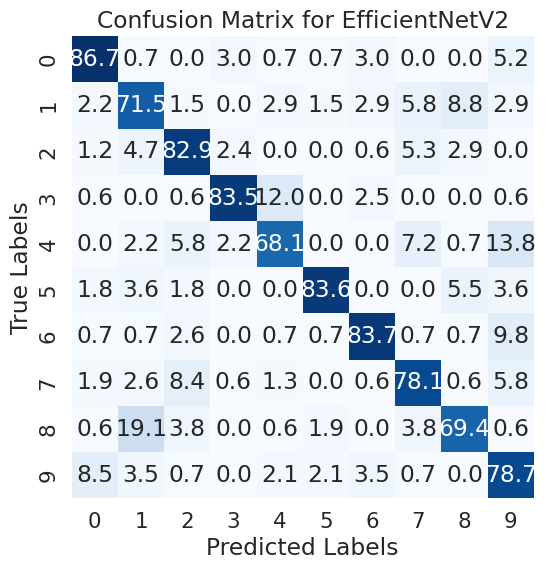

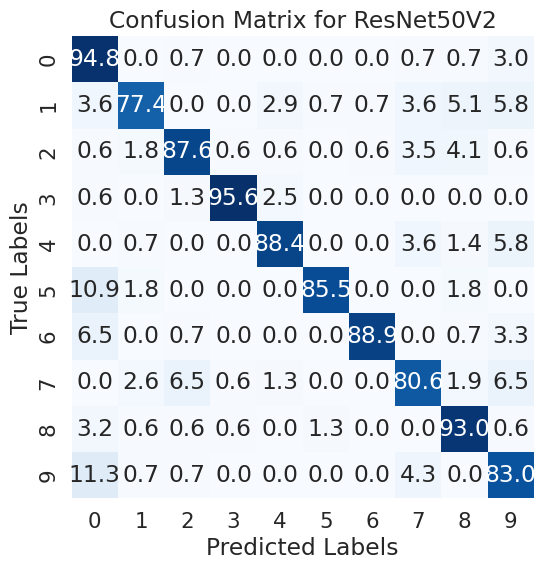

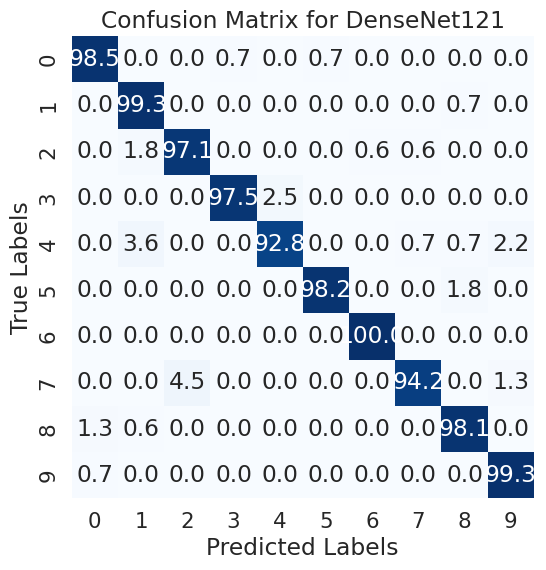

[codecarbon WARNING @ 08:19:19] Tracker already stopped !
[codecarbon INFO @ 08:19:19] Energy consumed for RAM : 0.032336 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:19:19] RAM : 31.30 W during 33.58 s [measurement time: 0.0017]
[codecarbon INFO @ 08:19:19] Energy consumed for all GPUs : 0.072866 kWh. Total GPU Power : 69.02640084455743 W
[codecarbon DEBUG @ 08:19:19] GPU : 69.03 W during 33.58 s [measurement time: 0.0034]
[codecarbon INFO @ 08:19:19] Energy consumed for all CPUs : 0.043928 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:19:19] CPU : 42.50 W during 33.59 s [measurement time: 0.0011]
[codecarbon INFO @ 08:19:19] 0.149129 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:19:19] last_duration=33.57839918136597
------------------------
[codecarbon DEBUG @ 08:19:19] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 08:19:19] EmissionsData(timestamp='2024-07-30T08:19:19', project_name='codecarbon', run_id='39c6

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

tracker.start()

# Realizar predicciones en el conjunto de prueba
predictions_efficientnetv2 = efficientnetv2_model.predict(x_test, verbose=1)  # Predecir etiquetas para las imágenes de prueba
predictions_resnet50v2 = resnet50v2_model.predict(x_test, verbose=1)
predictions_densenet121 = densenet121_model.predict(x_test, verbose=1)

# Convertir probabilidades a etiquetas predichas
predicted_labels_efficientnetv2 = np.argmax(predictions_efficientnetv2, axis=1)
predicted_labels_resnet50v2 = np.argmax(predictions_resnet50v2, axis=1)
predicted_labels_densenet121 = np.argmax(predictions_densenet121, axis=1)

# Convertir etiquetas verdaderas a formato de etiquetas (no one-hot)
true_labels = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión para cada modelo
cm_efficientnetv2 = confusion_matrix(true_labels, predicted_labels_efficientnetv2)
cm_resnet50v2 = confusion_matrix(true_labels, predicted_labels_resnet50v2)
cm_densenet121 = confusion_matrix(true_labels, predicted_labels_densenet121)

# Calcular el número y porcentaje de cada clase
class_counts = np.unique(true_labels, return_counts=True)[1]  # Contar el número de ocurrencias de cada clase
class_percents = np.round(100 * class_counts / sum(class_counts), decimals=1)  # Calcular porcentaje de cada clase
class_names = sorted(np.unique(true_labels))  # Obtener nombres de las clases ordenadas

# Función para visualizar la matriz de confusión
def plot_confusion_matrix(cm, class_names, model_name):
    plt.figure(figsize=(6, 6))  # Tamaño de la figura
    sns.set(font_scale=1.4)  # Escala de la fuente para mejor visualización
    sns.heatmap(np.round(100 * cm / cm.sum(axis=1)[:, np.newaxis], decimals=1), annot=True, fmt='',
                cmap="Blues", cbar=False, square=True,  # Configuración del mapa de calor
                xticklabels=class_names,  # Etiquetas en el eje x
                yticklabels=class_names)  # Etiquetas en el eje y
    plt.xlabel("Predicted Labels")  # Etiqueta del eje x
    plt.ylabel("True Labels")  # Etiqueta del eje y
    plt.title(f"Confusion Matrix for {model_name}")  # Título con el nombre del modelo
    plt.show()  # Mostrar la figura

# Visualizar la matriz de confusión para cada modelo
plot_confusion_matrix(cm_efficientnetv2, class_names, "EfficientNetV2")
plot_confusion_matrix(cm_resnet50v2, class_names, "ResNet50V2")
plot_confusion_matrix(cm_densenet121, class_names, "DenseNet121")

tracker.stop()

[codecarbon WARNING @ 08:19:19] Already started tracking


44/44 [==============================] - 2s 38ms/step


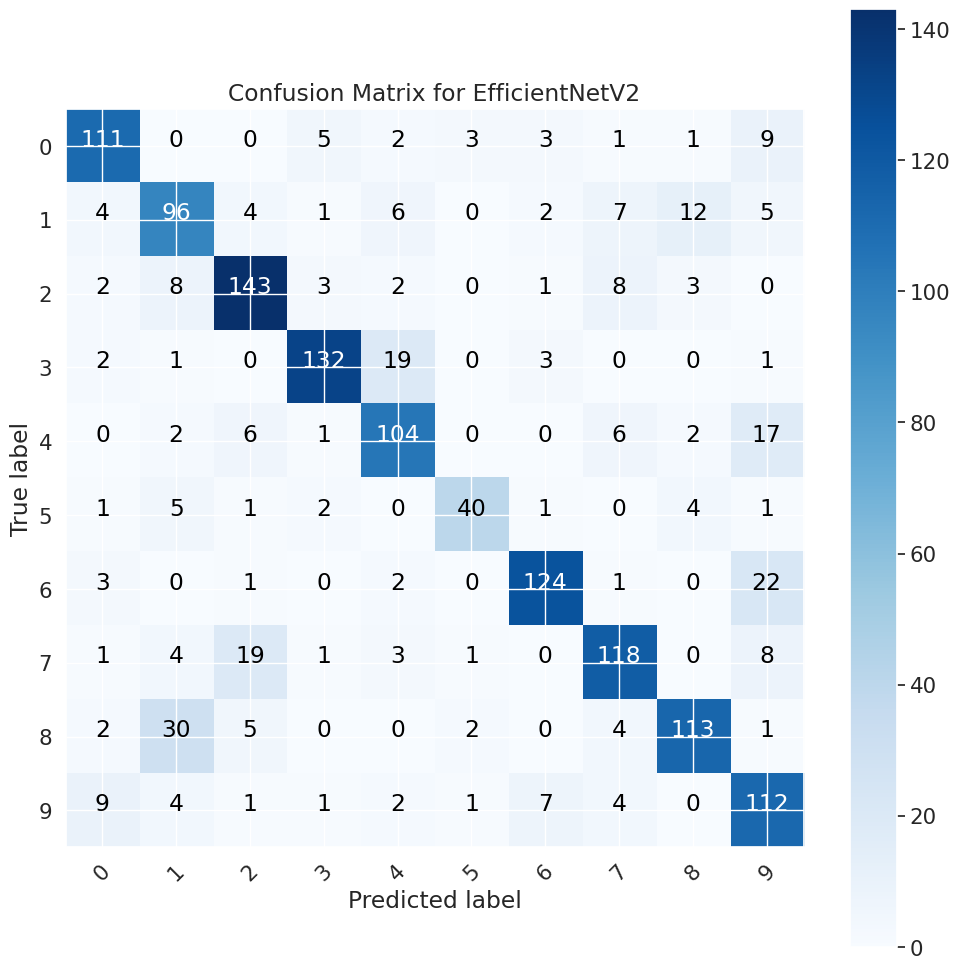

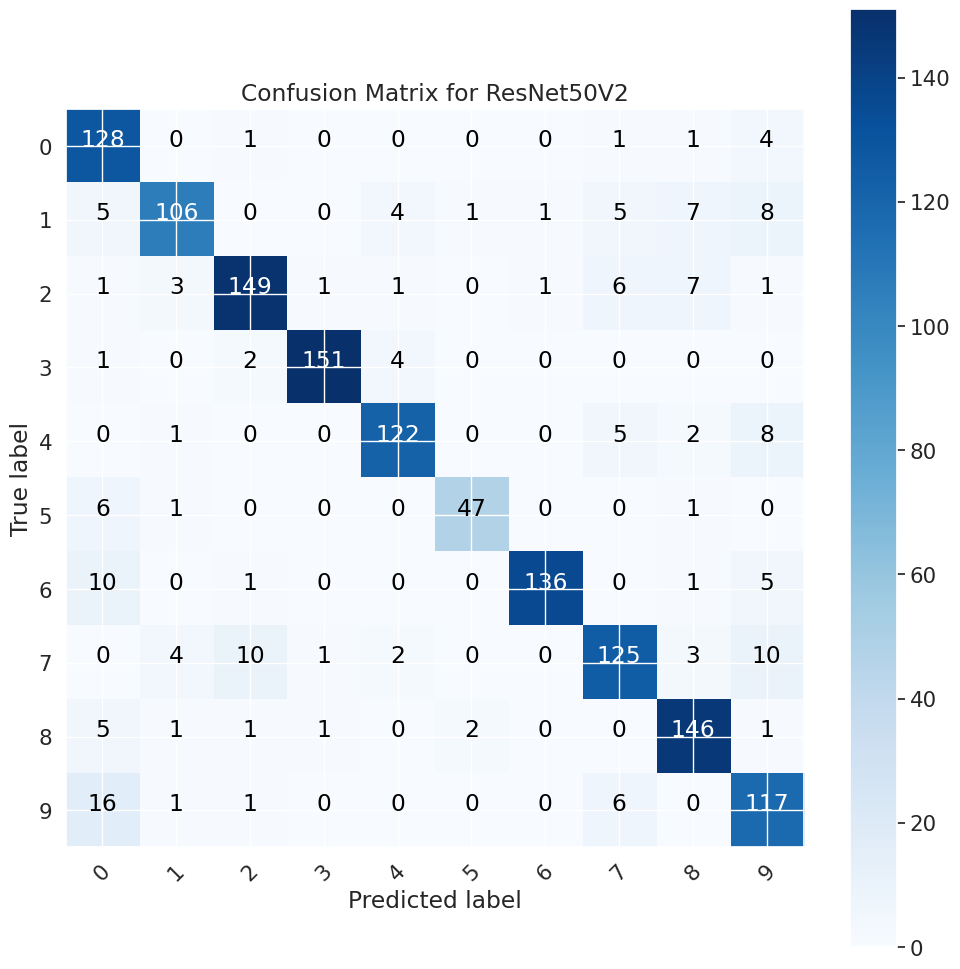

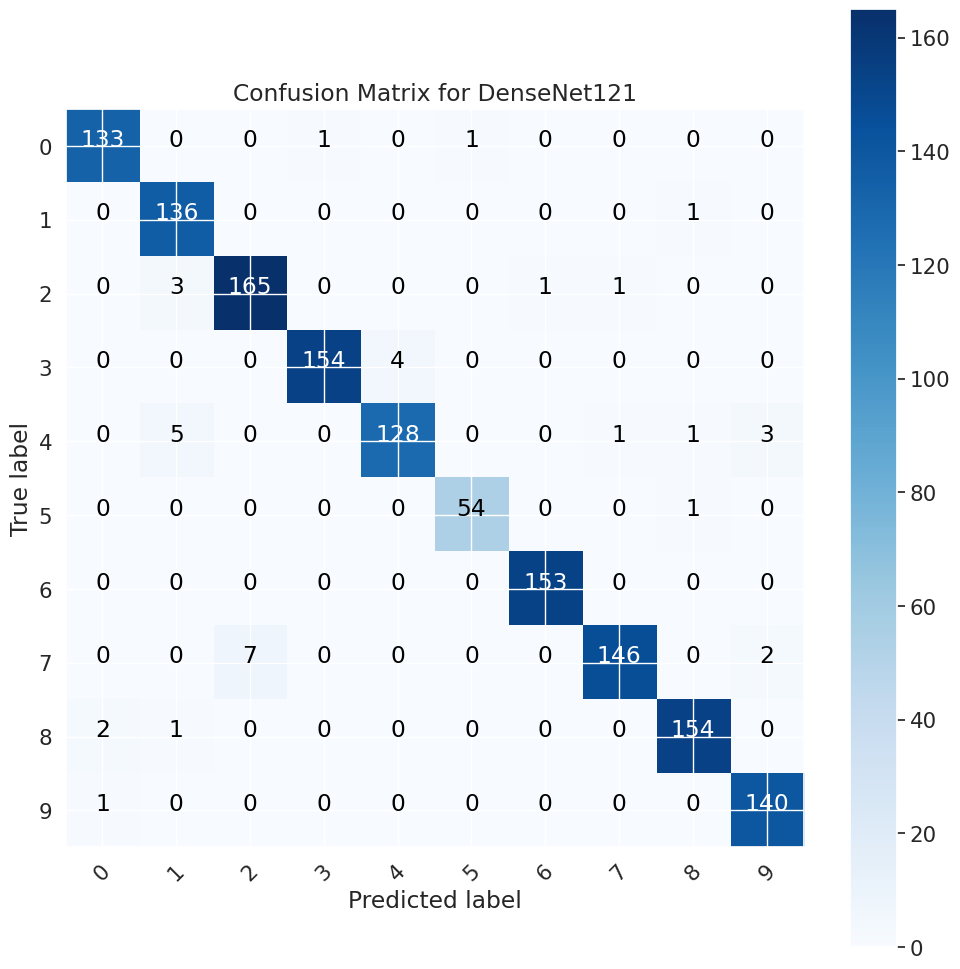

[codecarbon WARNING @ 08:19:31] Tracker already stopped !
[codecarbon INFO @ 08:19:31] Energy consumed for RAM : 0.032434 kWh. RAM Power : 31.30389261245728 W
[codecarbon DEBUG @ 08:19:31] RAM : 31.30 W during 11.32 s [measurement time: 0.0023]
[codecarbon INFO @ 08:19:31] Energy consumed for all GPUs : 0.073191 kWh. Total GPU Power : 103.28380522126899 W
[codecarbon DEBUG @ 08:19:31] GPU : 103.28 W during 11.32 s [measurement time: 0.0032]
[codecarbon INFO @ 08:19:31] Energy consumed for all CPUs : 0.044062 kWh. Total CPU Power : 42.5 W
[codecarbon DEBUG @ 08:19:31] CPU : 42.50 W during 11.32 s [measurement time: 0.0026]
[codecarbon INFO @ 08:19:31] 0.149686 kWh of electricity used since the beginning.
[codecarbon DEBUG @ 08:19:31] last_duration=11.31556749343872
------------------------
[codecarbon DEBUG @ 08:19:31] We apply an energy mix of 489 g.CO2eq/kWh for Singapore
[codecarbon DEBUG @ 08:19:31] EmissionsData(timestamp='2024-07-30T08:19:31', project_name='codecarbon', run_id='39

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

tracker.start()

# Función para visualizar la matriz de confusión
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Realizar predicciones en el conjunto de prueba
predictions_efficientnetv2 = efficientnetv2_model.predict(x_test, verbose=1)
predictions_resnet50v2 = resnet50v2_model.predict(x_test, verbose=1)
predictions_densenet121 = densenet121_model.predict(x_test, verbose=1)

# Convertir probabilidades a etiquetas predichas
predicted_labels_efficientnetv2 = np.argmax(predictions_efficientnetv2, axis=1)
predicted_labels_resnet50v2 = np.argmax(predictions_resnet50v2, axis=1)
predicted_labels_densenet121 = np.argmax(predictions_densenet121, axis=1)

# Convertir etiquetas verdaderas a formato de etiquetas (no one-hot)
true_labels = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión para cada modelo
cm_efficientnetv2 = confusion_matrix(true_labels, predicted_labels_efficientnetv2)
cm_resnet50v2 = confusion_matrix(true_labels, predicted_labels_resnet50v2)
cm_densenet121 = confusion_matrix(true_labels, predicted_labels_densenet121)

# Obtener nombres de las clases
class_names = sorted(np.unique(true_labels))

# Visualizar la matriz de confusión para EfficientNetV2
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm_efficientnetv2, classes=class_names, normalize=False)
plt.title('Confusion Matrix for EfficientNetV2')
plt.show()

# Visualizar la matriz de confusión para ResNet50V2
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm_resnet50v2, classes=class_names, normalize=False)
plt.title('Confusion Matrix for ResNet50V2')
plt.show()

# Visualizar la matriz de confusión para DenseNet121
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm_densenet121, classes=class_names, normalize=False)
plt.title('Confusion Matrix for DenseNet121')
plt.show()

tracker.stop()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Definir el número máximo de imágenes para evaluar
max_images = 3589

# Función para calcular las métricas y crear un DataFrame
def evaluate_model(true_labels, predicted_labels, cm, model_name):
    # Calcular precision, recall y f1-score
    precision = np.diag(cm) / np.sum(cm, axis=0)
    recall = np.diag(cm) / np.sum(cm, axis=1)
    f1 = 2 * (precision * recall) / (precision + recall)

    # Calcular precision, recall y f1-score promediados (macro/micro)
    macro_precision = np.mean(precision[:max_images])
    macro_recall = np.mean(recall[:max_images])
    macro_f1_score = np.mean(f1[:max_images])

    micro_precision = np.sum(np.diag(cm)[:max_images]) / np.sum(cm[:max_images])
    micro_recall = np.sum(np.diag(cm)[:max_images]) / np.sum(cm[:max_images], axis=None)
    micro_f1_score = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

    # Calcular precision, recall y f1-score ponderados
    weighted_precision = precision_score(true_labels[:max_images], predicted_labels[:max_images], average='weighted')
    weighted_recall = recall_score(true_labels[:max_images], predicted_labels[:max_images], average='weighted')
    weighted_f1_score = f1_score(true_labels[:max_images], predicted_labels[:max_images], average='weighted')

    # Crear un diccionario de métricas de evaluación
    metrics = {'Precision': [macro_precision, micro_precision, weighted_precision],
               'Recall': [macro_recall, micro_recall, weighted_recall],
               'F1-Score': [macro_f1_score, micro_f1_score, weighted_f1_score]}

    # Crear un DataFrame de Pandas a partir del diccionario
    df = pd.DataFrame(metrics, index=['Macro-Averaged', 'Micro-Averaged', 'Weighted'])

    # Imprimir la tabla
    print(f"Evaluation metrics for {model_name}:\n", df)
    print("\n")

# Evaluar EfficientNetV2
evaluate_model(true_labels, predicted_labels_efficientnetv2, cm_efficientnetv2, "EfficientNetV2")

# Evaluar ResNet50V2
evaluate_model(true_labels, predicted_labels_resnet50v2, cm_resnet50v2, "ResNet50V2")

# Evaluar DenseNet121
evaluate_model(true_labels, predicted_labels_densenet121, cm_densenet121, "DenseNet121")


Evaluation metrics for EfficientNetV2:
                 Precision    Recall  F1-Score
Macro-Averaged   0.789948  0.776629  0.780974
Micro-Averaged   0.781272  0.781272  0.781272
Weighted         0.789389  0.781272  0.783205


Evaluation metrics for ResNet50V2:
                 Precision    Recall  F1-Score
Macro-Averaged   0.884990  0.874771  0.877310
Micro-Averaged   0.877055  0.877055  0.877055
Weighted         0.883894  0.877055  0.878034


Evaluation metrics for DenseNet121:
                 Precision    Recall  F1-Score
Macro-Averaged   0.974664  0.974825  0.974534
Micro-Averaged   0.974267  0.974267  0.974267
Weighted         0.974588  0.974267  0.974212




In [ ]:
import numpy as np
import cv2

# Función para agregar ruido gaussiano
def add_gaussian_noise(image, mean=0, std=0.1):
    row, col, ch = image.shape
    gauss = np.random.normal(mean, std, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = image + gauss
    noisy = np.clip(noisy, 0, 1)  # Asegurar que los valores estén dentro del rango [0, 1]
    return noisy

# Función para agregar ruido de sal y pimienta
def add_salt_and_pepper_noise(image, salt_prob=0.05, pepper_prob=0.05):
    row, col, ch = image.shape
    noisy = np.copy(image)

    # Sal (blanco)
    num_salt = np.ceil(salt_prob * image.size * 0.5)
    coords = [np.random.randint(0, i, int(num_salt)) for i in image.shape]
    noisy[coords[0], coords[1], :] = 1

    # Pimienta (negro)
    num_pepper = np.ceil(pepper_prob * image.size * 0.5)
    coords = [np.random.randint(0, i, int(num_pepper)) for i in image.shape]
    noisy[coords[0], coords[1], :] = 0

    return noisy

# Función para agregar ruido speckle
def add_speckle_noise(image):
    row, col, ch = image.shape
    gauss = np.random.randn(row, col, ch)
    gauss = gauss.reshape(row, col, ch)
    noisy = image + image * gauss
    noisy = np.clip(noisy, 0, 1)  # Asegurar que los valores estén dentro del rango [0, 1]
    return noisy

def generate_noisy_images(x_test, noise_type='gaussian', mean=0, std=0.1, salt_prob=0.05, pepper_prob=0.05):
    noisy_images = []
    for img in x_test:
        img = img.astype('float32') / 255.0  # Normalizar imagen
        if noise_type == 'gaussian':
            noisy_img = add_gaussian_noise(img, mean, std)
        elif noise_type == 'salt_and_pepper':
            noisy_img = add_salt_and_pepper_noise(img, salt_prob, pepper_prob)
        elif noise_type == 'speckle':
            noisy_img = add_speckle_noise(img)
        noisy_images.append(noisy_img)
    return np.array(noisy_images)

# Generar conjuntos de imágenes con distintos tipos de ruido
x_test_gaussian = generate_noisy_images(x_test, noise_type='gaussian')
x_test_salt_and_pepper = generate_noisy_images(x_test, noise_type='salt_and_pepper')
x_test_speckle = generate_noisy_images(x_test, noise_type='speckle')


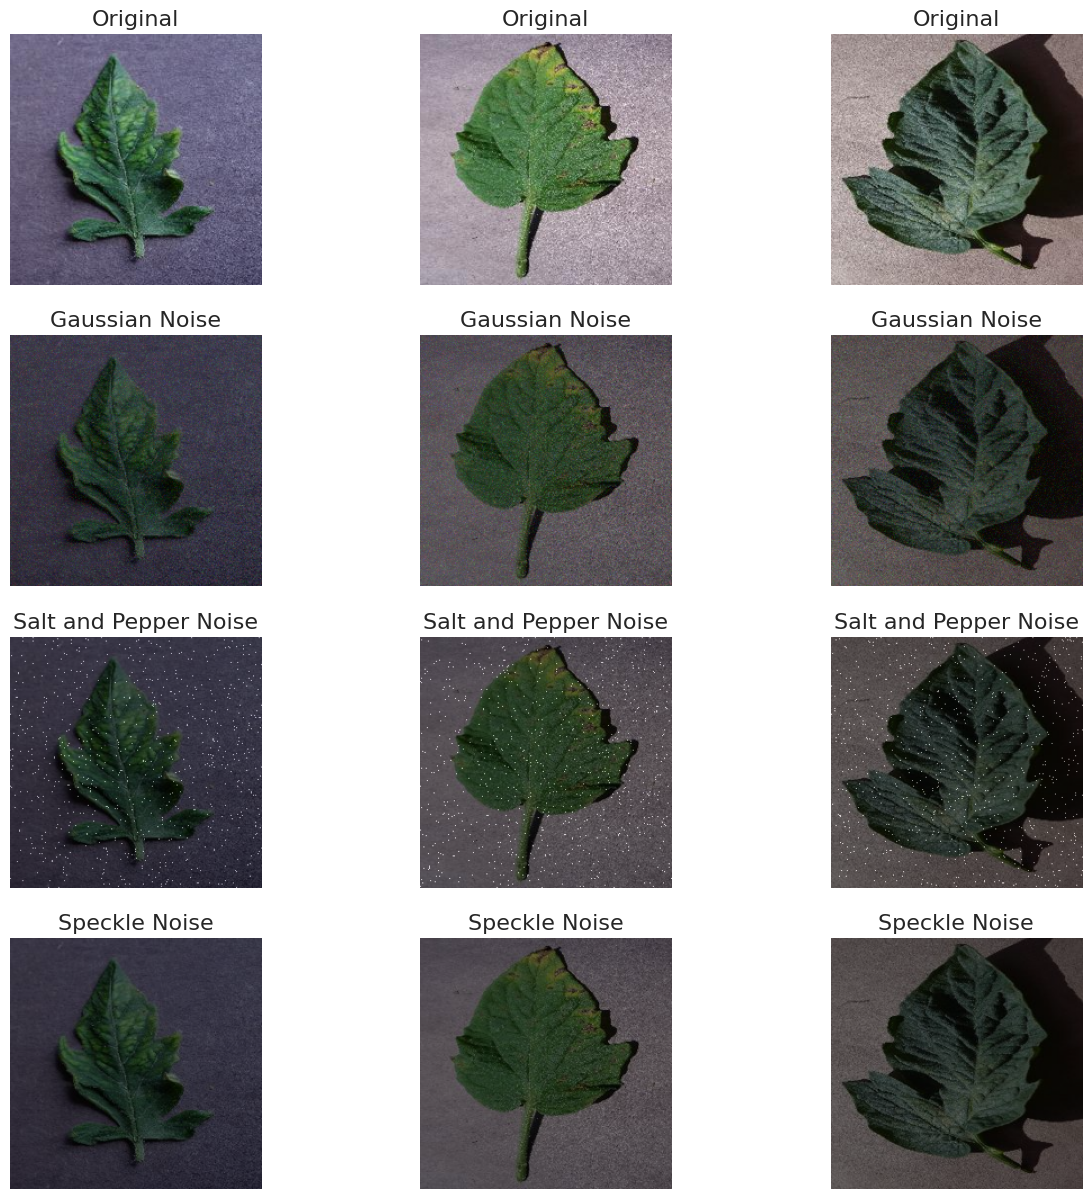

44/44 [==============================] - 1s 20ms/step
Confusion Matrix for EfficientNetV2 on Gaussian noisy images:


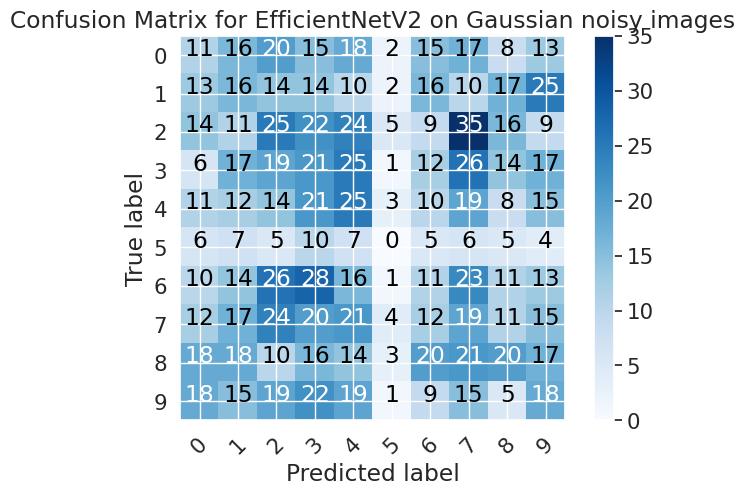

44/44 [==============================] - 1s 26ms/step
Confusion Matrix for ResNet50V2 on Gaussian noisy images:


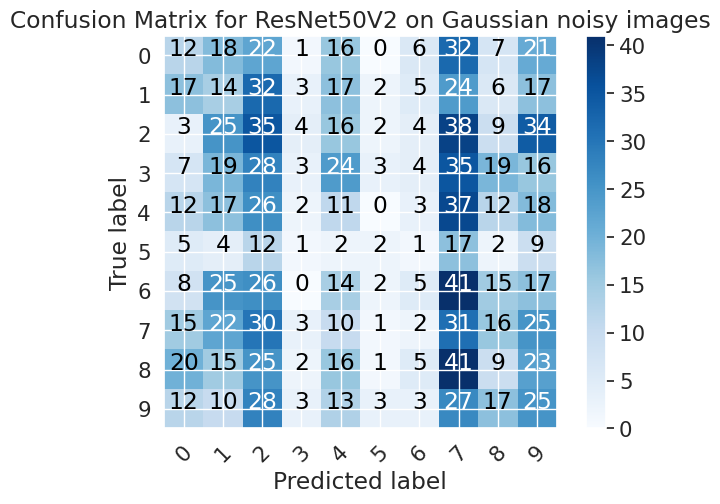

44/44 [==============================] - 2s 38ms/step
Confusion Matrix for DenseNet121 on Gaussian noisy images:


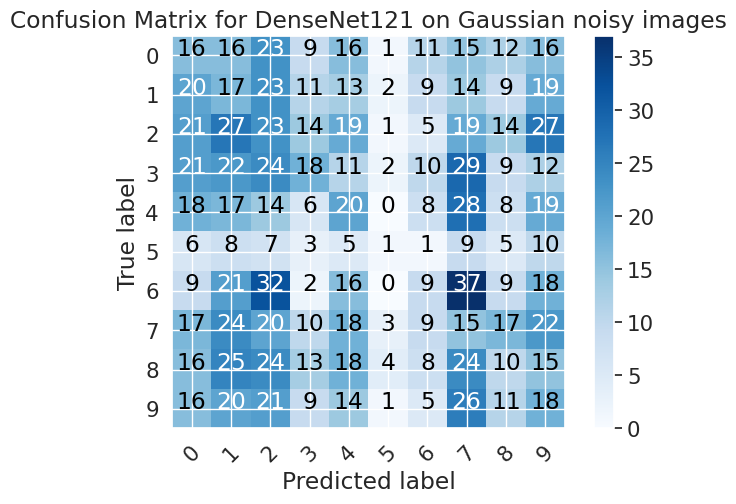

44/44 [==============================] - 1s 18ms/step
Confusion Matrix for EfficientNetV2 on Salt and Pepper noisy images:


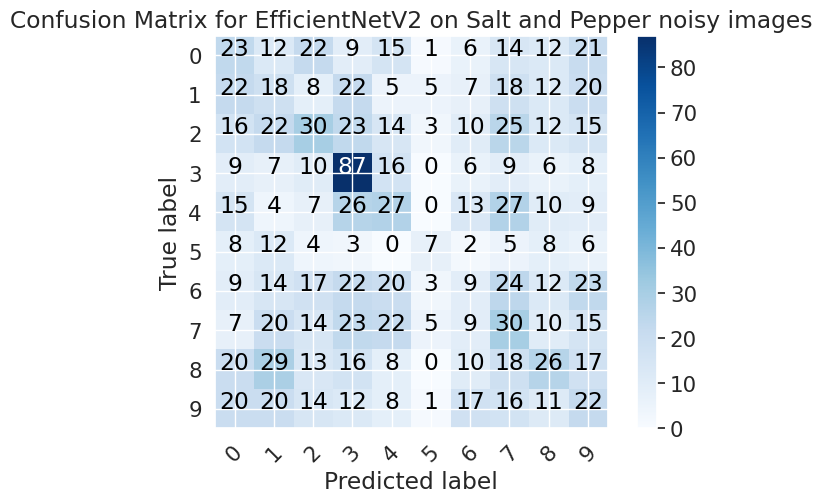

44/44 [==============================] - 1s 25ms/step
Confusion Matrix for ResNet50V2 on Salt and Pepper noisy images:


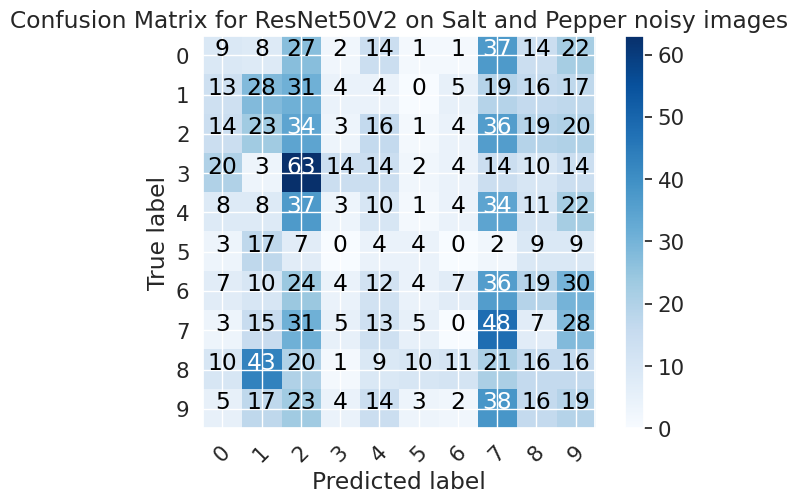

44/44 [==============================] - 2s 37ms/step
Confusion Matrix for DenseNet121 on Salt and Pepper noisy images:


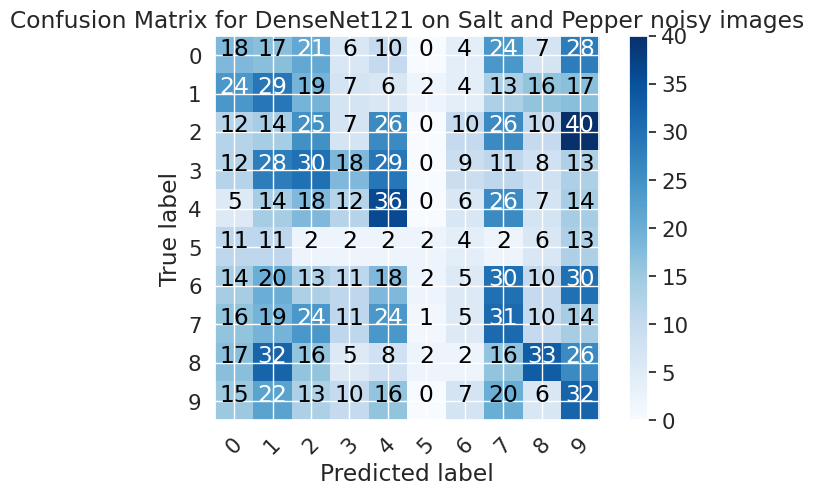

44/44 [==============================] - 1s 20ms/step
Confusion Matrix for EfficientNetV2 on Speckle noisy images:


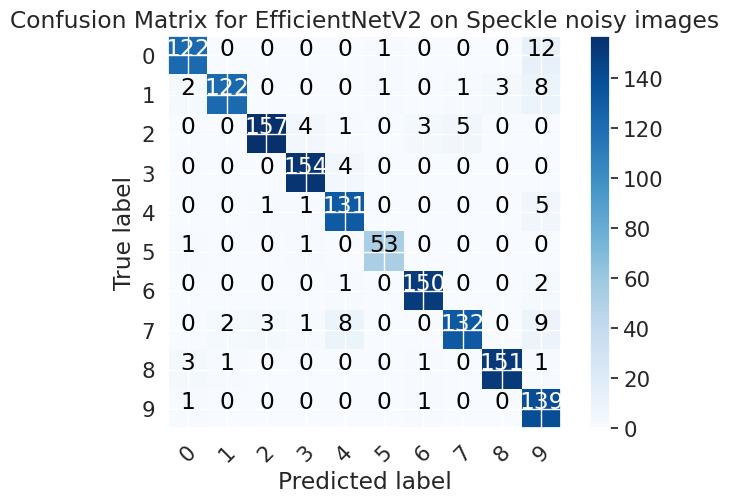

44/44 [==============================] - 1s 26ms/step
Confusion Matrix for ResNet50V2 on Speckle noisy images:


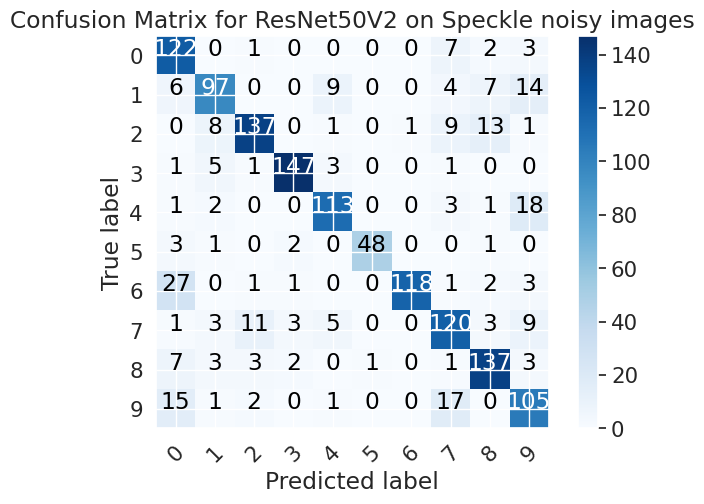

44/44 [==============================] - 2s 37ms/step
Confusion Matrix for DenseNet121 on Speckle noisy images:


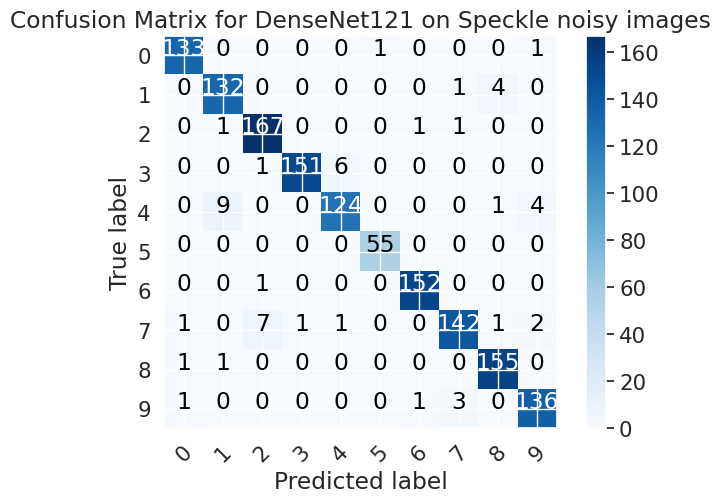

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Función para agregar ruido gaussiano
def add_gaussian_noise(image, mean=0, std=0.1):
    row, col, ch = image.shape
    gauss = np.random.normal(mean, std, (row, col, ch))
    noisy = image + gauss
    noisy = np.clip(noisy, 0, 1)  # Asegurar que los valores estén dentro del rango [0, 1]
    return noisy

# Función para agregar ruido de sal y pimienta
def add_salt_and_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    row, col, ch = image.shape
    noisy = np.copy(image)

    # Sal (blanco)
    num_salt = np.ceil(salt_prob * image.size * 0.5)
    coords = [np.random.randint(0, i, int(num_salt)) for i in image.shape]
    noisy[coords[0], coords[1], :] = 1

    # Pimienta (negro)
    num_pepper = np.ceil(pepper_prob * image.size * 0.5)
    coords = [np.random.randint(0, i, int(num_pepper)) for i in image.shape]
    noisy[coords[0], coords[1], :] = 0

    return noisy

# Función para agregar ruido speckle
def add_speckle_noise(image):
    row, col, ch = image.shape
    gauss = np.random.randn(row, col, ch) * 0.1
    noisy = image + image * gauss
    noisy = np.clip(noisy, 0, 1)  # Asegurar que los valores estén dentro del rango [0, 1]
    return noisy

# Función para generar imágenes con ruido
def generate_noisy_images(x_test, noise_type='gaussian', mean=0, std=0.1, salt_prob=0.01, pepper_prob=0.01):
    noisy_images = []
    for img in x_test:
        img = img.astype('float32') / 255.0  # Normalizar imagen
        if noise_type == 'gaussian':
            noisy_img = add_gaussian_noise(img, mean, std)
        elif noise_type == 'salt_and_pepper':
            noisy_img = add_salt_and_pepper_noise(img, salt_prob, pepper_prob)
        elif noise_type == 'speckle':
            noisy_img = add_speckle_noise(img)
        noisy_images.append(noisy_img)
    return np.array(noisy_images)

# Función para mezclar ruido con la imagen original solo para visualización
def blend_images_with_noise(original_images, noisy_images):
    blended_images = (original_images * 0.5) + (noisy_images * 0.5)
    blended_images = np.clip(blended_images, 0, 1)  # Asegurar que los valores estén dentro del rango [0, 1]
    return blended_images

# Función para mostrar imágenes originales y con ruido
def show_noisy_images(x_test, x_test_gaussian, x_test_salt_and_pepper, x_test_speckle, num_images=3):
    indices = np.random.choice(len(x_test), num_images, replace=False)
    plt.figure(figsize=(15, 15))

    # Mostrar imágenes originales y con ruido en una sola fila
    for i, idx in enumerate(indices):
        # Imagen original
        ax = plt.subplot(4, num_images, i + 1)
        plt.imshow(x_test[idx])  # Mostrar la imagen original tal cual
        plt.title(f"Original", fontsize=16)
        plt.axis("off")

    # Mezclar imágenes con ruido para visualización
    blended_gaussian = blend_images_with_noise(x_test, x_test_gaussian)
    blended_salt_and_pepper = blend_images_with_noise(x_test, x_test_salt_and_pepper)
    blended_speckle = blend_images_with_noise(x_test, x_test_speckle)

    # Mostrar imágenes con ruido gaussiano
    for i, idx in enumerate(indices):
        ax = plt.subplot(4, num_images, num_images + i + 1)
        plt.imshow((blended_gaussian[idx] * 255).astype('uint8'))  # Convertir a uint8 para visualización correcta
        plt.title(f"Gaussian Noise", fontsize=16)
        plt.axis("off")

    # Mostrar imágenes con ruido de sal y pimienta
    for i, idx in enumerate(indices):
        ax = plt.subplot(4, num_images, 2 * num_images + i + 1)
        plt.imshow((blended_salt_and_pepper[idx] * 255).astype('uint8'))  # Convertir a uint8 para visualización correcta
        plt.title(f"Salt and Pepper Noise", fontsize=16)
        plt.axis("off")

    # Mostrar imágenes con ruido speckle
    for i, idx in enumerate(indices):
        ax = plt.subplot(4, num_images, 3 * num_images + i + 1)
        plt.imshow((blended_speckle[idx] * 255).astype('uint8'))  # Convertir a uint8 para visualización correcta
        plt.title(f"Speckle Noise", fontsize=16)
        plt.axis("off")

    plt.show()

# Función para evaluar modelos en imágenes con ruido
def evaluate_models_on_noisy_images(models, x_test_noisy, y_test, noise_type):
    for model_name, model in models.items():
        predictions = model.predict(x_test_noisy, verbose=1)
        predicted_labels = np.argmax(predictions, axis=1)
        true_labels = np.argmax(y_test, axis=1)
        cm = confusion_matrix(true_labels, predicted_labels)

        print(f"Confusion Matrix for {model_name} on {noise_type} noisy images:")
        plot_confusion_matrix(cm, classes=class_names)
        plt.title(f"Confusion Matrix for {model_name} on {noise_type} noisy images")
        plt.show()

# Definir modelos a evaluar
models = {
    'EfficientNetV2': efficientnetv2_model,
    'ResNet50V2': resnet50v2_model,
    'DenseNet121': densenet121_model
}

# Generar conjuntos de imágenes con distintos tipos de ruido
x_test_gaussian = generate_noisy_images(x_test, noise_type='gaussian')
x_test_salt_and_pepper = generate_noisy_images(x_test, noise_type='salt_and_pepper')
x_test_speckle = generate_noisy_images(x_test, noise_type='speckle')

# Mostrar imágenes originales y con distintos tipos de ruido
show_noisy_images(x_test, x_test_gaussian, x_test_salt_and_pepper, x_test_speckle, num_images=3)

# Evaluar los modelos en imágenes con distintos tipos de ruido
evaluate_models_on_noisy_images(models, x_test_gaussian, y_test, 'Gaussian')
evaluate_models_on_noisy_images(models, x_test_salt_and_pepper, y_test, 'Salt and Pepper')
evaluate_models_on_noisy_images(models, x_test_speckle, y_test, 'Speckle')


44/44 [==============================] - 1s 19ms/step
Confusion Matrix for EfficientNetV2 on Gaussian noisy images:


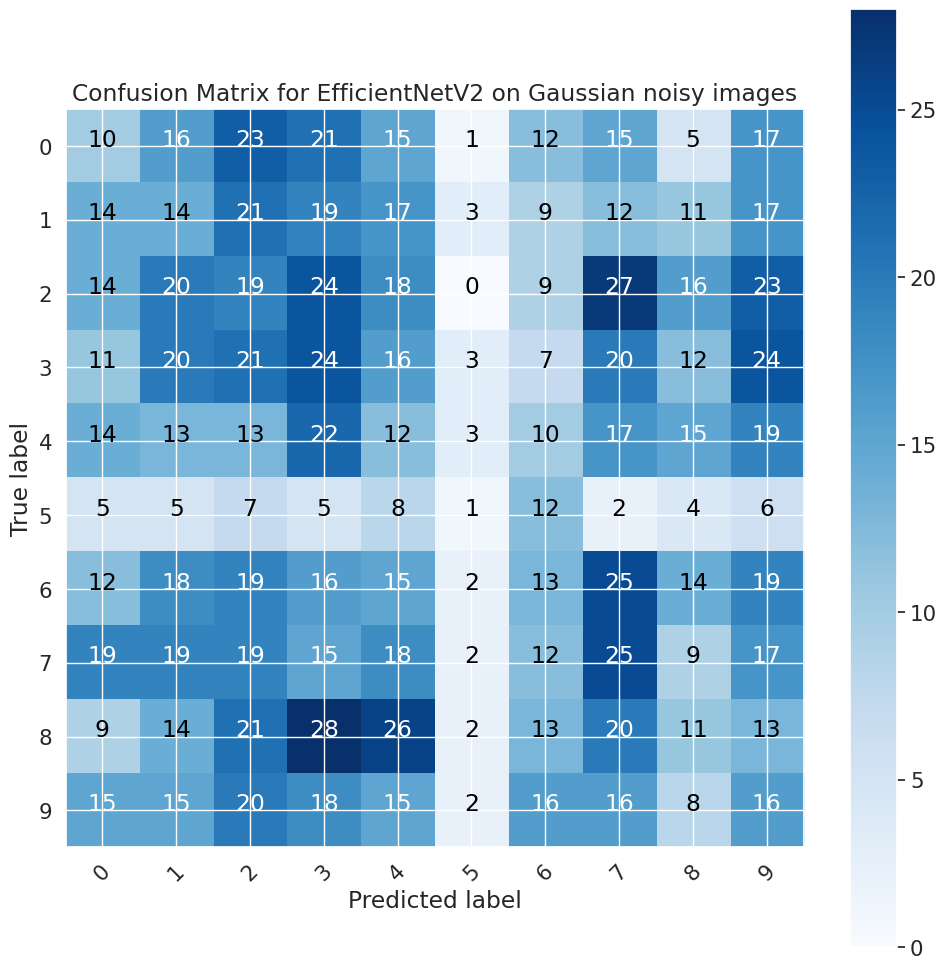

44/44 [==============================] - 1s 26ms/step
Confusion Matrix for ResNet50V2 on Gaussian noisy images:


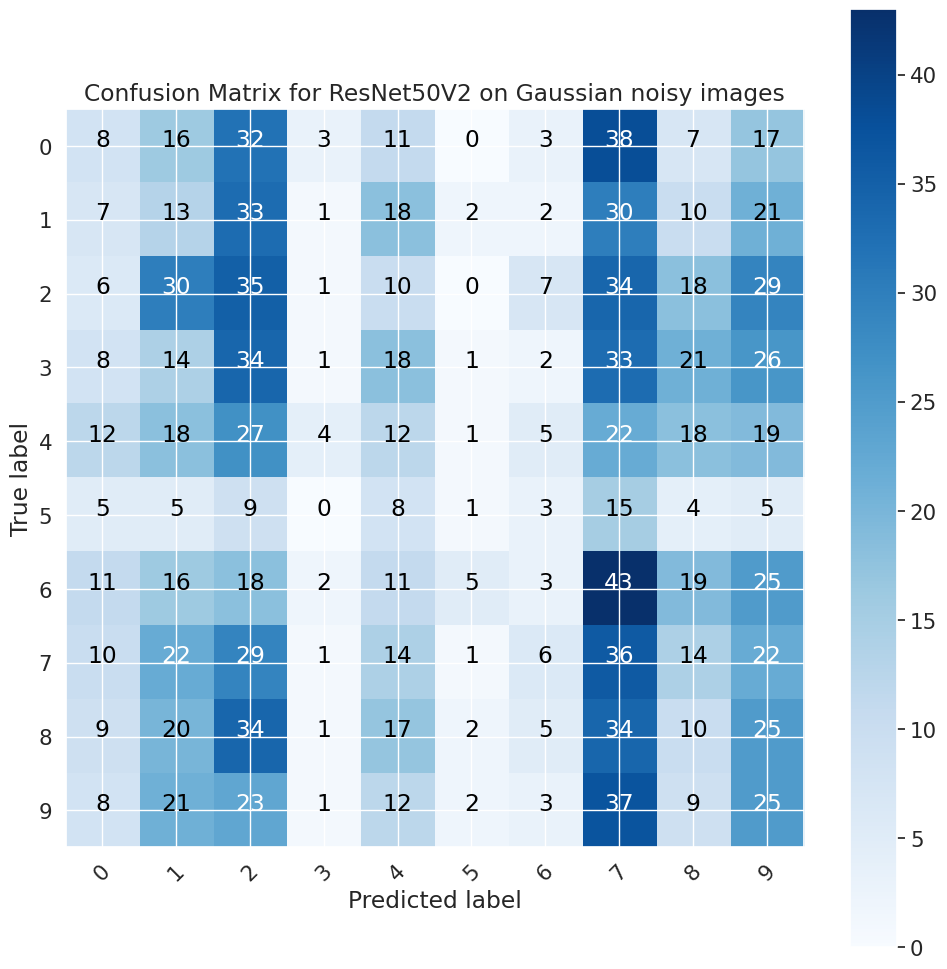

44/44 [==============================] - 2s 37ms/step
Confusion Matrix for DenseNet121 on Gaussian noisy images:


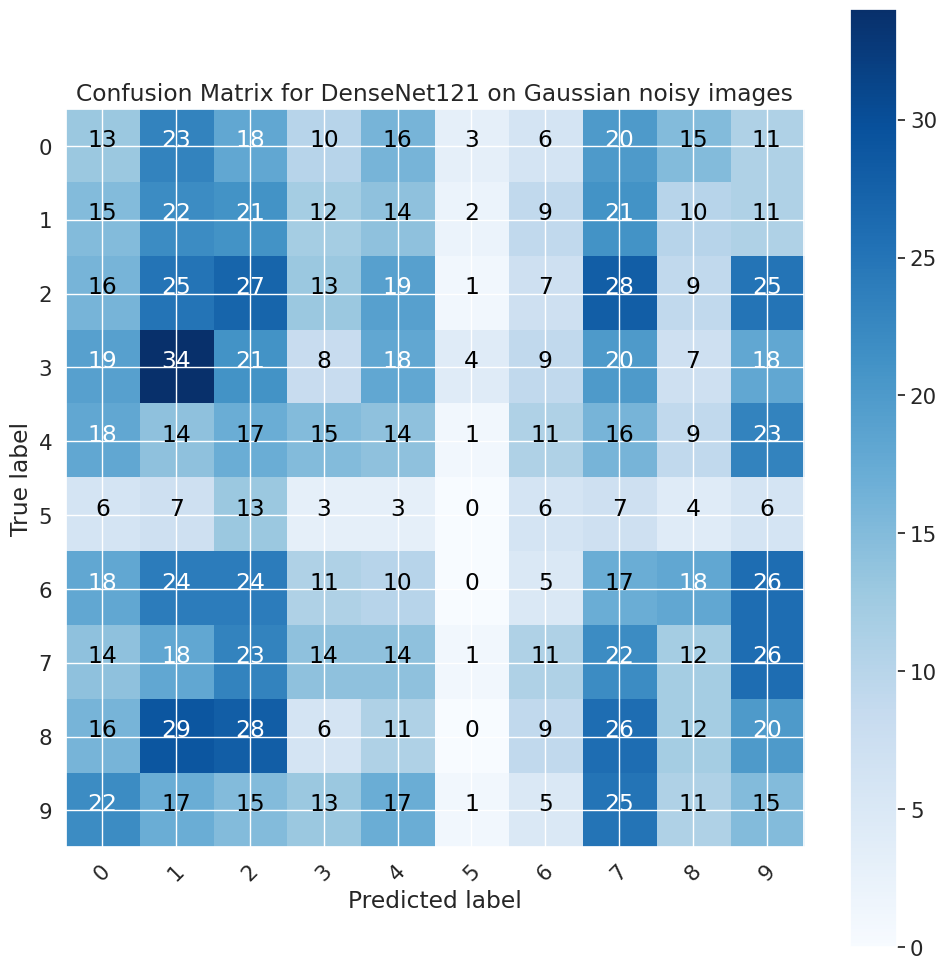

44/44 [==============================] - 1s 18ms/step
Confusion Matrix for EfficientNetV2 on Salt and Pepper noisy images:


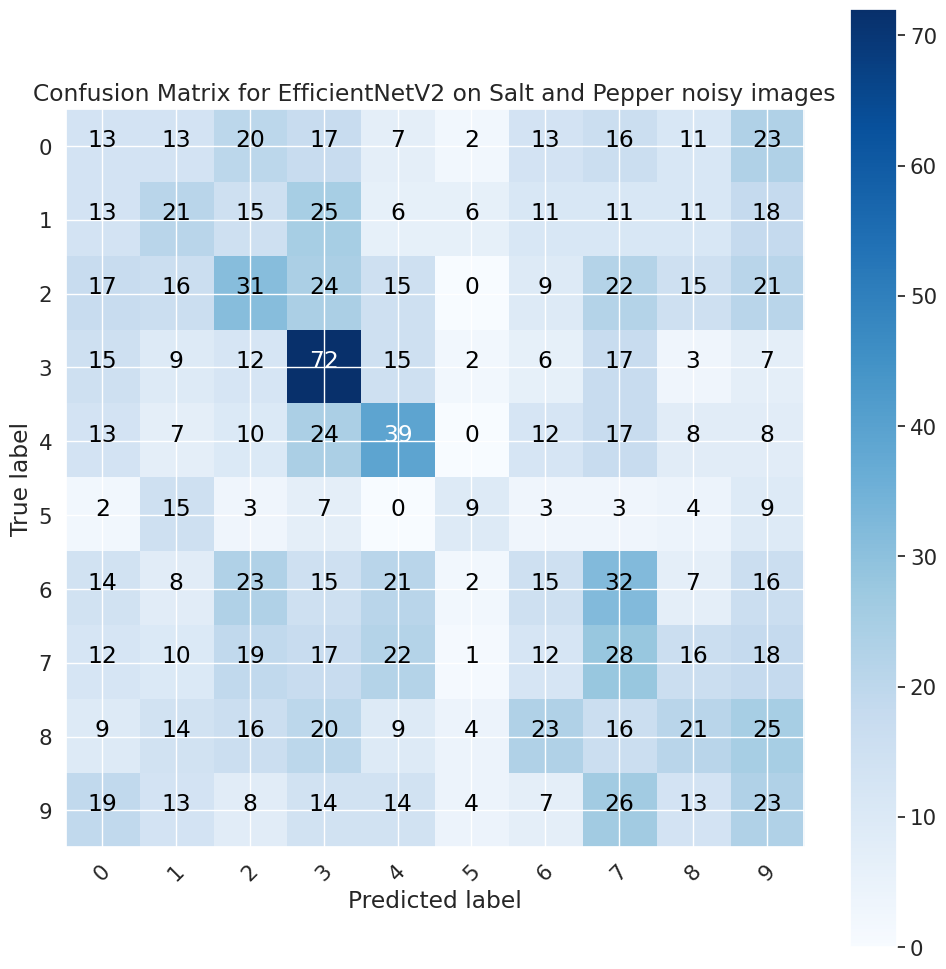

44/44 [==============================] - 1s 25ms/step
Confusion Matrix for ResNet50V2 on Salt and Pepper noisy images:


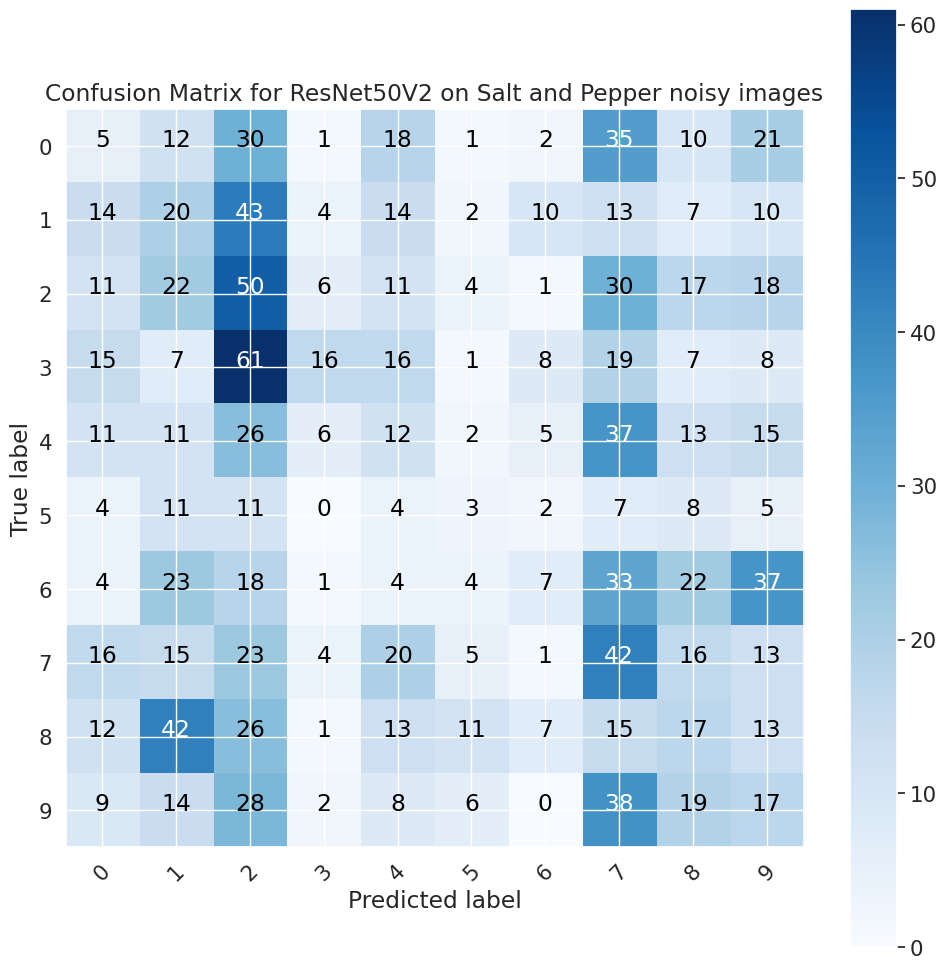

44/44 [==============================] - 2s 37ms/step
Confusion Matrix for DenseNet121 on Salt and Pepper noisy images:


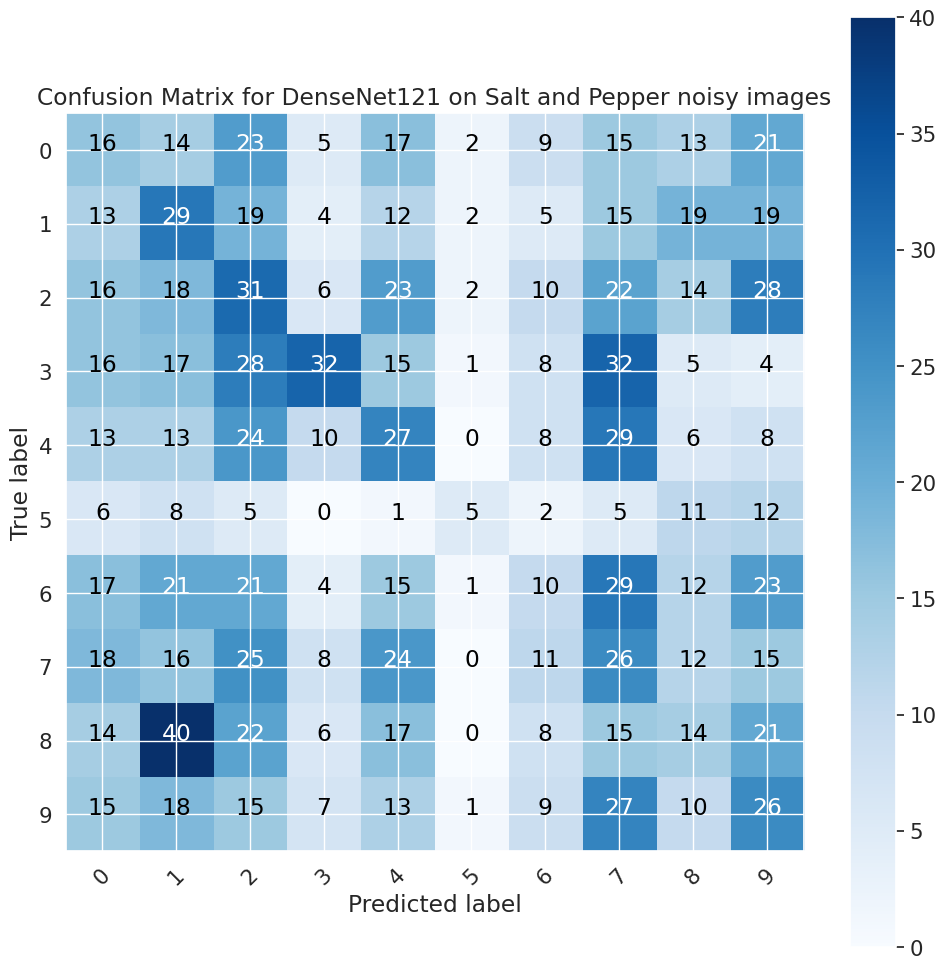

44/44 [==============================] - 1s 19ms/step
Confusion Matrix for EfficientNetV2 on Speckle noisy images:


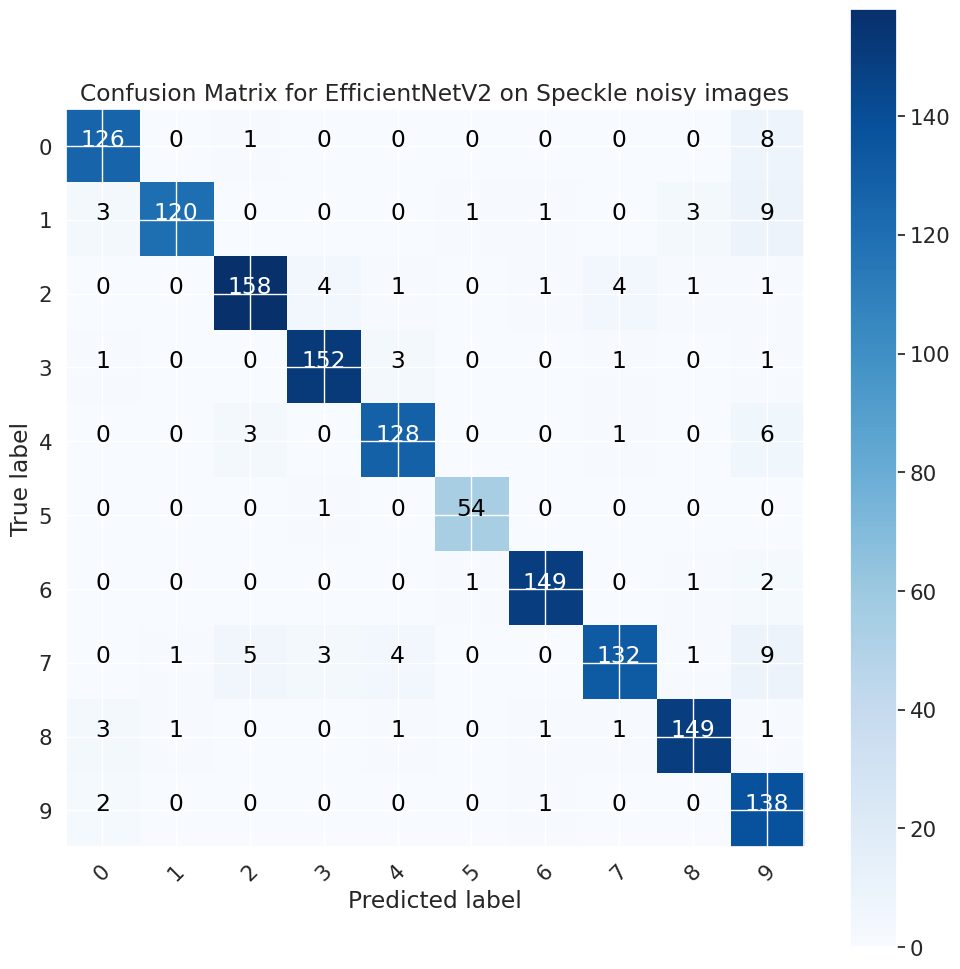

44/44 [==============================] - 1s 26ms/step
Confusion Matrix for ResNet50V2 on Speckle noisy images:


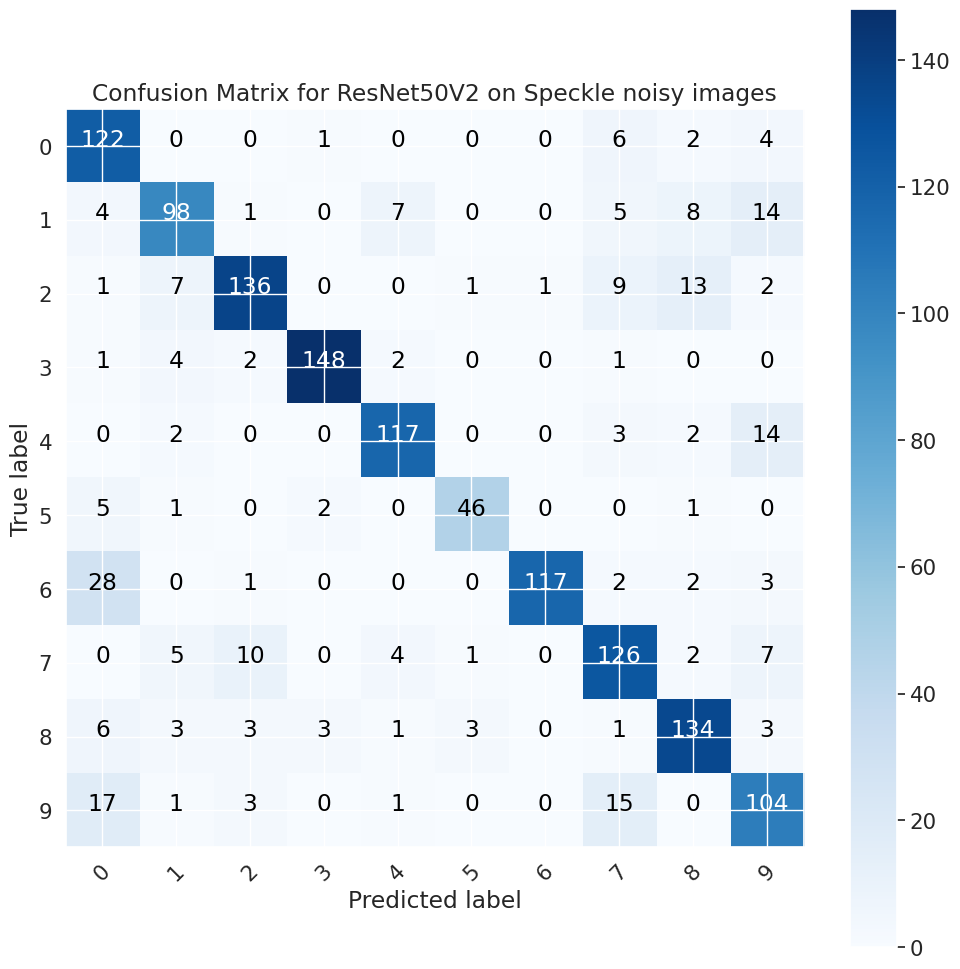

44/44 [==============================] - 2s 37ms/step
Confusion Matrix for DenseNet121 on Speckle noisy images:


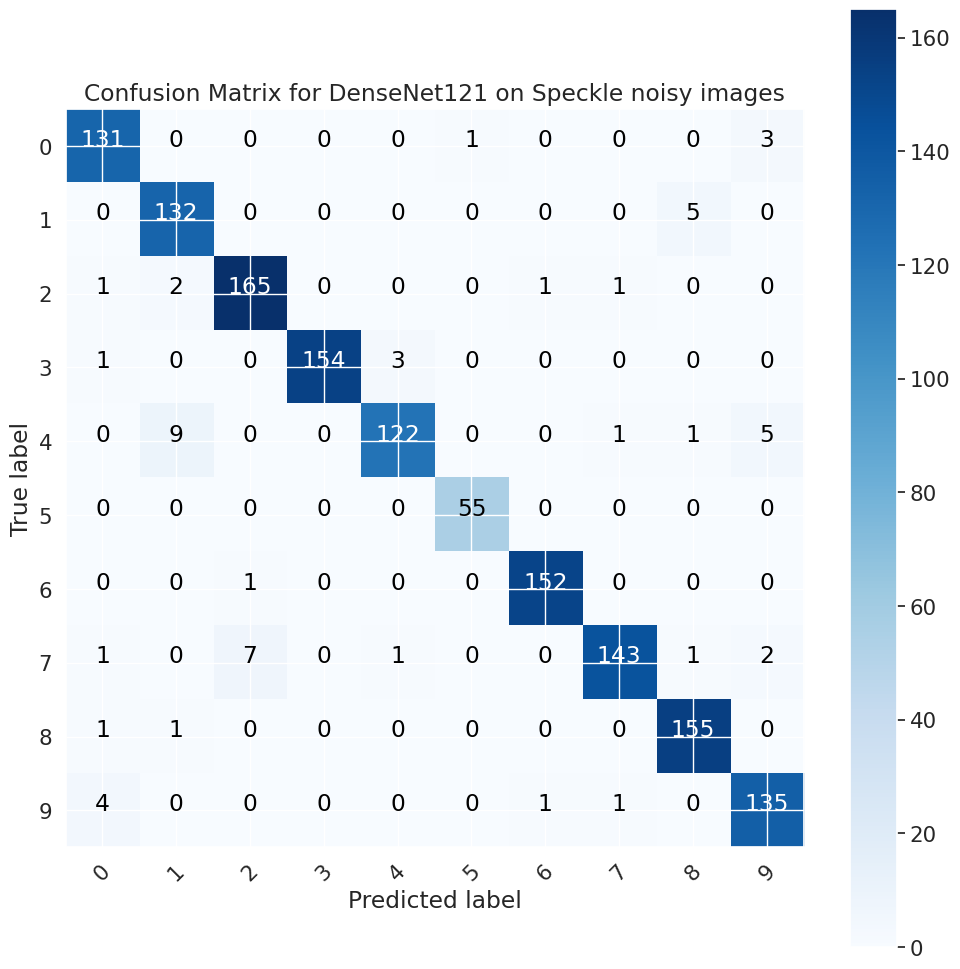

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Función para visualizar la matriz de confusión
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Función para evaluar modelos en imágenes con ruido
def evaluate_models_on_noisy_images(models, x_test_noisy, y_test, noise_type):
    for model_name, model in models.items():
        predictions = model.predict(x_test_noisy, verbose=1)
        predicted_labels = np.argmax(predictions, axis=1)
        true_labels = np.argmax(y_test, axis=1)
        cm = confusion_matrix(true_labels, predicted_labels)

        print(f"Confusion Matrix for {model_name} on {noise_type} noisy images:")
        plt.figure(figsize=(10, 10))
        plot_confusion_matrix(cm, classes=class_names, normalize=False)
        plt.title(f"Confusion Matrix for {model_name} on {noise_type} noisy images")
        plt.show()

# Definir modelos a evaluar
models = {
    'EfficientNetV2': efficientnetv2_model,
    'ResNet50V2': resnet50v2_model,
    'DenseNet121': densenet121_model
}

# Generar conjuntos de imágenes con distintos tipos de ruido
x_test_gaussian = generate_noisy_images(x_test, noise_type='gaussian')
x_test_salt_and_pepper = generate_noisy_images(x_test, noise_type='salt_and_pepper')
x_test_speckle = generate_noisy_images(x_test, noise_type='speckle')

# Evaluar los modelos en imágenes con distintos tipos de ruido
evaluate_models_on_noisy_images(models, x_test_gaussian, y_test, 'Gaussian')
evaluate_models_on_noisy_images(models, x_test_salt_and_pepper, y_test, 'Salt and Pepper')
evaluate_models_on_noisy_images(models, x_test_speckle, y_test, 'Speckle')


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Definir el número máximo de imágenes para evaluar
max_images = 3589

# Función para calcular las métricas y crear un DataFrame
def evaluate_model(true_labels, predicted_labels, cm, model_name):
    # Calcular precision, recall y f1-score
    precision = np.diag(cm) / np.sum(cm, axis=0)
    recall = np.diag(cm) / np.sum(cm, axis=1)
    f1 = 2 * (precision * recall) / (precision + recall)

    # Calcular precision, recall y f1-score promediados (macro/micro)
    macro_precision = np.mean(precision[:max_images])
    macro_recall = np.mean(recall[:max_images])
    macro_f1_score = np.mean(f1[:max_images])

    micro_precision = np.sum(np.diag(cm)[:max_images]) / np.sum(cm[:max_images])
    micro_recall = np.sum(np.diag(cm)[:max_images]) / np.sum(cm[:max_images], axis=None)
    micro_f1_score = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

    # Calcular precision, recall y f1-score ponderados
    weighted_precision = precision_score(true_labels[:max_images], predicted_labels[:max_images], average='weighted')
    weighted_recall = recall_score(true_labels[:max_images], predicted_labels[:max_images], average='weighted')
    weighted_f1_score = f1_score(true_labels[:max_images], predicted_labels[:max_images], average='weighted')

    # Crear un diccionario de métricas de evaluación
    metrics = {'Precision': [macro_precision, micro_precision, weighted_precision],
               'Recall': [macro_recall, micro_recall, weighted_recall],
               'F1-Score': [macro_f1_score, micro_f1_score, weighted_f1_score]}

    # Crear un DataFrame de Pandas a partir del diccionario
    df = pd.DataFrame(metrics, index=['Macro-Averaged', 'Micro-Averaged', 'Weighted'])

    # Imprimir la tabla
    print(f"Evaluation metrics for {model_name}:\n", df)
    print("\n")

# Evaluar modelos en imágenes con ruido y calcular métricas
def evaluate_models_on_noisy_images(models, x_test_noisy, y_test, noise_type):
    for model_name, model in models.items():
        predictions = model.predict(x_test_noisy, verbose=1)
        predicted_labels = np.argmax(predictions, axis=1)
        true_labels = np.argmax(y_test, axis=1)
        cm = confusion_matrix(true_labels, predicted_labels)

        # Evaluar el modelo
        evaluate_model(true_labels, predicted_labels, cm, model_name)

# Definir modelos a evaluar
models = {
    'EfficientNetV2': efficientnetv2_model,
    'ResNet50V2': resnet50v2_model,
    'DenseNet121': densenet121_model
}

# Evaluar los modelos en imágenes con distintos tipos de ruido
evaluate_models_on_noisy_images(models, x_test_gaussian, y_test, 'Gaussian')
evaluate_models_on_noisy_images(models, x_test_salt_and_pepper, y_test, 'Salt and Pepper')
evaluate_models_on_noisy_images(models, x_test_speckle, y_test, 'Speckle')


44/44 [==============================] - 1s 19ms/step
Evaluation metrics for EfficientNetV2:
                 Precision    Recall  F1-Score
Macro-Averaged   0.105094  0.103242  0.101950
Micro-Averaged   0.108649  0.108649  0.108649
Weighted         0.106793  0.108649  0.106095


44/44 [==============================] - 1s 25ms/step
Evaluation metrics for ResNet50V2:
                 Precision    Recall  F1-Score
Macro-Averaged   0.090467  0.096436  0.083613
Micro-Averaged   0.102931  0.102931  0.102931
Weighted         0.092379  0.102931  0.087755


44/44 [==============================] - 2s 37ms/step
Evaluation metrics for DenseNet121:
                 Precision    Recall  F1-Score
Macro-Averaged   0.086369  0.092522       NaN
Micro-Averaged   0.098642  0.098642  0.098642
Weighted         0.092729  0.098642  0.093241




<ipython-input-25-94f5beefef16>:11: RuntimeWarning: invalid value encountered in divide
  f1 = 2 * (precision * recall) / (precision + recall)


44/44 [==============================] - 1s 19ms/step
Evaluation metrics for EfficientNetV2:
                 Precision    Recall  F1-Score
Macro-Averaged   0.184120  0.184011  0.179356
Micro-Averaged   0.192280  0.192280  0.192280
Weighted         0.186419  0.192280  0.185291


44/44 [==============================] - 1s 26ms/step
Evaluation metrics for ResNet50V2:
                 Precision    Recall  F1-Score
Macro-Averaged   0.144010  0.126547  0.119286
Micro-Averaged   0.135096  0.135096  0.135096
Weighted         0.152074  0.135096  0.125696


44/44 [==============================] - 2s 37ms/step
Evaluation metrics for DenseNet121:
                 Precision    Recall  F1-Score
Macro-Averaged   0.183167  0.150831  0.153467
Micro-Averaged   0.154396  0.154396  0.154396
Weighted         0.172817  0.154396  0.154300


44/44 [==============================] - 1s 18ms/step
Evaluation metrics for EfficientNetV2:
                 Precision    Recall  F1-Score
Macro-Averaged   0.941866  